In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/canis-data-visualization-hackathon/CANIS_PRC_state_media_on_social_media_platforms-2023-11-03.xlsx


In [2]:
df = pd.read_excel('/kaggle/input/canis-data-visualization-hackathon/CANIS_PRC_state_media_on_social_media_platforms-2023-11-03.xlsx') 
df

Name (English) Name (Chinese)  \
0                           Yang Xinmeng (Abby Yang)            杨欣萌   
1                               CGTN Culture Express            NaN   
2                     All-China Students' Federation         中华全国学联   
3                  Chen Zhong (Dechinghutay / Ghoti)             陈重   
4                                         Yang Sheng            NaN   
..                                               ...            ...   
753                                        Yang Gang             杨刚   
754  Chinese Office of the Commissioner in Hong Kong        外交部駐港公署   
755                                  Shiting Wenshan           视听文山   
756                                   New Marco Polo            NaN   
757                                 Xinhua Hong Kong           新華香港   

    Region of Focus Language  \
0       Anglosphere  English   
1       Anglosphere  English   
2             China  Chinese   
3       Afghanistan   Pashto   
4       Anglosphere  English   
..              ...      ...   
753       Singapore  Chinese   
754       Hong Kong  Chinese   
755          Yunnan  Chinese   
756     Anglosphere  English   
757       Hong Kong  Chinese   

                                Entity owner (English)  \
0                              China Media Group (CMG)   
1                              China Media Group (CMG)   
2                       All-China Students' Federation   
3                              China Media Group (CMG)   
4                                 People's Daily Press   
..                                                 ...   
753                        Ministry of Foreign Affairs   
754  Office of the Commissioner of the Ministry of ...   
755                 Wenshan Radio & Television Station   
756                                 Xinhua News Agency   
757                                 Xinhua News Agency   

      Entity owner (Chinese)  \
0                   中央广播电视总台   
1                   中央广播电视总台   
2                  中华全国学生联合会   
3                   中央广播电视总台   
4                      人民日报社   
..                       ...   
753               中华人民共和国外交部   
754  中華人民共和國外交部駐香港特別行政區特派員公署   
755                  文山广播电视台   
756                      新华社   
757                      新华社   

                              Parent entity (English) Parent entity (Chinese)  \
0                        Central Publicity Department                 中共中央宣传部   
1                        Central Publicity Department                 中共中央宣传部   
2     Central Committee of the Communist Youth League                   共青团中央   
3                        Central Publicity Department                 中共中央宣传部   
4    Central Committee of the Chinese Communist Party              中国共产党中央委员会   
..                                                ...                     ...   
753                       Ministry of Foreign Affairs              中华人民共和国外交部   
754                       Ministry of Foreign Affairs              中华人民共和国外交部   
755             Wenshan Municipal People's Government                 文山市人民政府   
756                                     State Council              中华人民共和国国务院   
757                                     State Council              中华人民共和国国务院   

    X (Twitter) handle                      X (Twitter) URL  ...  \
0         _bubblyabby_     https://twitter.com/_bubblyabby_  ...   
1      _cultureexpress  https://twitter.com/_cultureexpress  ...   
2             ACSF1919         https://twitter.com/ACSF1919  ...   
3          afghanchina      https://twitter.com/afghanchina  ...   
4         AlexYsalex17     https://twitter.com/AlexYsalex17  ...   
..                 ...                                  ...  ...   
753                NaN                                  NaN  ...   
754                NaN                                  NaN  ...   
755                NaN                                  NaN  ...   
756                NaN                                  NaN  ... 

In [3]:
print(df.shape)

(758, 26)


We can see that the table contains 758 rows and 25 columns.

In [4]:
print(df.columns)

Index(['Name (English)', 'Name (Chinese)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Entity owner (Chinese)',
       'Parent entity (English)', 'Parent entity (Chinese)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #'],
      dtype='object')


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name (English)           758 non-null    object 
 1   Name (Chinese)           319 non-null    object 
 2   Region of Focus          758 non-null    object 
 3   Language                 758 non-null    object 
 4   Entity owner (English)   758 non-null    object 
 5   Entity owner (Chinese)   755 non-null    object 
 6   Parent entity (English)  758 non-null    object 
 7   Parent entity (Chinese)  751 non-null    object 
 8   X (Twitter) handle       573 non-null    object 
 9   X (Twitter) URL          573 non-null    object 
 10  X (Twitter) Follower #   573 non-null    float64
 11  Facebook page            326 non-null    object 
 12  Facebook URL             326 non-null    object 
 13  Facebook Follower #      326 non-null    float64
 14  Instragram page          1

In [6]:
print(df.isna().sum())

Name (English)               0
Name (Chinese)             439
Region of Focus              0
Language                     0
Entity owner (English)       0
Entity owner (Chinese)       3
Parent entity (English)      0
Parent entity (Chinese)      7
X (Twitter) handle         185
X (Twitter) URL            185
X (Twitter) Follower #     185
Facebook page              432
Facebook URL               432
Facebook Follower #        432
Instragram page            619
Instagram URL              619
Instagram Follower #       619
Threads account            723
Threads URL                723
Threads Follower #         723
YouTube account            599
YouTube URL                599
YouTube Subscriber #       599
TikTok account             637
TikTok URL                 637
TikTok Subscriber #        640
dtype: int64


In [7]:
df.describe()

X (Twitter) Follower #  Facebook Follower #  Instagram Follower #  \
count            5.730000e+02         3.260000e+02          1.390000e+02   
mean             1.217115e+05         3.214201e+06          1.063829e+05   
std              8.297904e+05         1.246745e+07          3.808756e+05   
min              0.000000e+00         0.000000e+00          0.000000e+00   
25%              1.247000e+03         1.200000e+04          4.645000e+02   
50%              4.597000e+03         2.985000e+05          2.527000e+03   
75%              2.140000e+04         1.400000e+06          3.200000e+04   
max              1.300000e+07         1.164505e+08          2.400000e+06   

       Threads Follower #  YouTube Subscriber #  TikTok Subscriber #  
count           35.000000          1.590000e+02         1.180000e+02  
mean         12324.971429          1.898493e+05         1.714442e+05  
std          27198.218759          5.739675e+05         4.365182e+05  
min              7.000000          5.000000e+00         0.000000e+00  
25%             66.000000          3.170000e+02         1.720000e+02  
50%            380.000000          4.770000e+03         7.022000e+03  
75%           7245.000000          5.765000e+04         9.572500e+04  
max         121000.000000          5.020000e+06         2.600000e+06

In [8]:
print("No of regions =",df['Region of Focus'].nunique())
print("\n\n",df['Region of Focus'].value_counts())

No of regions = 172


 Region of Focus
Anglosphere        235
China               34
Japan               20
USA                 20
la Francophonie     14
                  ... 
Estonia              1
Yemen                1
Montenegro           1
Hungary              1
Namibia              1
Name: count, Length: 172, dtype: int64


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

### Name(Chinese)

439 Chinese names not found

### Region of Focus

Text(0.5, 1.0, 'Top 10 regions of Focus')

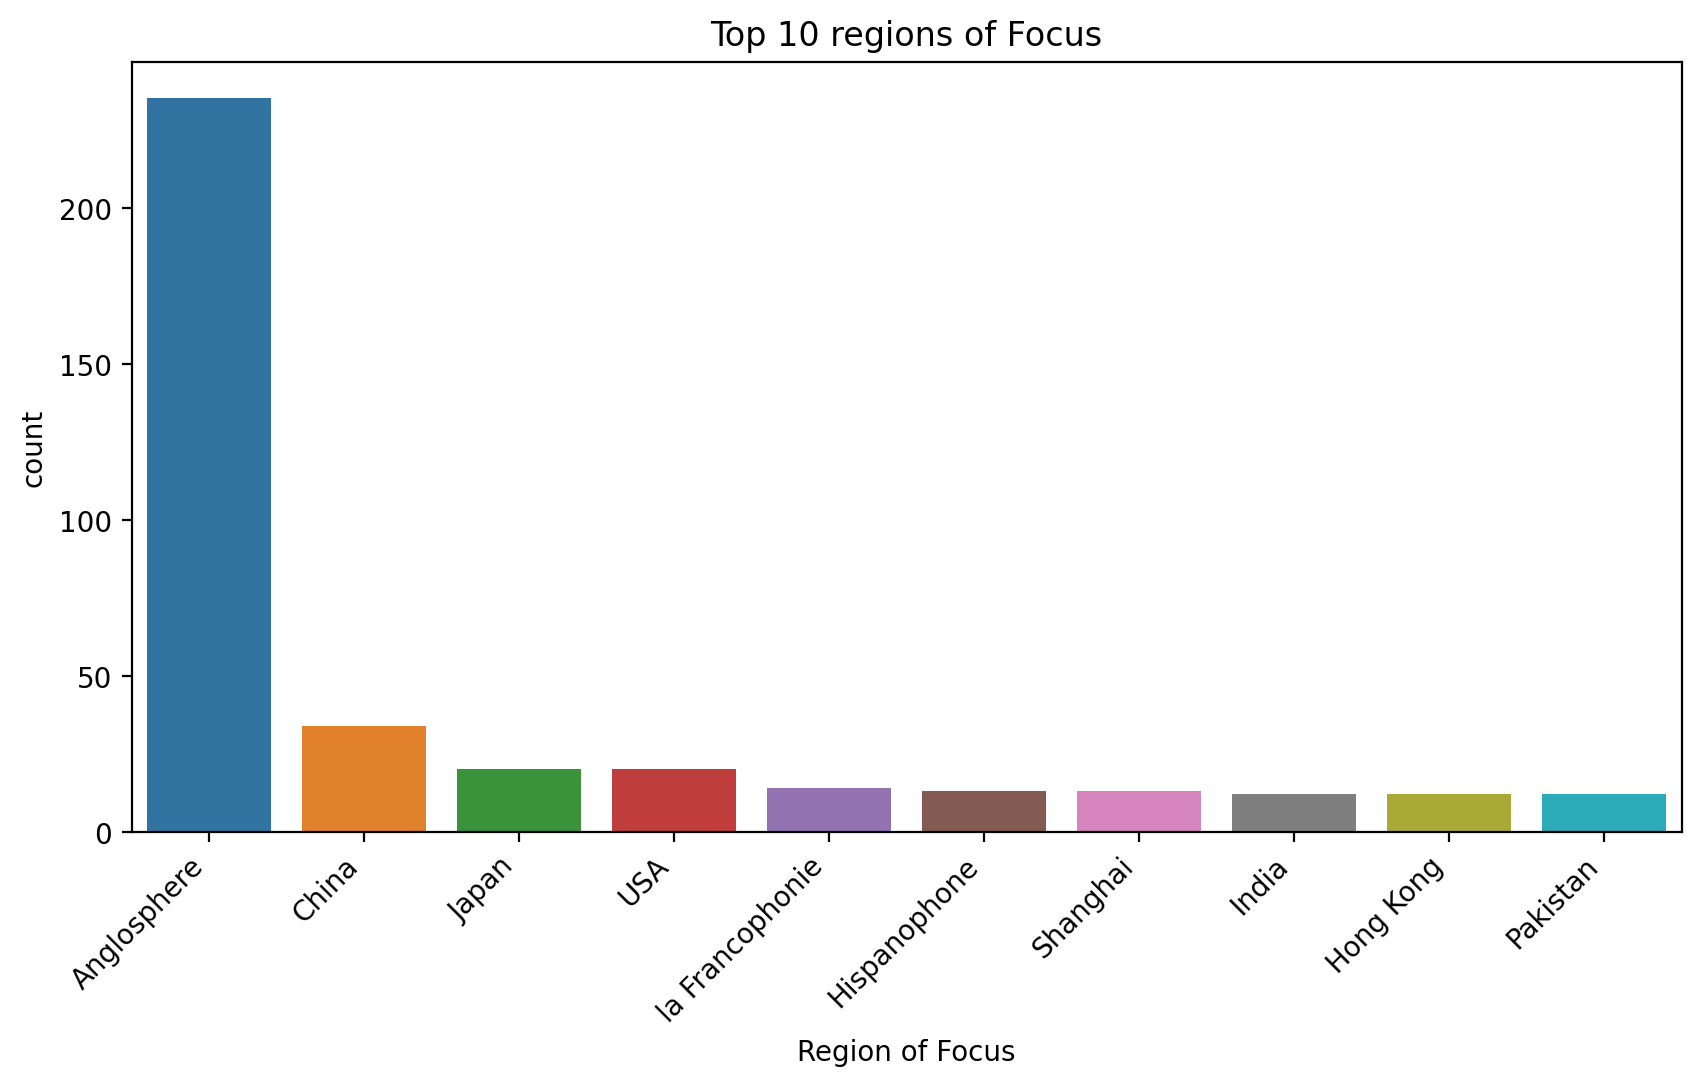

In [10]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Region of Focus',data=df,order=pd.value_counts(df['Region of Focus']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels() ,rotation=45, horizontalalignment='right')
chart.set_title("Top 10 regions of Focus")

Text(0.5, 1.0, 'Lowest 10 regions of Focus')

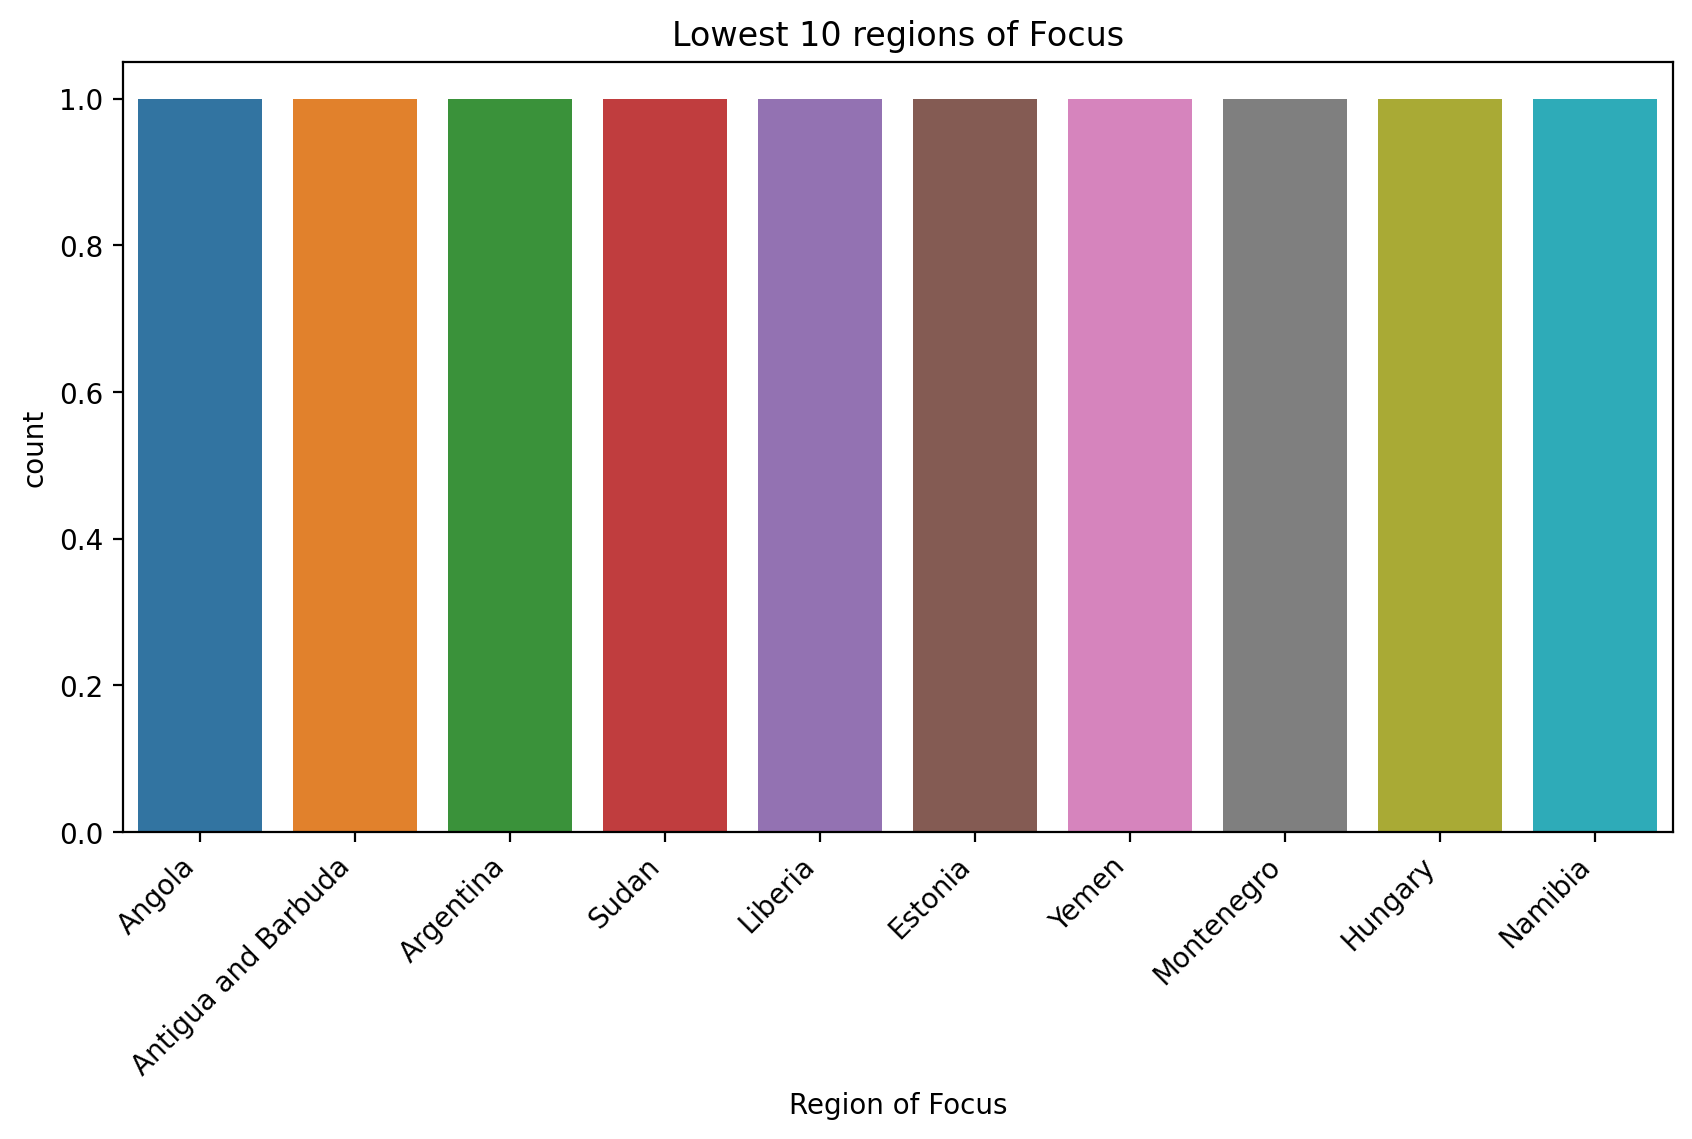

In [11]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Region of Focus',data=df,order=pd.value_counts(df['Region of Focus']).iloc[-10:].index)
chart.set_xticklabels(chart.get_xticklabels() ,rotation=45, horizontalalignment='right')
chart.set_title("Lowest 10 regions of Focus")

### Language


In [12]:
df['Language'].value_counts()

Language
English             441
Chinese              77
Spanish              40
French               30
Arabic               29
Japanese             20
German               13
Portuguese           11
Vietnamese            8
Urdu                  7
Korean                5
Russian               5
Burmese               5
Persian               4
Tamil                 4
Thai                  4
Sinhalese             4
Serbian               3
Turkish               3
Hebrew                3
Bahasa Indonesia      3
Polish                3
Italian               3
Laotian               2
Cantonese             2
Esperanto             2
Hindi                 2
Greek                 2
Swahili               2
Albanian              2
Pashto                2
Hausa                 2
Ukrainian             2
Mongolian             1
Bulgarian             1
Bengali               1
Romanian              1
Bahasa Malaysia       1
Nepalese              1
Latvian               1
Kyrgyz                1
Belarus

Text(0.5, 1.0, 'Languages')

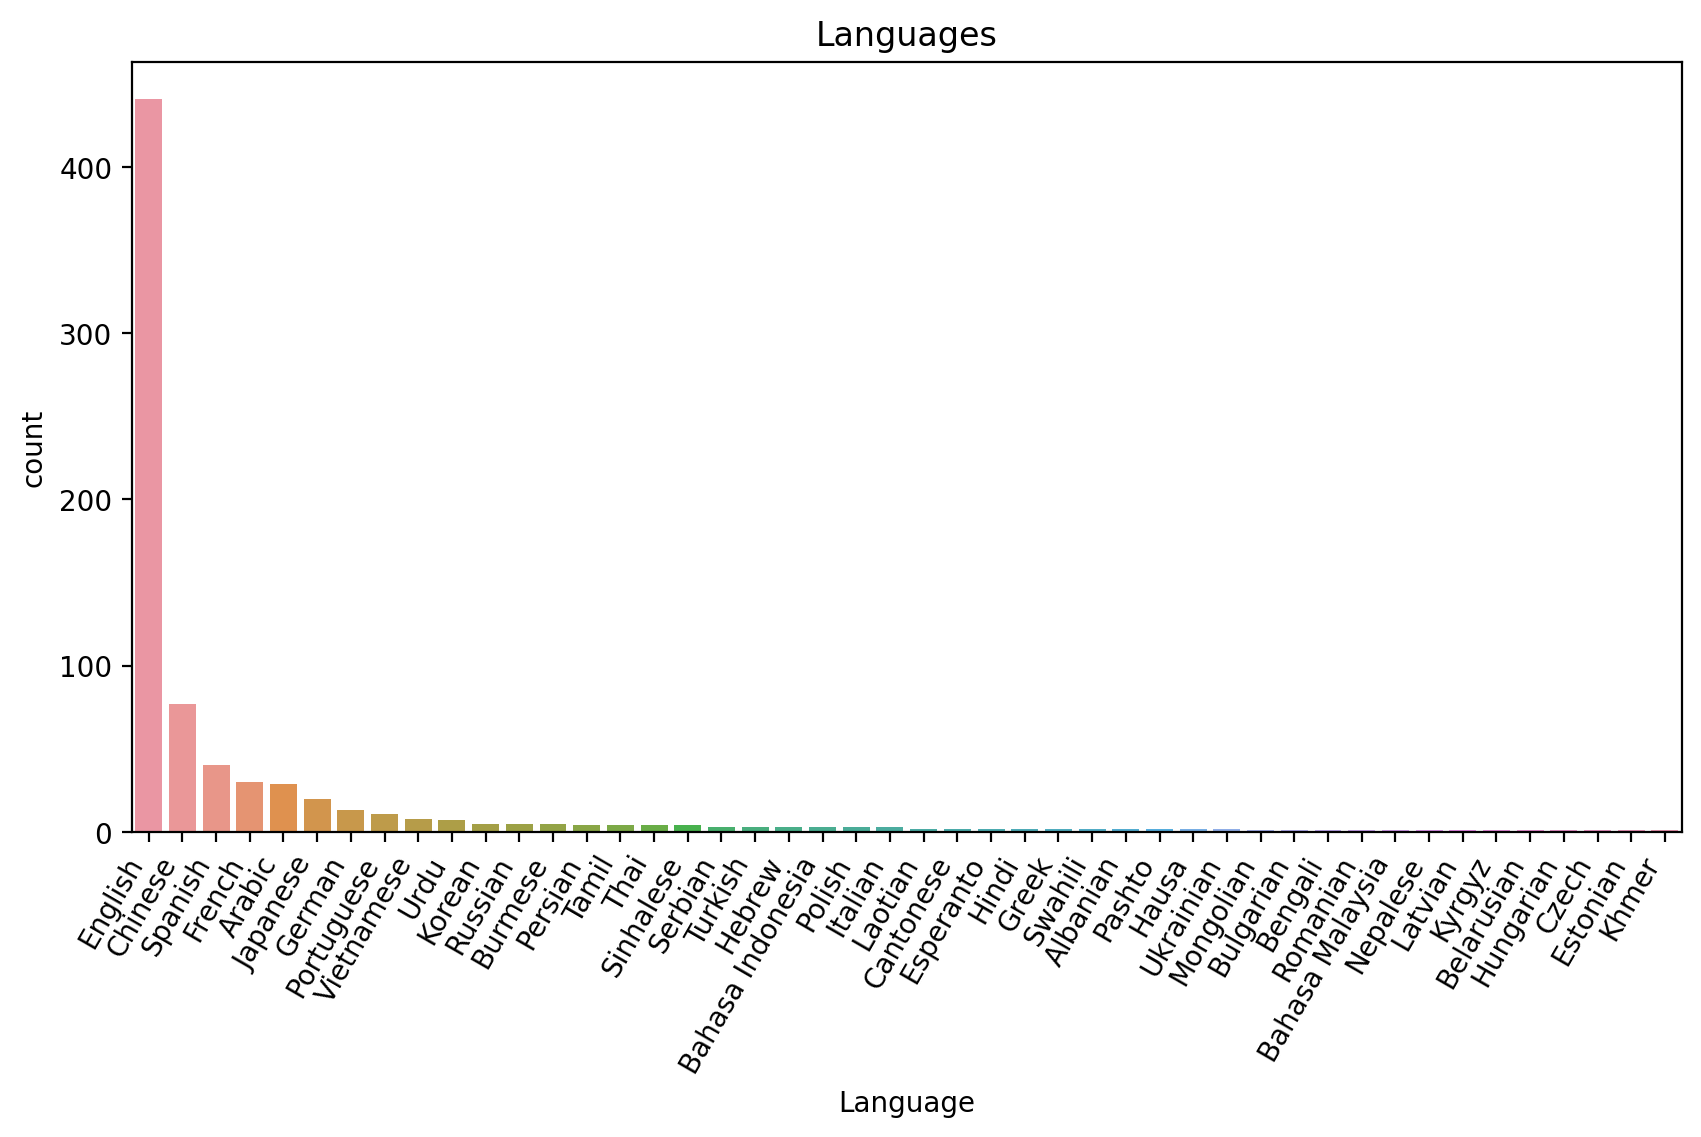

In [13]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Language',data=df,order=pd.value_counts(df['Language']).iloc[:].index)
chart.set_xticklabels(chart.get_xticklabels() ,rotation=60, horizontalalignment='right')
chart.set_title("Languages")

### Entity owner (English)

In [14]:
df['Entity owner (English)'].value_counts()

Entity owner (English)
Ministry of Foreign Affairs                     286
China Media Group (CMG)                         238
China Daily Press                                37
Xinhua News Agency                               34
People's Daily Press                             34
                                               ... 
Chengdu Municipal People's Government             1
Jiaxing Radio and Television Media Co., Ltd.      1
Ministry of Commerce Information Office           1
Qiushi Magazine Press                             1
Wenshan Radio & Television Station                1
Name: count, Length: 87, dtype: int64

Text(0.5, 1.0, 'Top 10 Entity owners (English)')

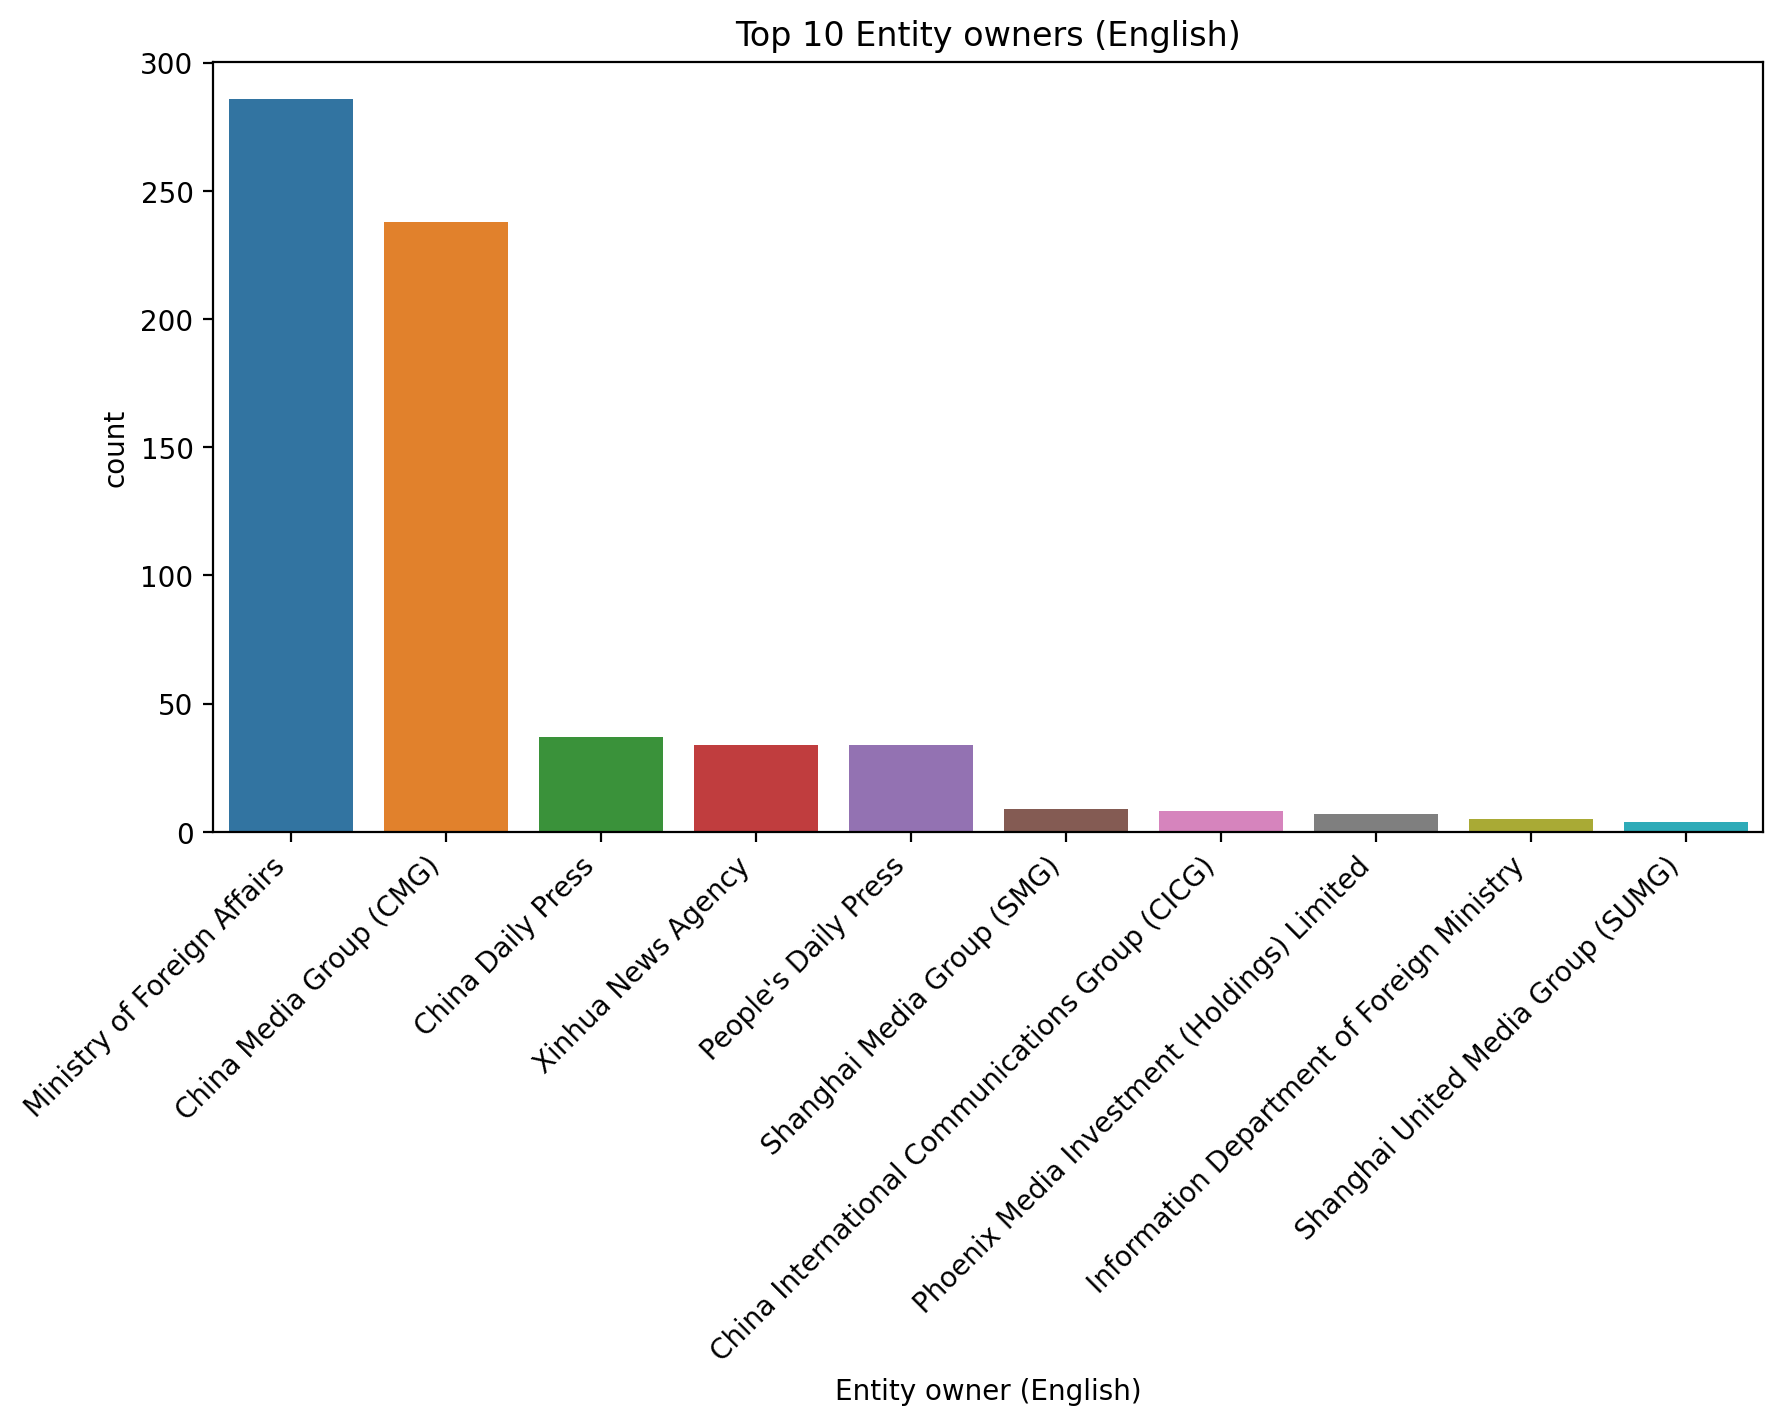

In [15]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Entity owner (English)',data=df,order=pd.value_counts(df['Entity owner (English)']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels() ,rotation=45, horizontalalignment='right')
chart.set_title("Top 10 Entity owners (English)")

### Entity owner (Chinese)
3 missing

### Parent entity (English)

In [16]:
df['Parent entity (English)'].value_counts()

Parent entity (English)
Ministry of Foreign Affairs                         293
Central Publicity Department                        275
State Council                                        38
Central Committee of the Chinese Communist Party     35
Shanghai Municipal Committee                         13
                                                   ... 
Chengdu Municipal Committee                           1
Jiaxing Municipal Committee                           1
Ministry of Commerce (MOFCOM)                         1
Shaoxing Municipal People's Government                1
Wenshan Municipal People's Government                 1
Name: count, Length: 69, dtype: int64

Text(0.5, 1.0, 'Top 10 Parent entity (English)')

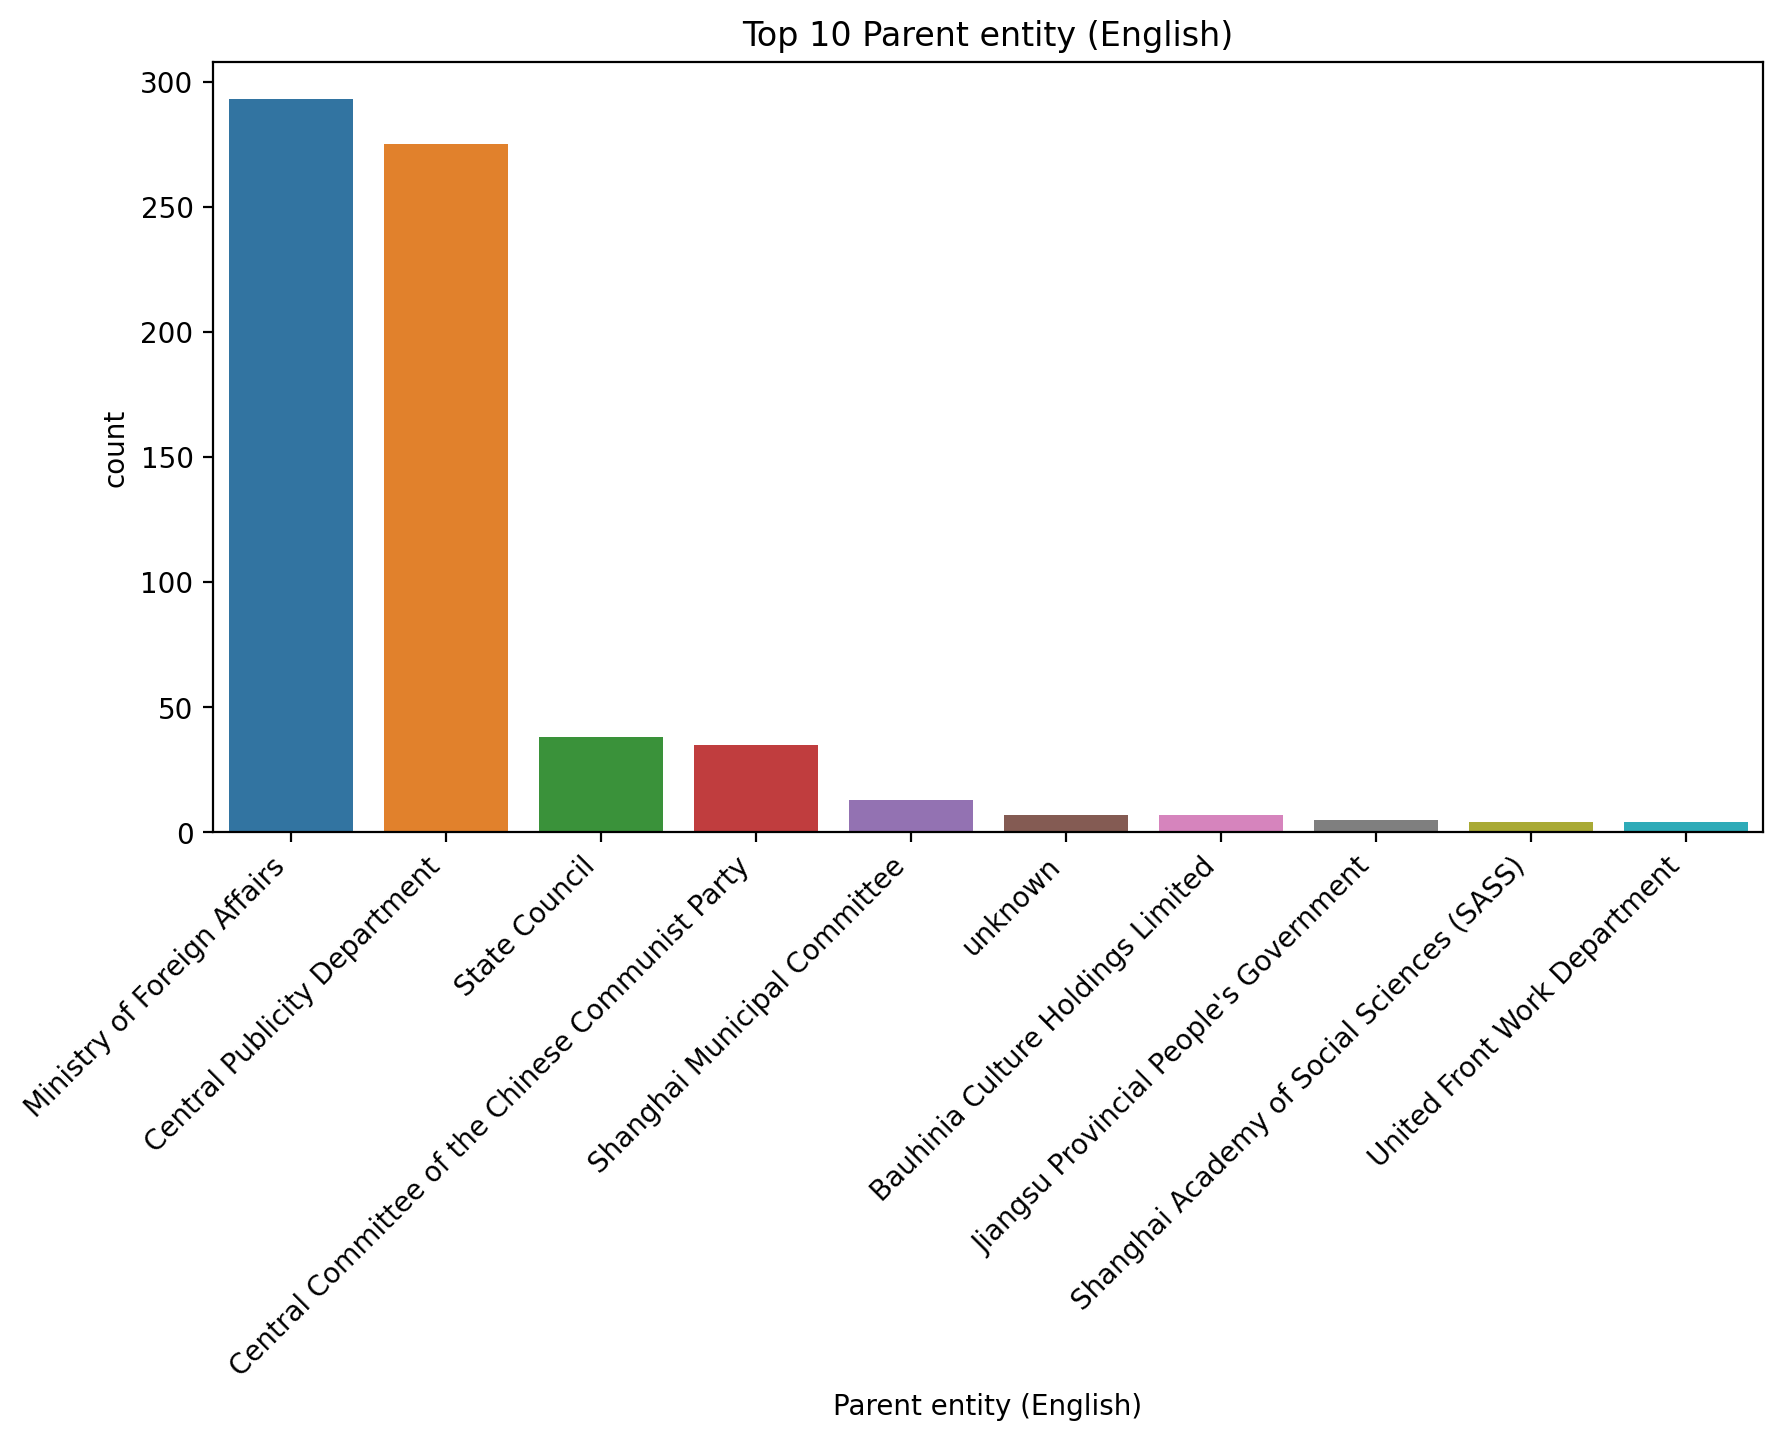

In [17]:
plt.figure(figsize=(10,5))
chart = sns.countplot(x='Parent entity (English)',data=df,order=pd.value_counts(df['Parent entity (English)']).iloc[:10].index)
chart.set_xticklabels(chart.get_xticklabels() ,rotation=45, horizontalalignment='right')
chart.set_title("Top 10 Parent entity (English)")

### Parent entity (Chinese)     
7 Missing

### Twitter

In [18]:
df['X (Twitter) handle'].isna().sum()

185

In [19]:
!pip3 install fuzzywuzzy[speedup]
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [20]:
df['Twitter-name Similarity Ratio'] =0
for index, row in df.iterrows():
    similarity_ratio = fuzz.token_set_ratio(row['X (Twitter) handle'], row['Name (English)'])   
    df.at[index, 'Twitter-name Similarity Ratio'] = similarity_ratio

<Axes: xlabel='Twitter-name Similarity Ratio', ylabel='Count'>

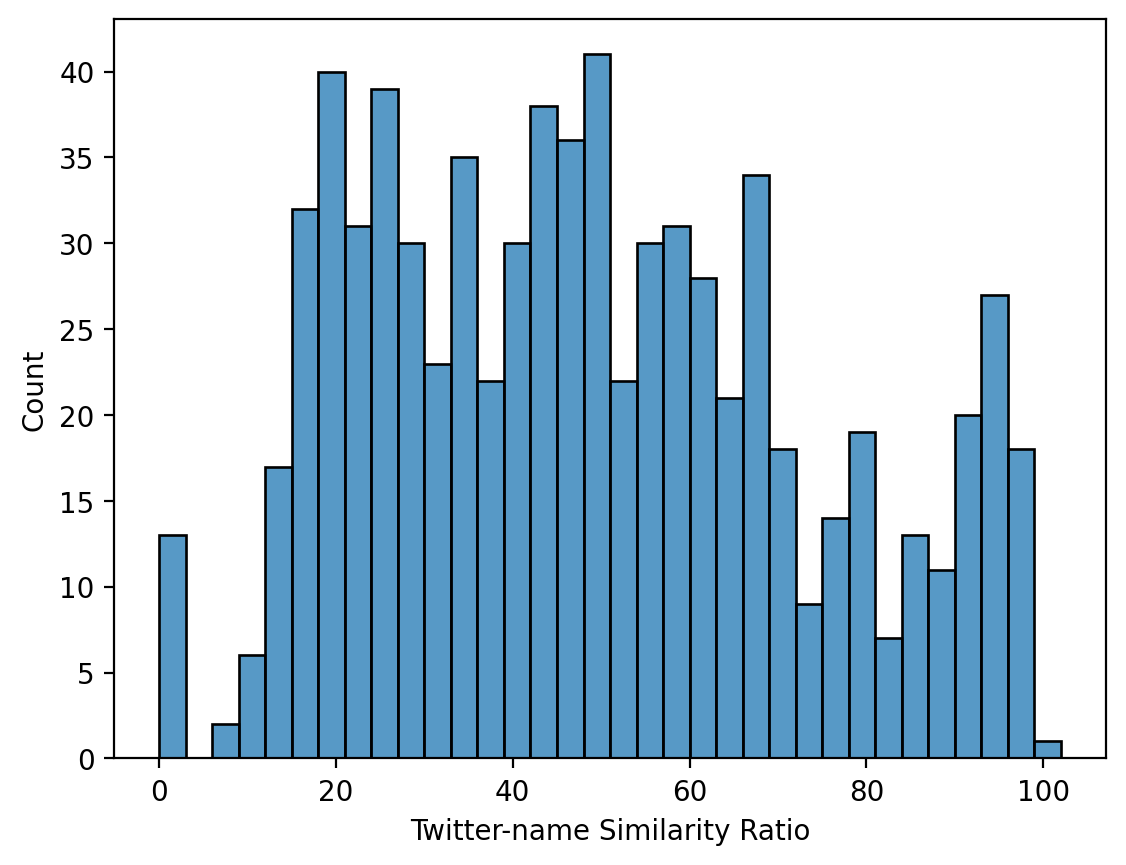

In [21]:
sns.histplot(data=df, x="Twitter-name Similarity Ratio", binwidth=3)


Most people tend not to use their real names in their twitter handles.

In [22]:
df['Twitter-name Similarity Ratio'].describe()

count    758.000000
mean      48.201847
std       24.604671
min        0.000000
25%       27.250000
50%       46.000000
75%       67.000000
max      100.000000
Name: Twitter-name Similarity Ratio, dtype: float64

It seems that the average similarity between the Names of people and their names in twitter handles is 48% .


#### Twitter Followers

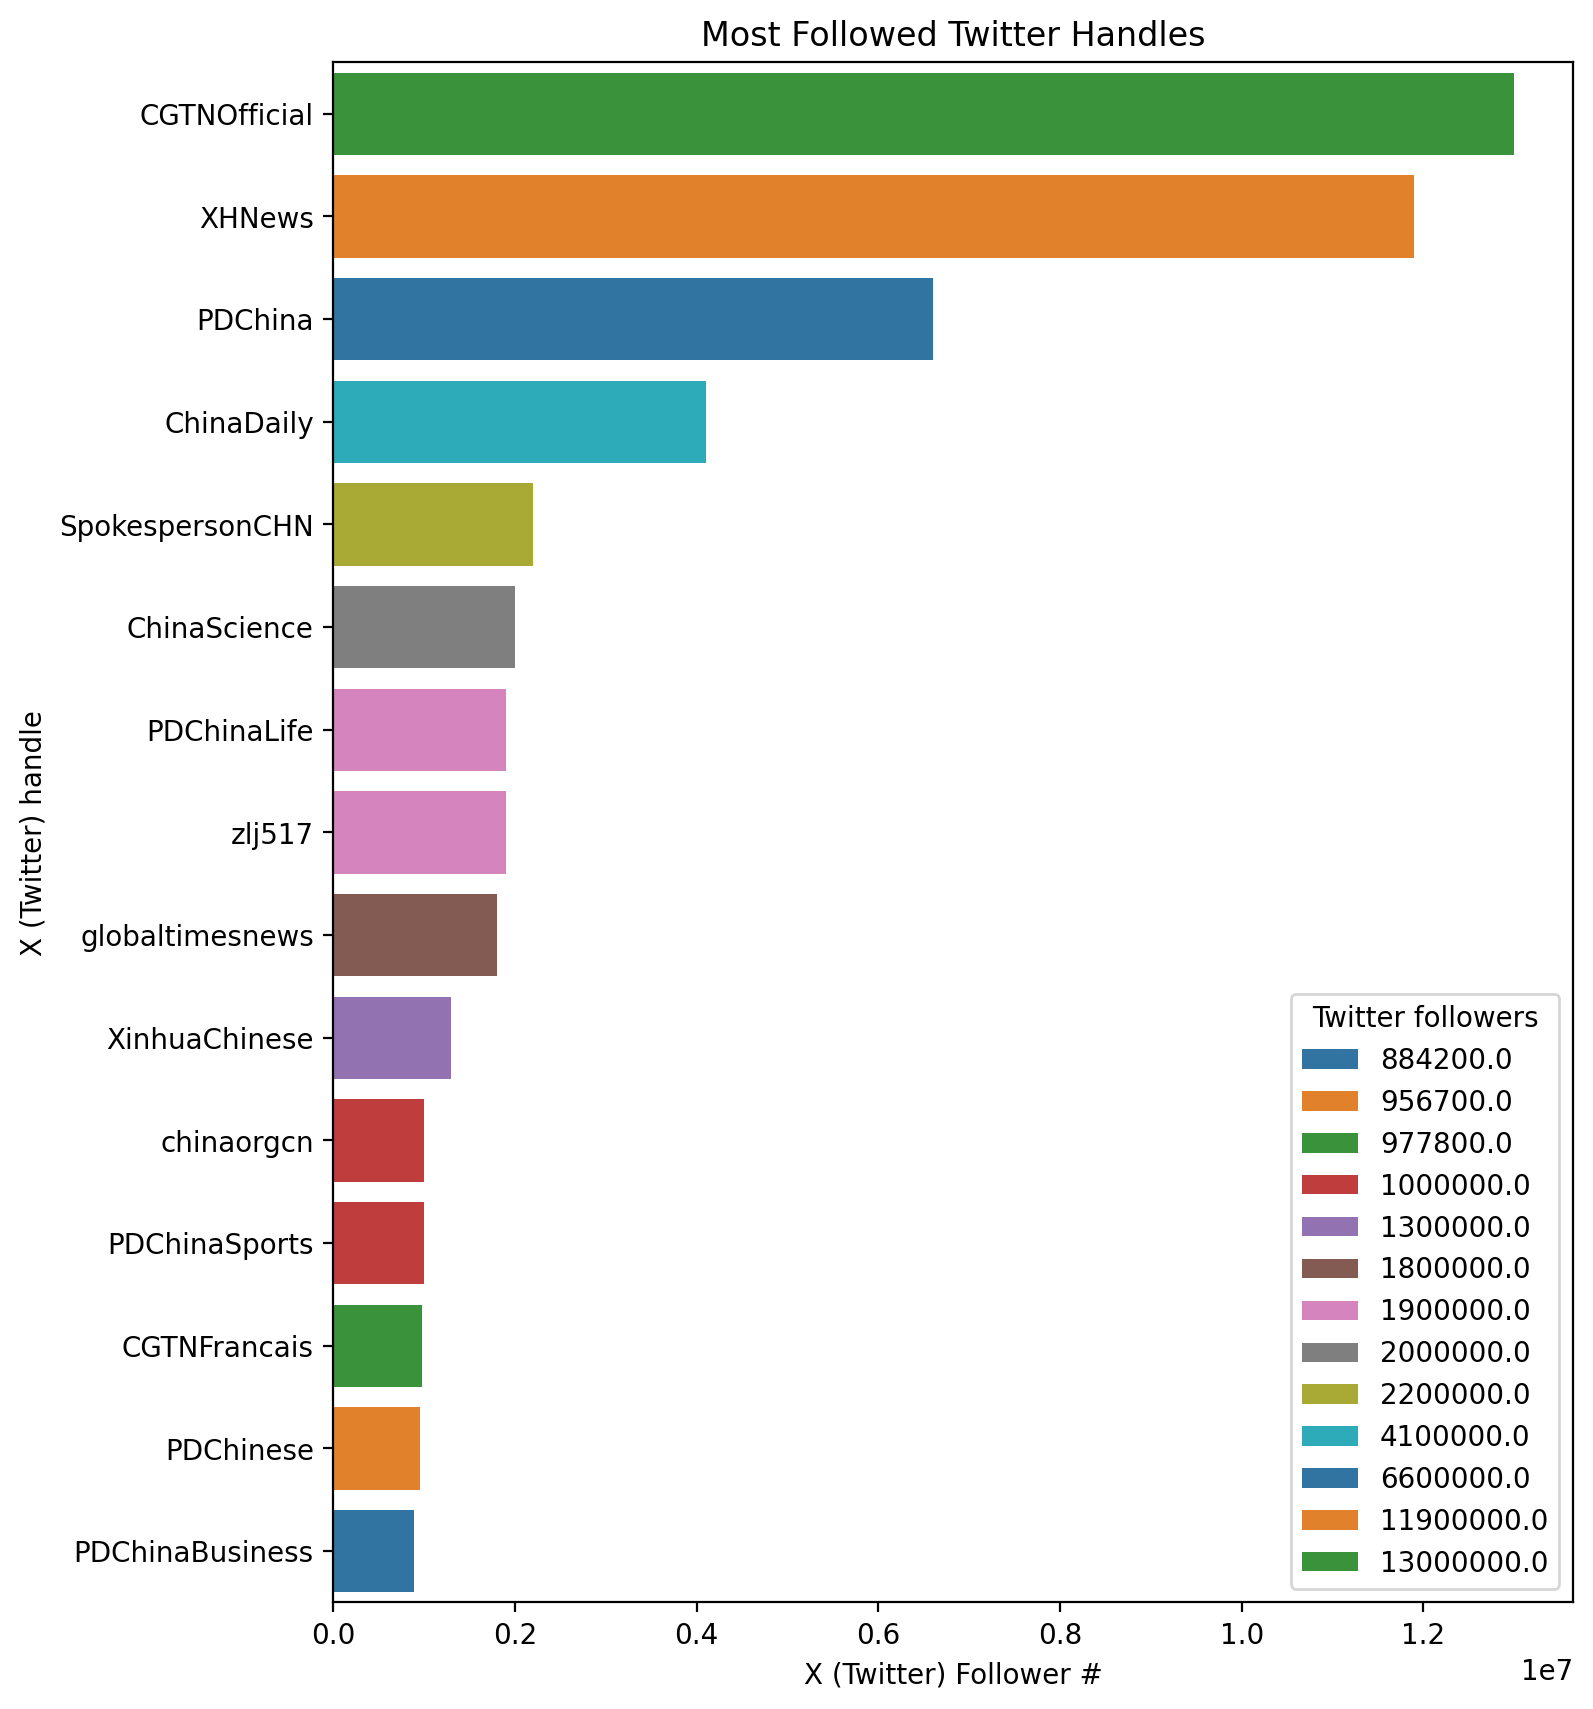

In [23]:
data_twitter = df.sort_values(by='X (Twitter) Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='X (Twitter) handle', x='X (Twitter) Follower #',dodge=False, data=data_twitter, hue='X (Twitter) Follower #', palette="tab10")
graph.set(xlabel="X (Twitter) Follower #", title="Most Followed Twitter Handles")
plt.legend(title='Twitter followers')
plt.show()

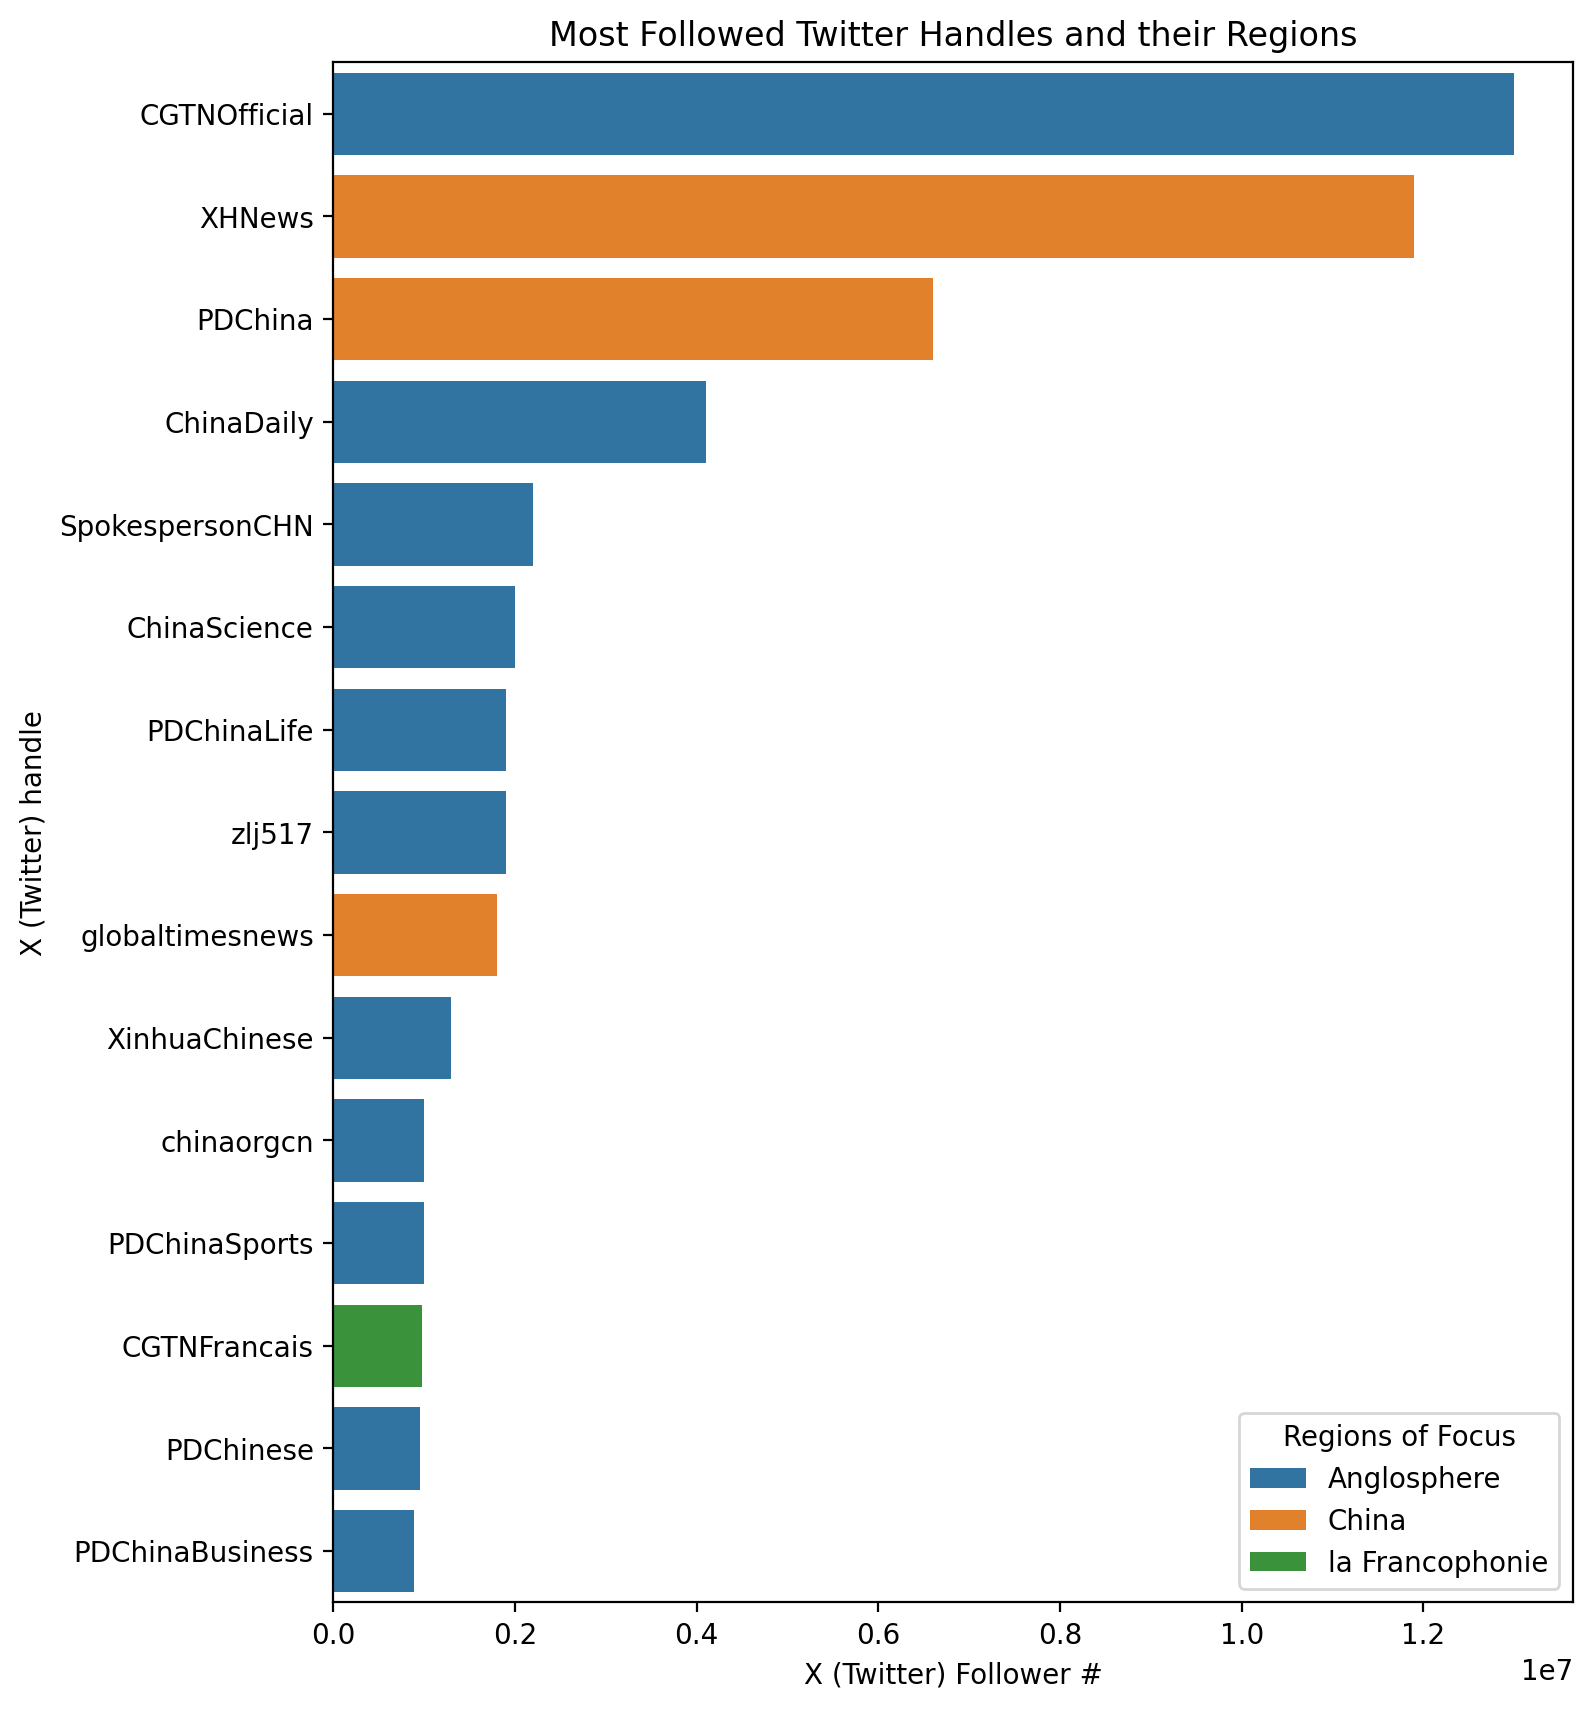

In [24]:
data_twitter = df.sort_values(by='X (Twitter) Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='X (Twitter) handle', x='X (Twitter) Follower #', data=data_twitter, hue='Region of Focus', palette="tab10",dodge=False)
graph.set(xlabel="X (Twitter) Follower #", title="Most Followed Twitter Handles and their Regions")
plt.legend(title='Regions of Focus')
plt.show()

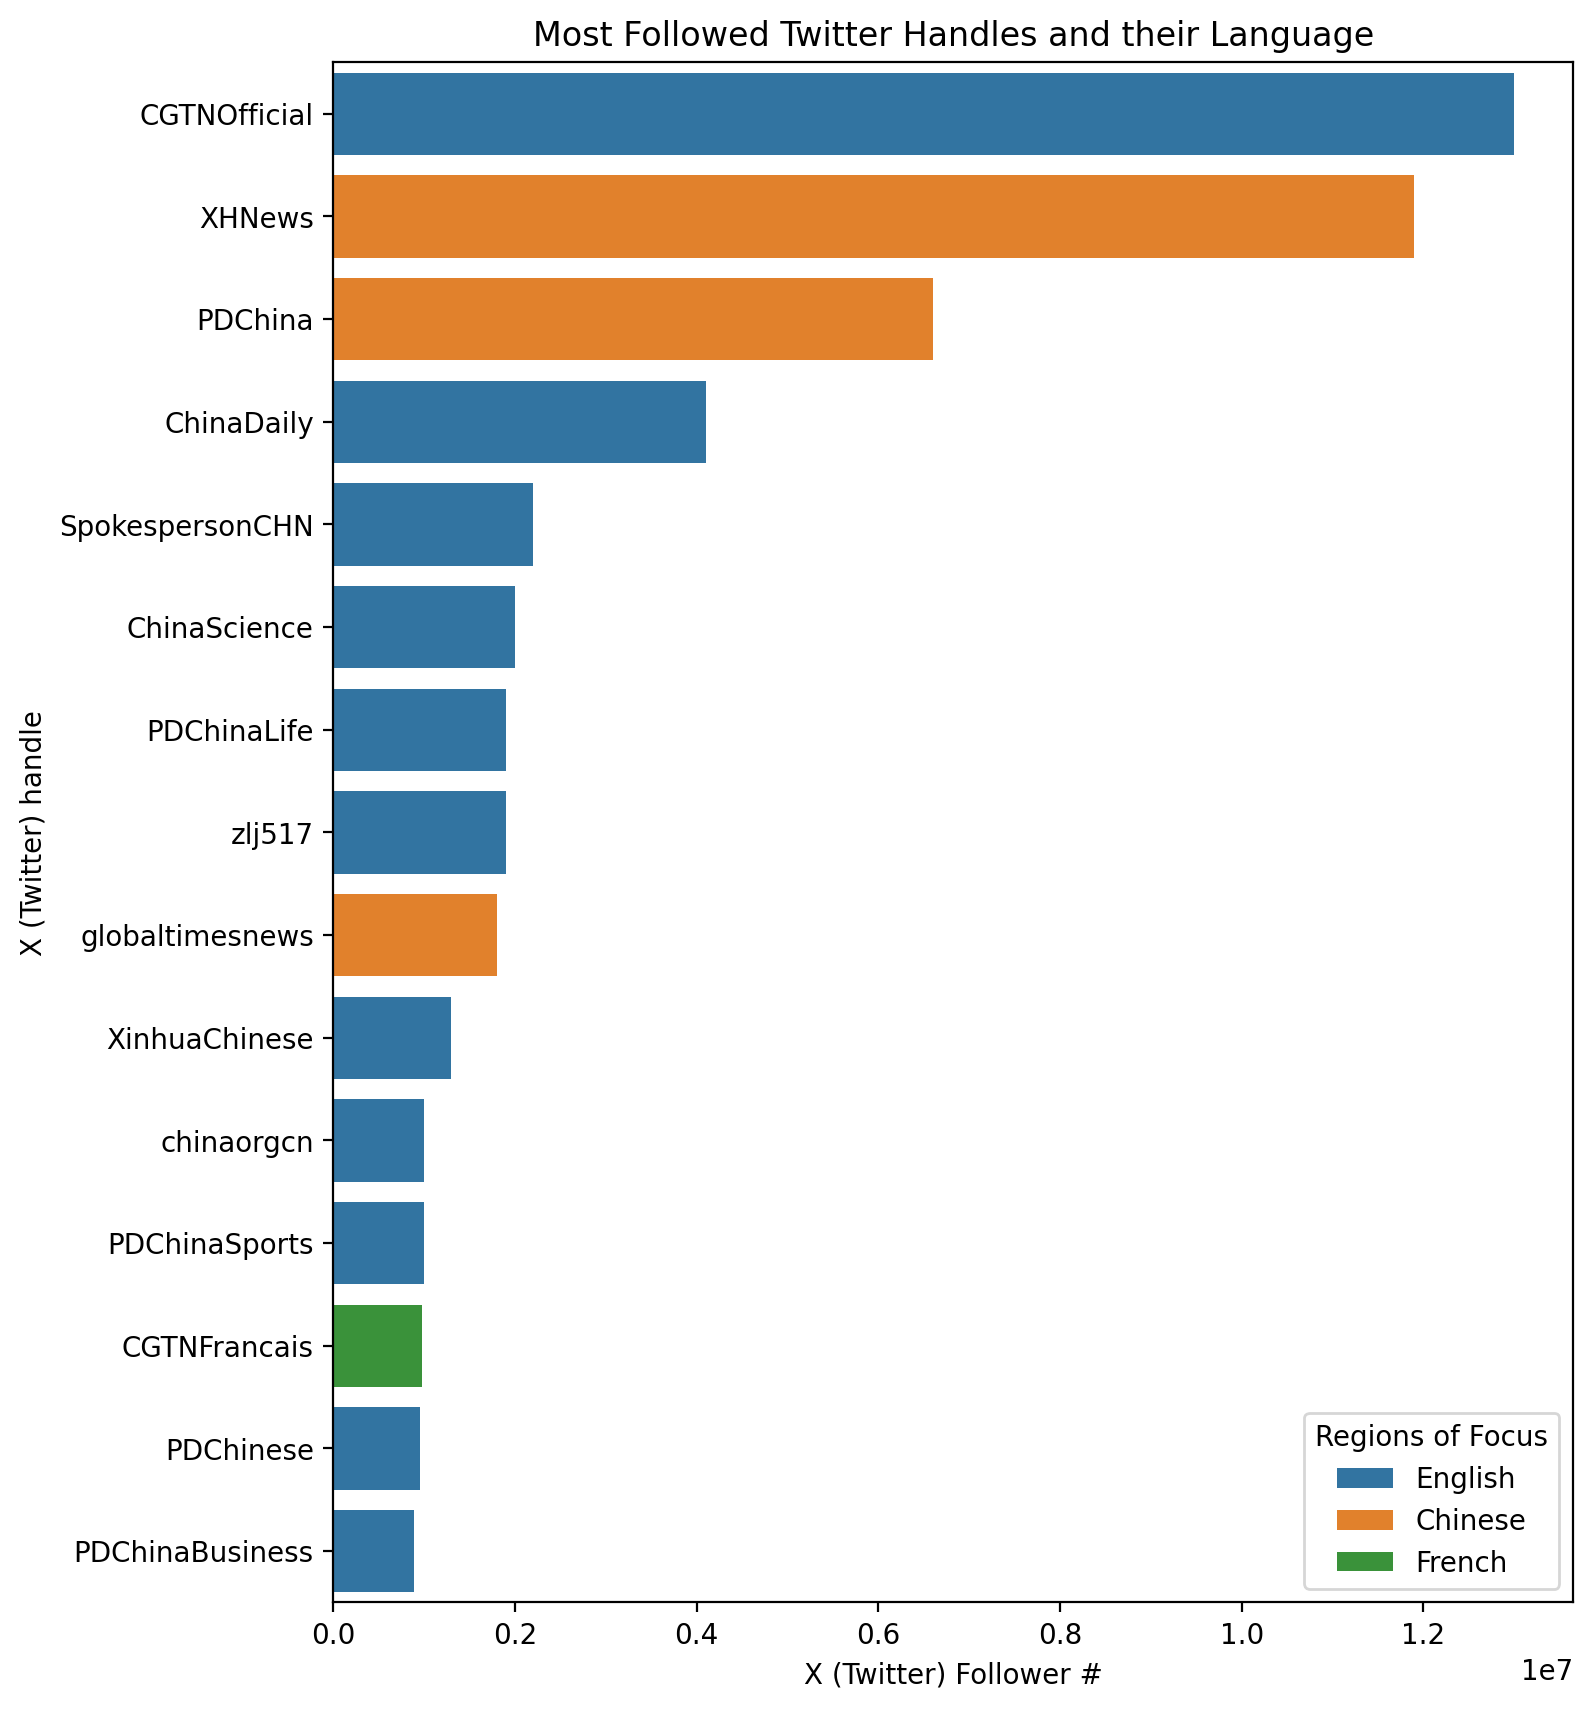

In [25]:
data_twitter = df.sort_values(by='X (Twitter) Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='X (Twitter) handle', x='X (Twitter) Follower #', data=data_twitter, hue='Language', palette="tab10",dodge=False)
graph.set(xlabel="X (Twitter) Follower #", title="Most Followed Twitter Handles and their Language")
plt.legend(title='Regions of Focus')
plt.show()

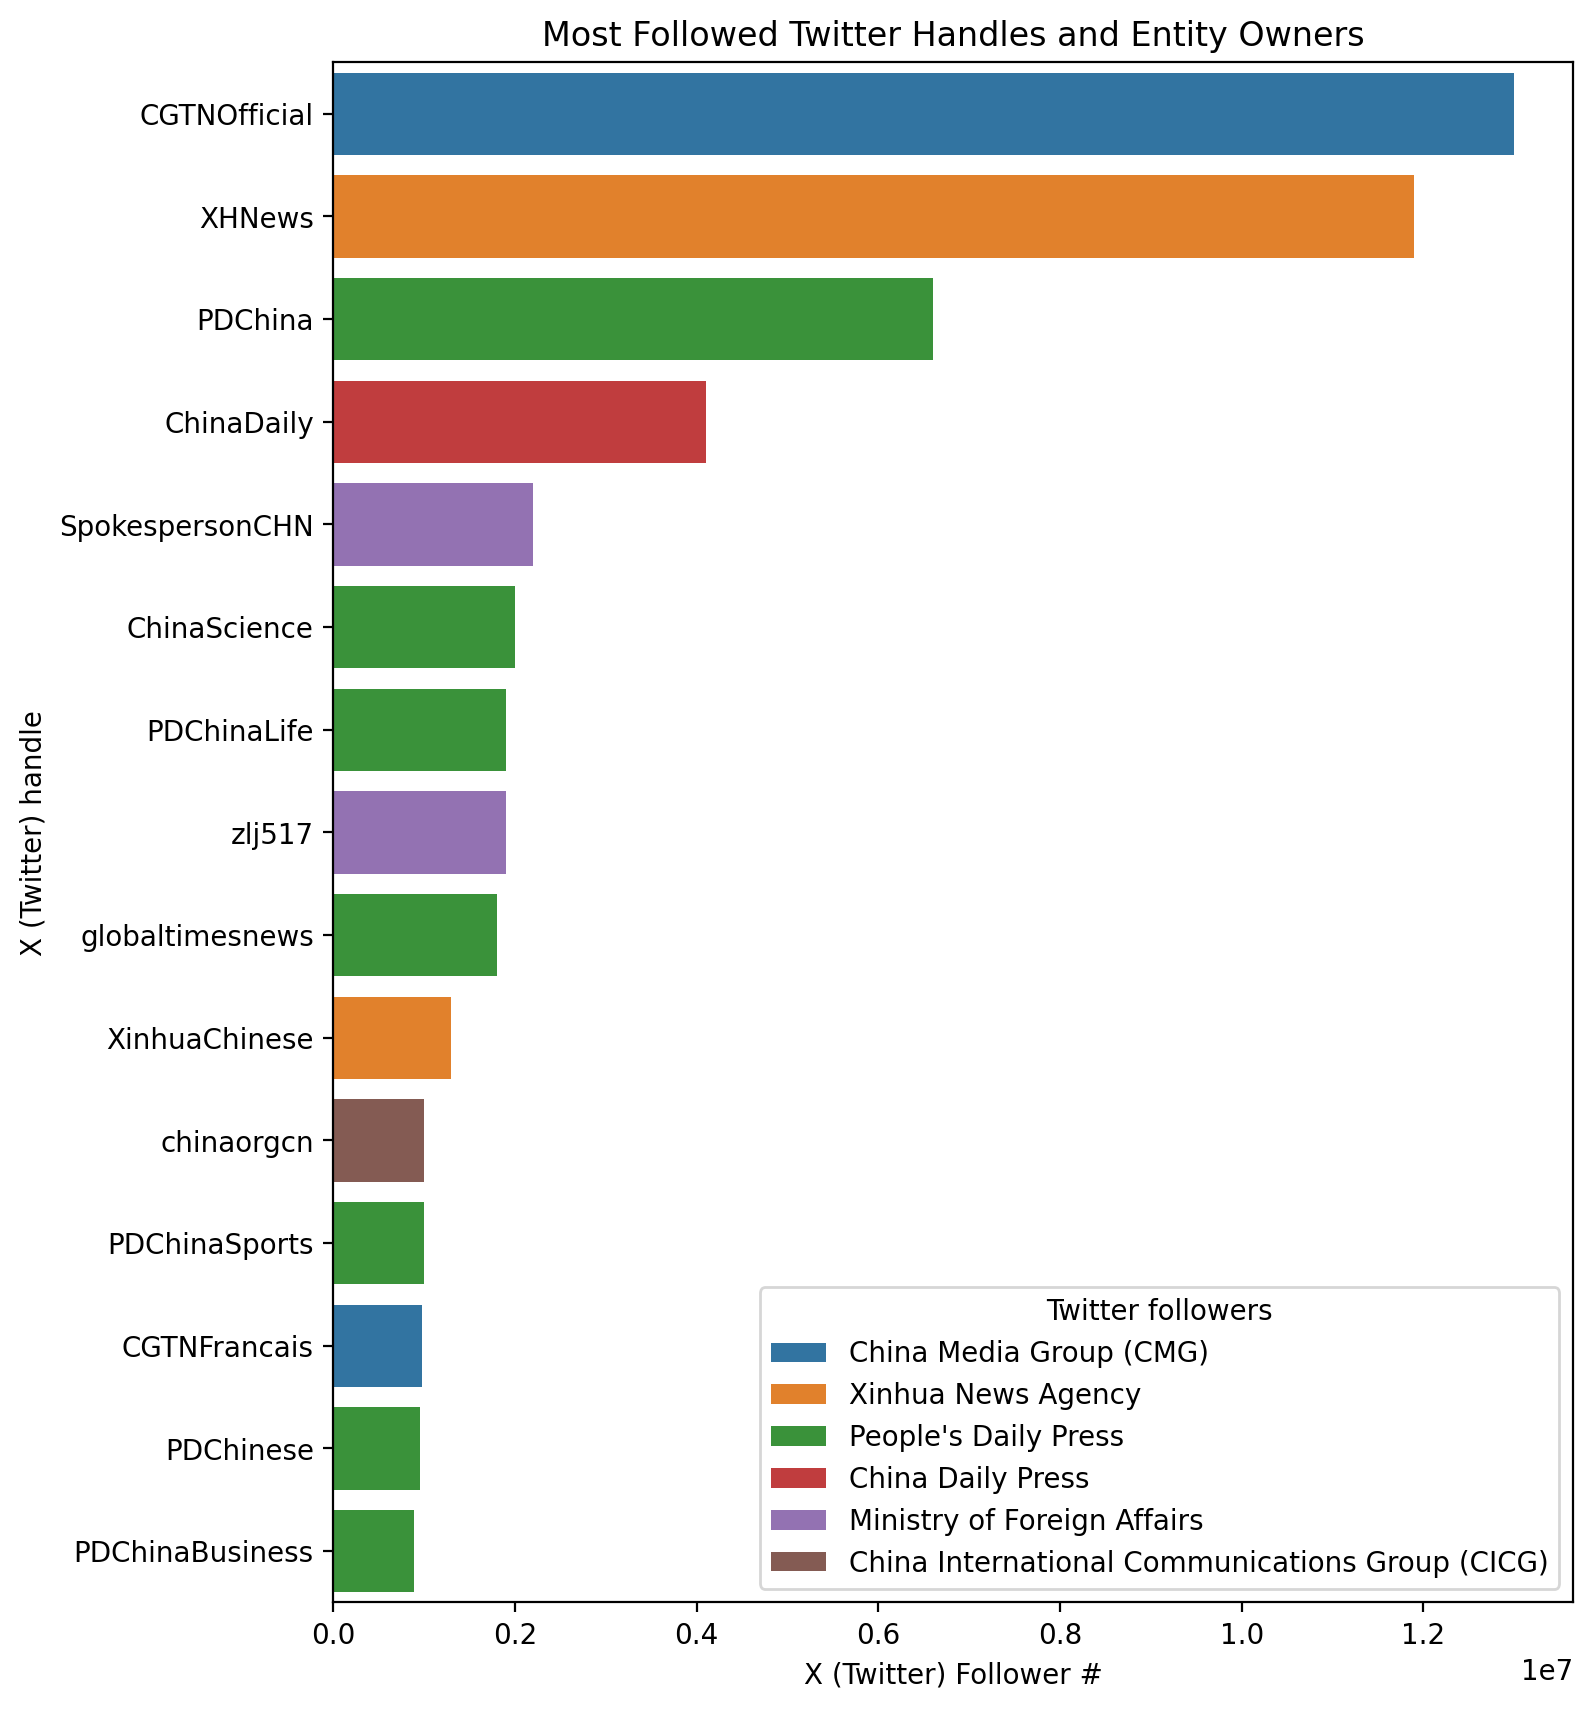

In [26]:
data_twitter = df.sort_values(by='X (Twitter) Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y='X (Twitter) handle', x='X (Twitter) Follower #',dodge=False, data=data_twitter, hue='Entity owner (English)', palette="tab10")
graph.set(xlabel="X (Twitter) Follower #", title="Most Followed Twitter Handles and Entity Owners")
plt.legend(title='Twitter followers')
plt.show()

In [27]:
print(df.columns)

Index(['Name (English)', 'Name (Chinese)', 'Region of Focus', 'Language',
       'Entity owner (English)', 'Entity owner (Chinese)',
       'Parent entity (English)', 'Parent entity (Chinese)',
       'X (Twitter) handle', 'X (Twitter) URL', 'X (Twitter) Follower #',
       'Facebook page', 'Facebook URL', 'Facebook Follower #',
       'Instragram page', 'Instagram URL', 'Instagram Follower #',
       'Threads account', 'Threads URL', 'Threads Follower #',
       'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
       'TikTok account', 'TikTok URL', 'TikTok Subscriber #',
       'Twitter-name Similarity Ratio'],
      dtype='object')


### Facebook

In [28]:
df['Facebook page'].isna().sum()

432

In [29]:
df['Facebook-name Similarity Ratio'] =0
for index, row in df.iterrows():
    similarity_ratio = fuzz.token_set_ratio(row['Facebook page'], row['Name (English)'])   
    df.at[index, 'Facebook-name Similarity Ratio'] = similarity_ratio

<Axes: xlabel='Facebook-name Similarity Ratio', ylabel='Count'>

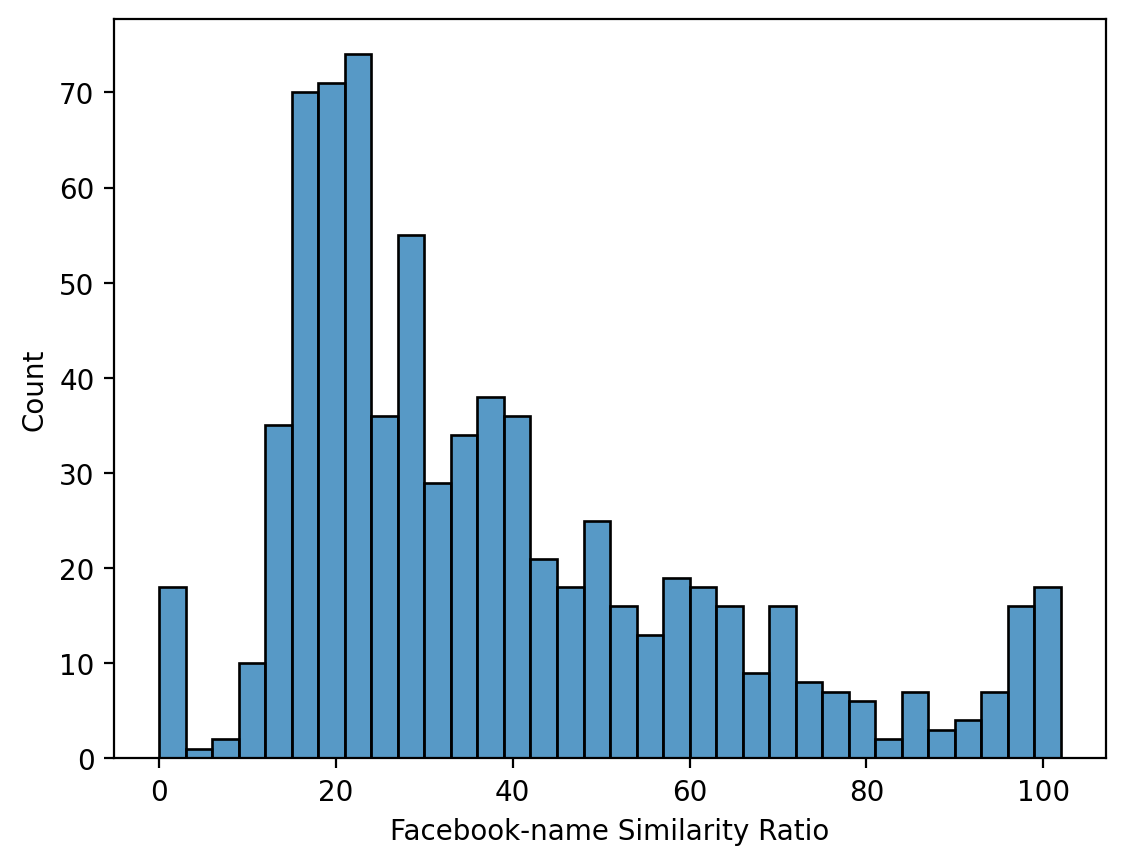

In [30]:
sns.histplot(data=df, x="Facebook-name Similarity Ratio", binwidth=3)


Most people tend not to use their real names in their twitter handles.


In [31]:
df['Facebook-name Similarity Ratio'].describe()

count    758.000000
mean      37.506596
std       23.843653
min        0.000000
25%       20.000000
50%       31.000000
75%       50.000000
max      100.000000
Name: Facebook-name Similarity Ratio, dtype: float64

### Facebook Followers

In [32]:
data_facebook = df.sort_values(by='Facebook Follower #',ascending=False).head(15)


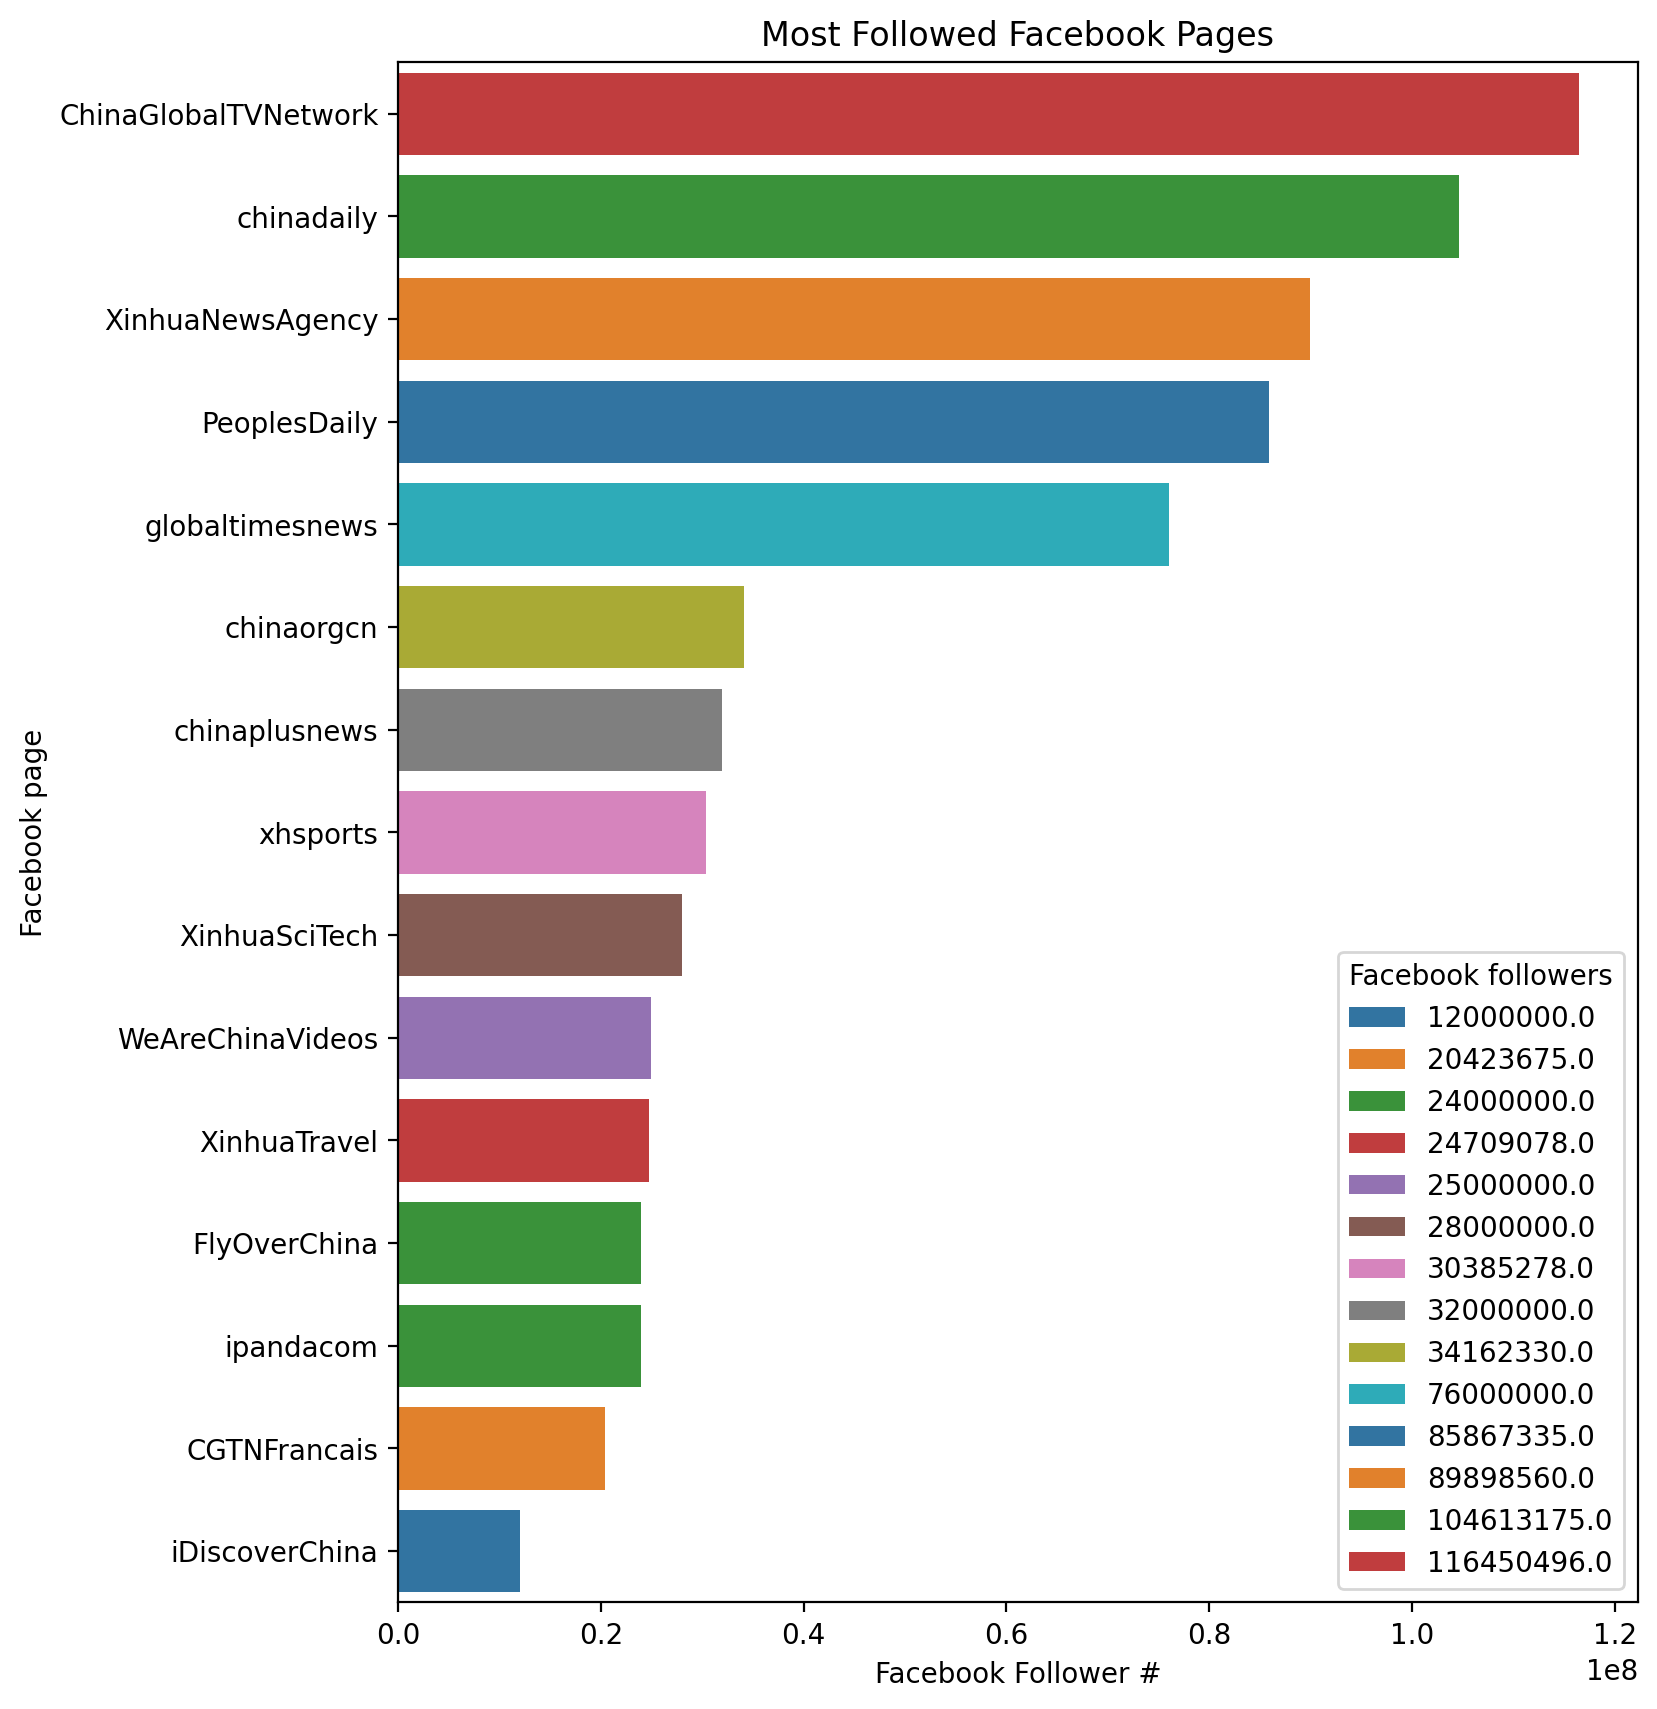

In [33]:
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Facebook page", x="Facebook Follower #" , data=data_facebook, hue="Facebook Follower #", palette="tab10",dodge=False)
graph.set(xlabel="Facebook Follower #", title="Most Followed Facebook Pages")
plt.legend(title='Facebook followers')
plt.show()

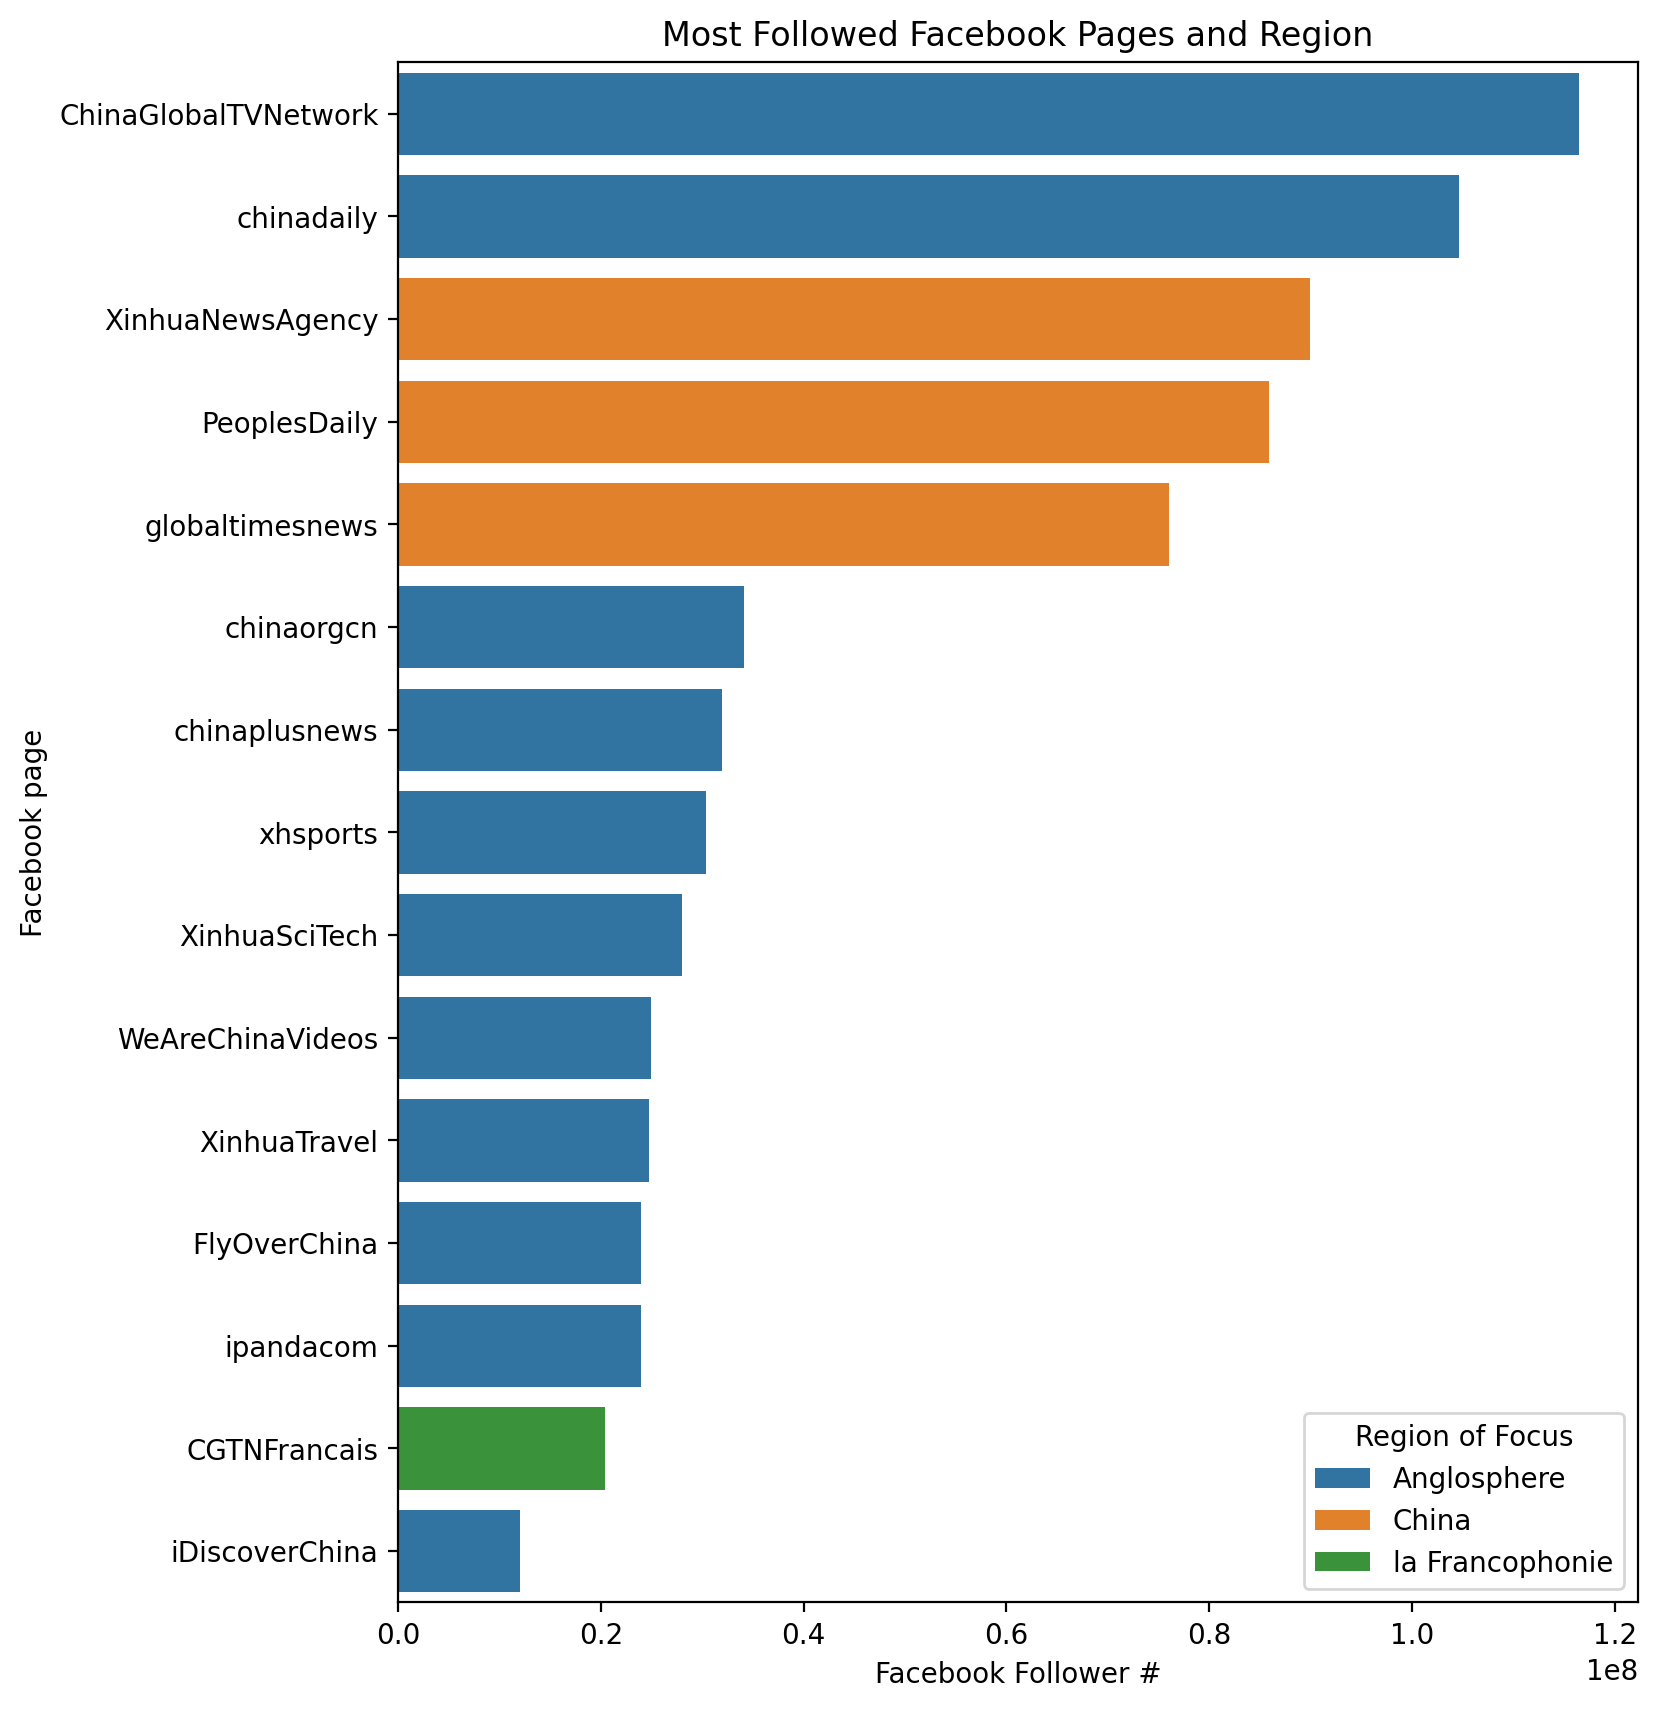

In [34]:
data_facebook = df.sort_values(by='Facebook Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Facebook page", x="Facebook Follower #" , data=data_facebook, hue="Region of Focus", palette="tab10",dodge=False)
graph.set(xlabel="Facebook Follower #", title="Most Followed Facebook Pages and Region")
plt.legend(title='Region of Focus')
plt.show()

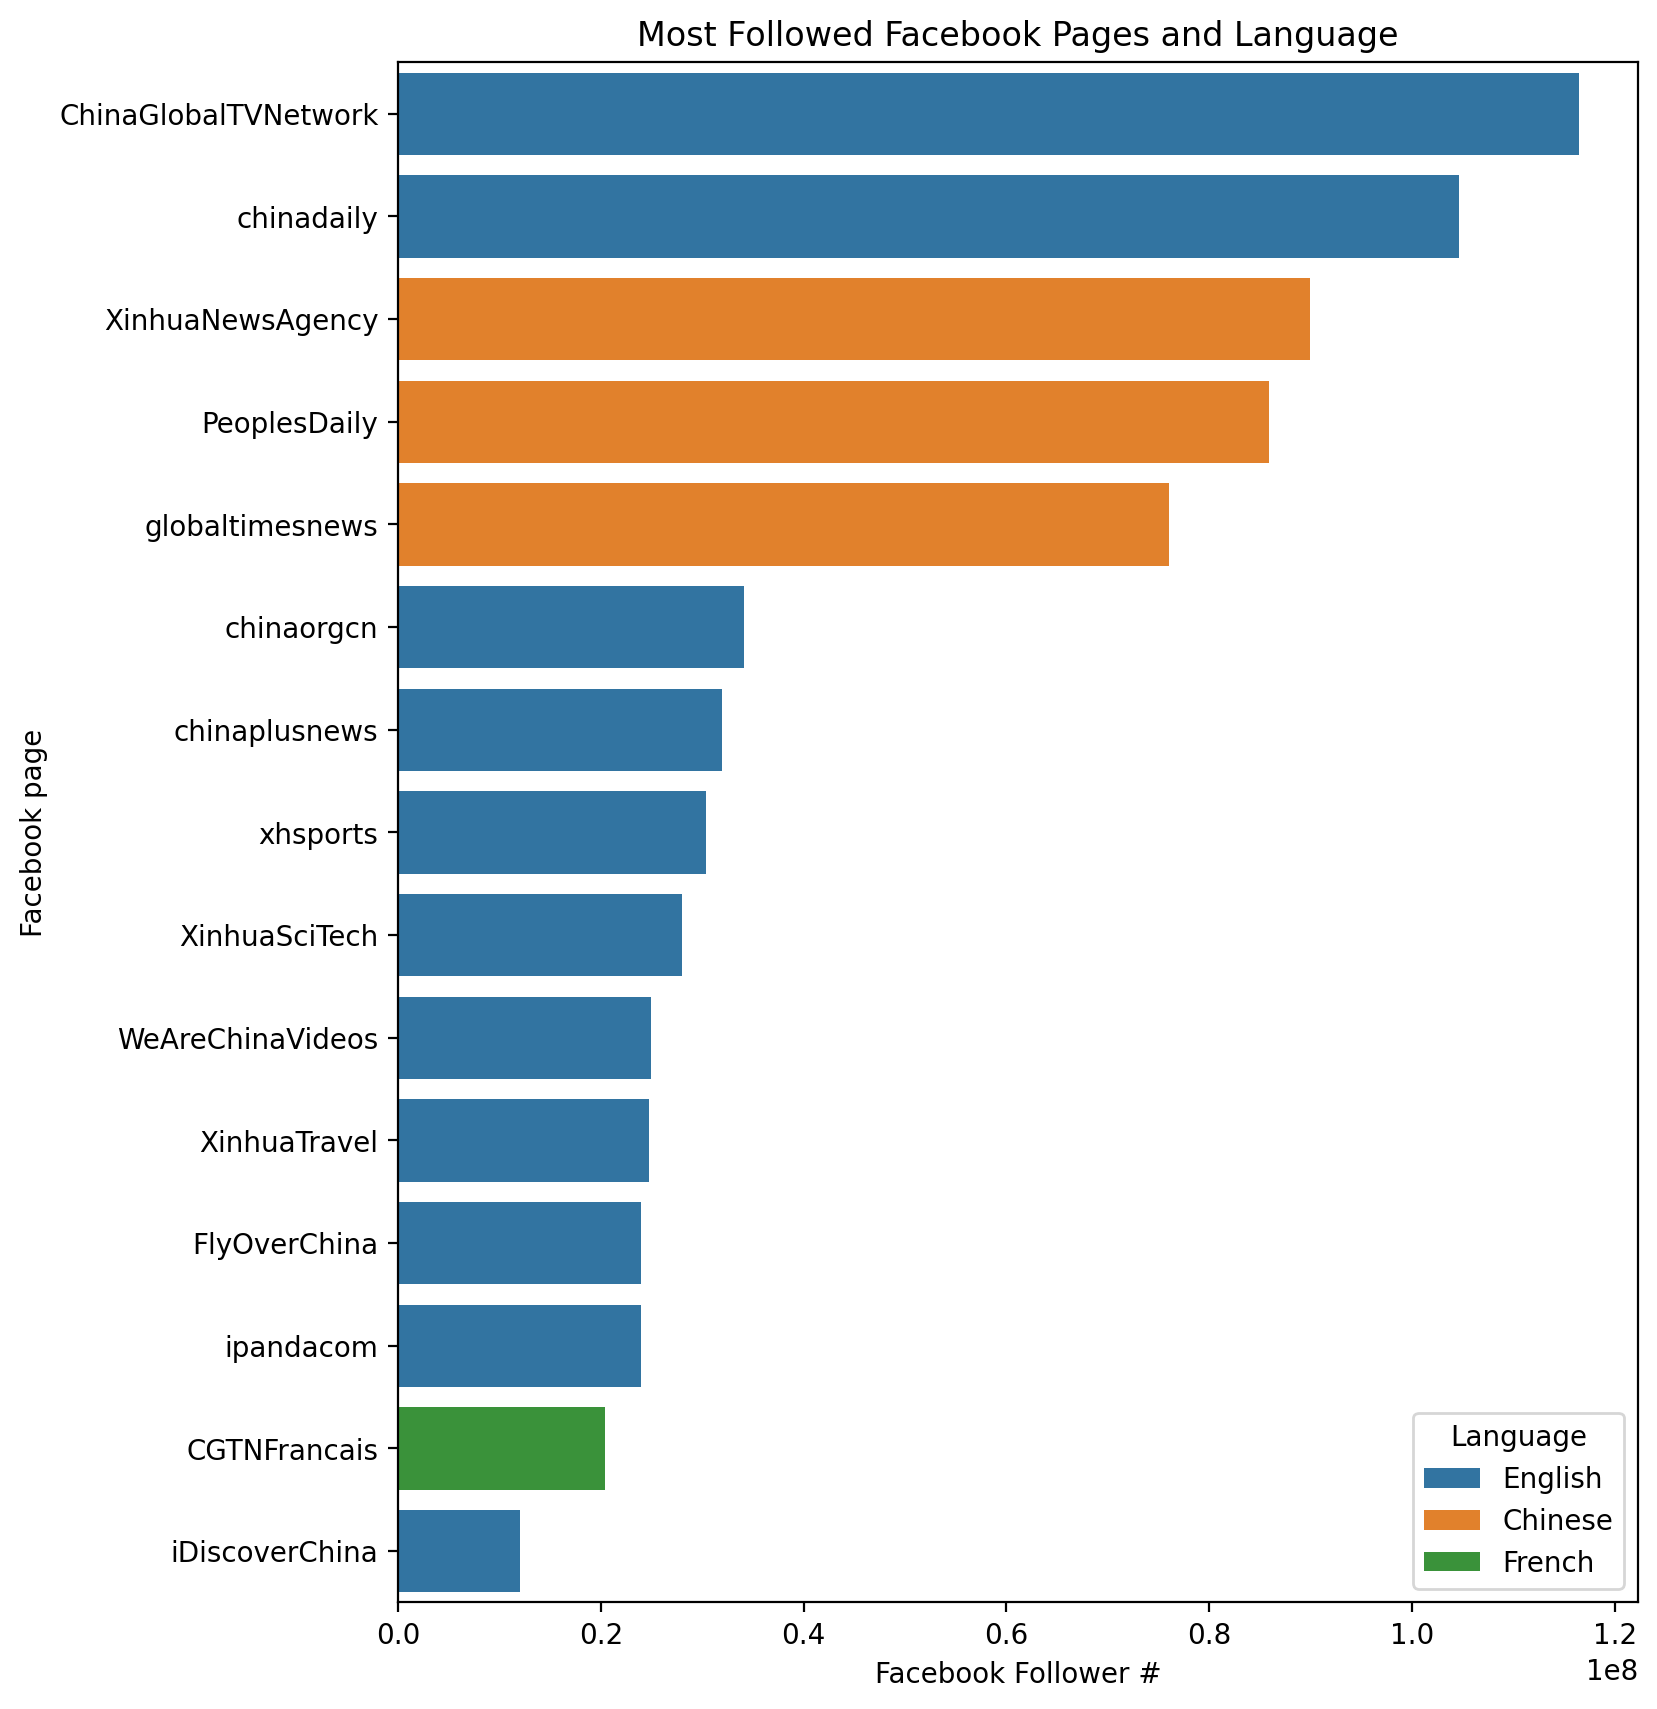

In [35]:
data_facebook = df.sort_values(by='Facebook Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Facebook page", x="Facebook Follower #" , data=data_facebook, hue="Language", palette="tab10",dodge=False)
graph.set(xlabel="Facebook Follower #", title="Most Followed Facebook Pages and Language")
plt.legend(title='Language')
plt.show()

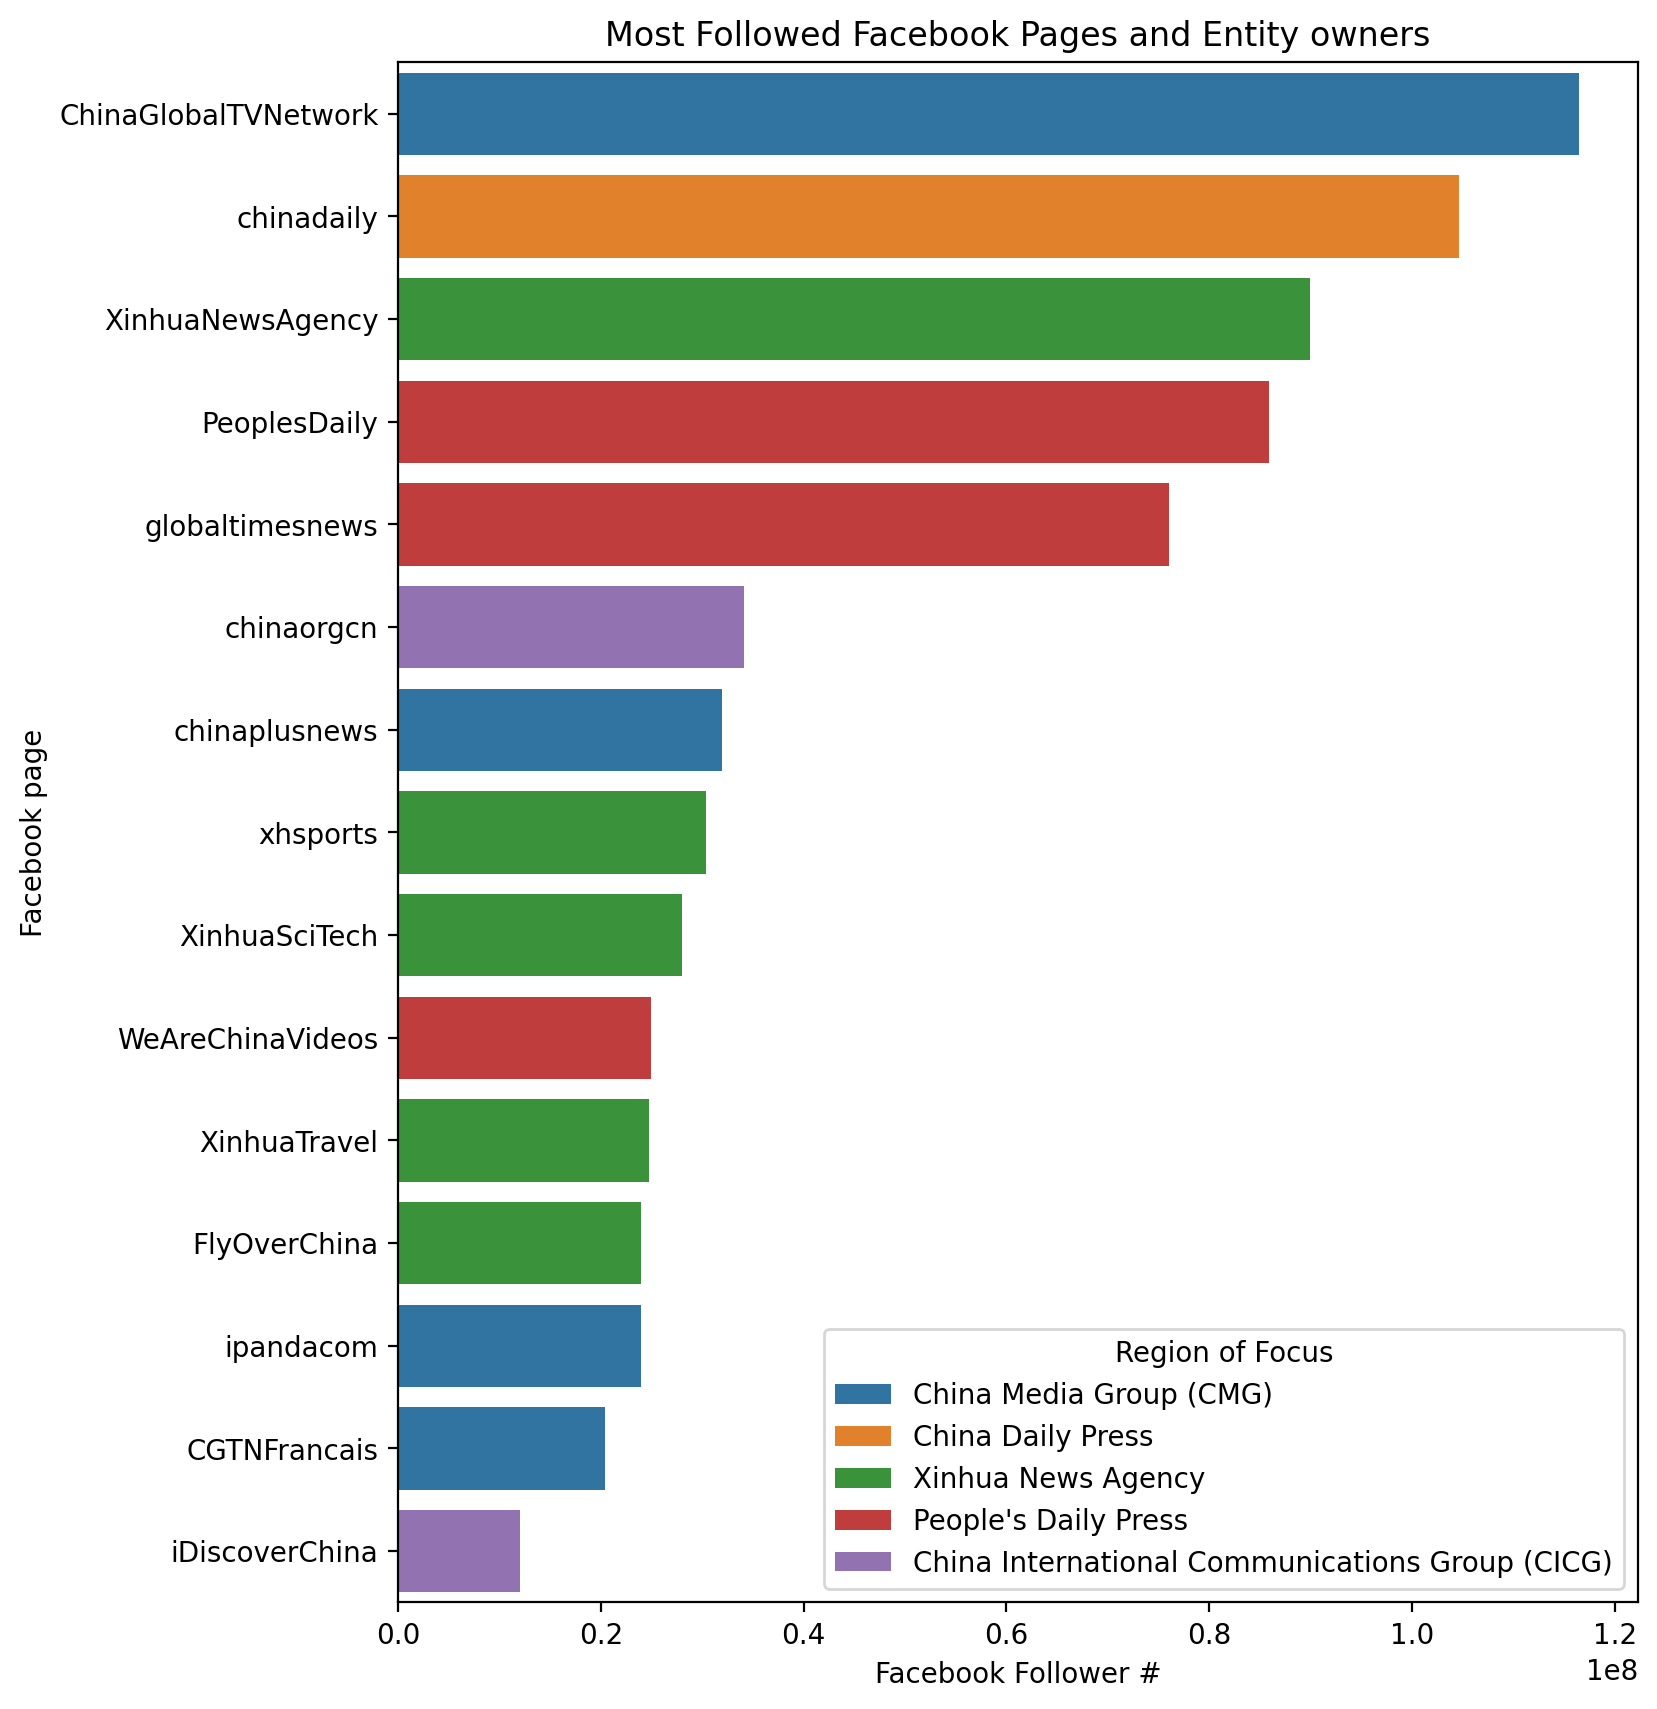

In [36]:
data_facebook = df.sort_values(by='Facebook Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Facebook page", x="Facebook Follower #" , data=data_facebook, hue="Entity owner (English)", palette="tab10",dodge=False)
graph.set(xlabel="Facebook Follower #", title="Most Followed Facebook Pages and Entity owners")
plt.legend(title='Region of Focus')
plt.show()

### Instagram

In [37]:
df['Instragram page'].isna().sum()


619

<Axes: xlabel='Instagram-name Similarity Ratio', ylabel='Count'>

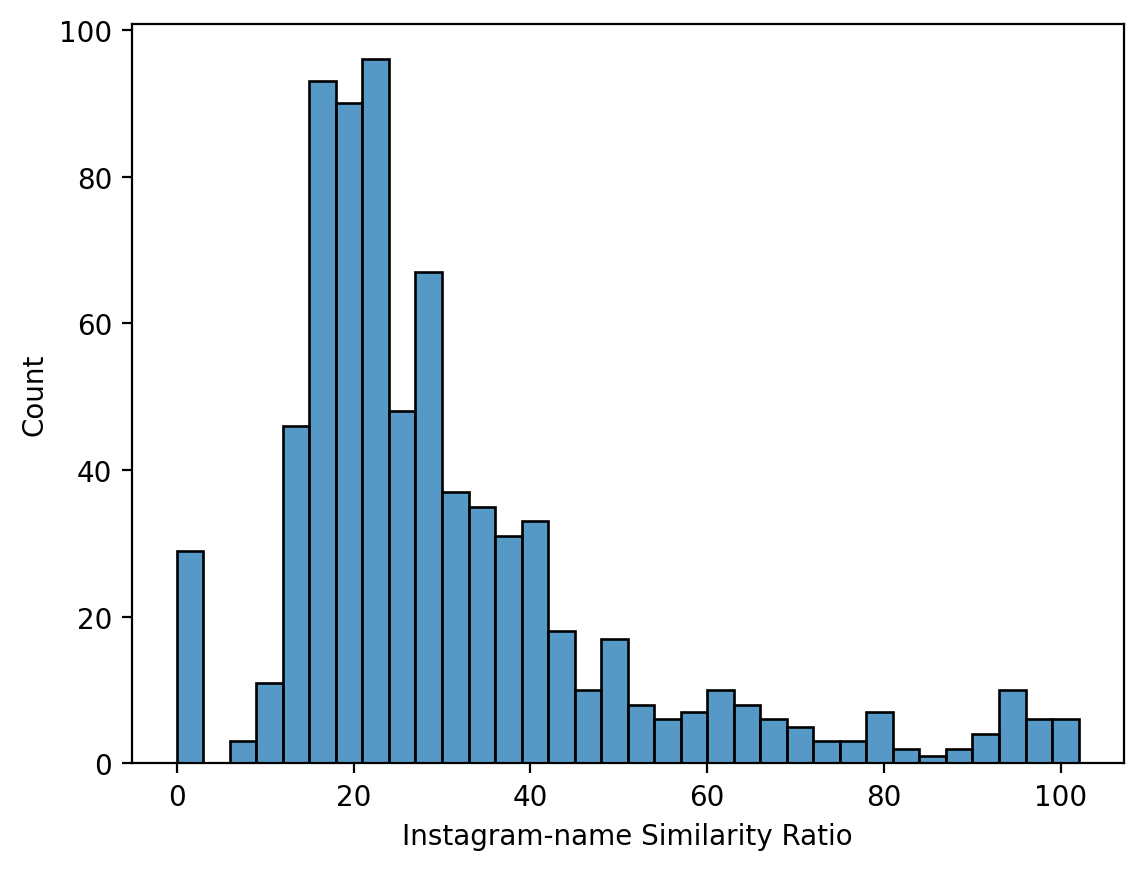

In [38]:
df['Instagram-name Similarity Ratio'] =0
for index, row in df.iterrows():
    similarity_ratio = fuzz.token_set_ratio(row['Instragram page'], row['Name (English)'])   
    df.at[index, 'Instagram-name Similarity Ratio'] = similarity_ratio
    
sns.histplot(data=df, x="Instagram-name Similarity Ratio", binwidth=3)



In [39]:
df['Instagram-name Similarity Ratio'].describe()


count    758.000000
mean      30.187335
std       20.050840
min        0.000000
25%       18.000000
50%       25.000000
75%       36.000000
max      100.000000
Name: Instagram-name Similarity Ratio, dtype: float64

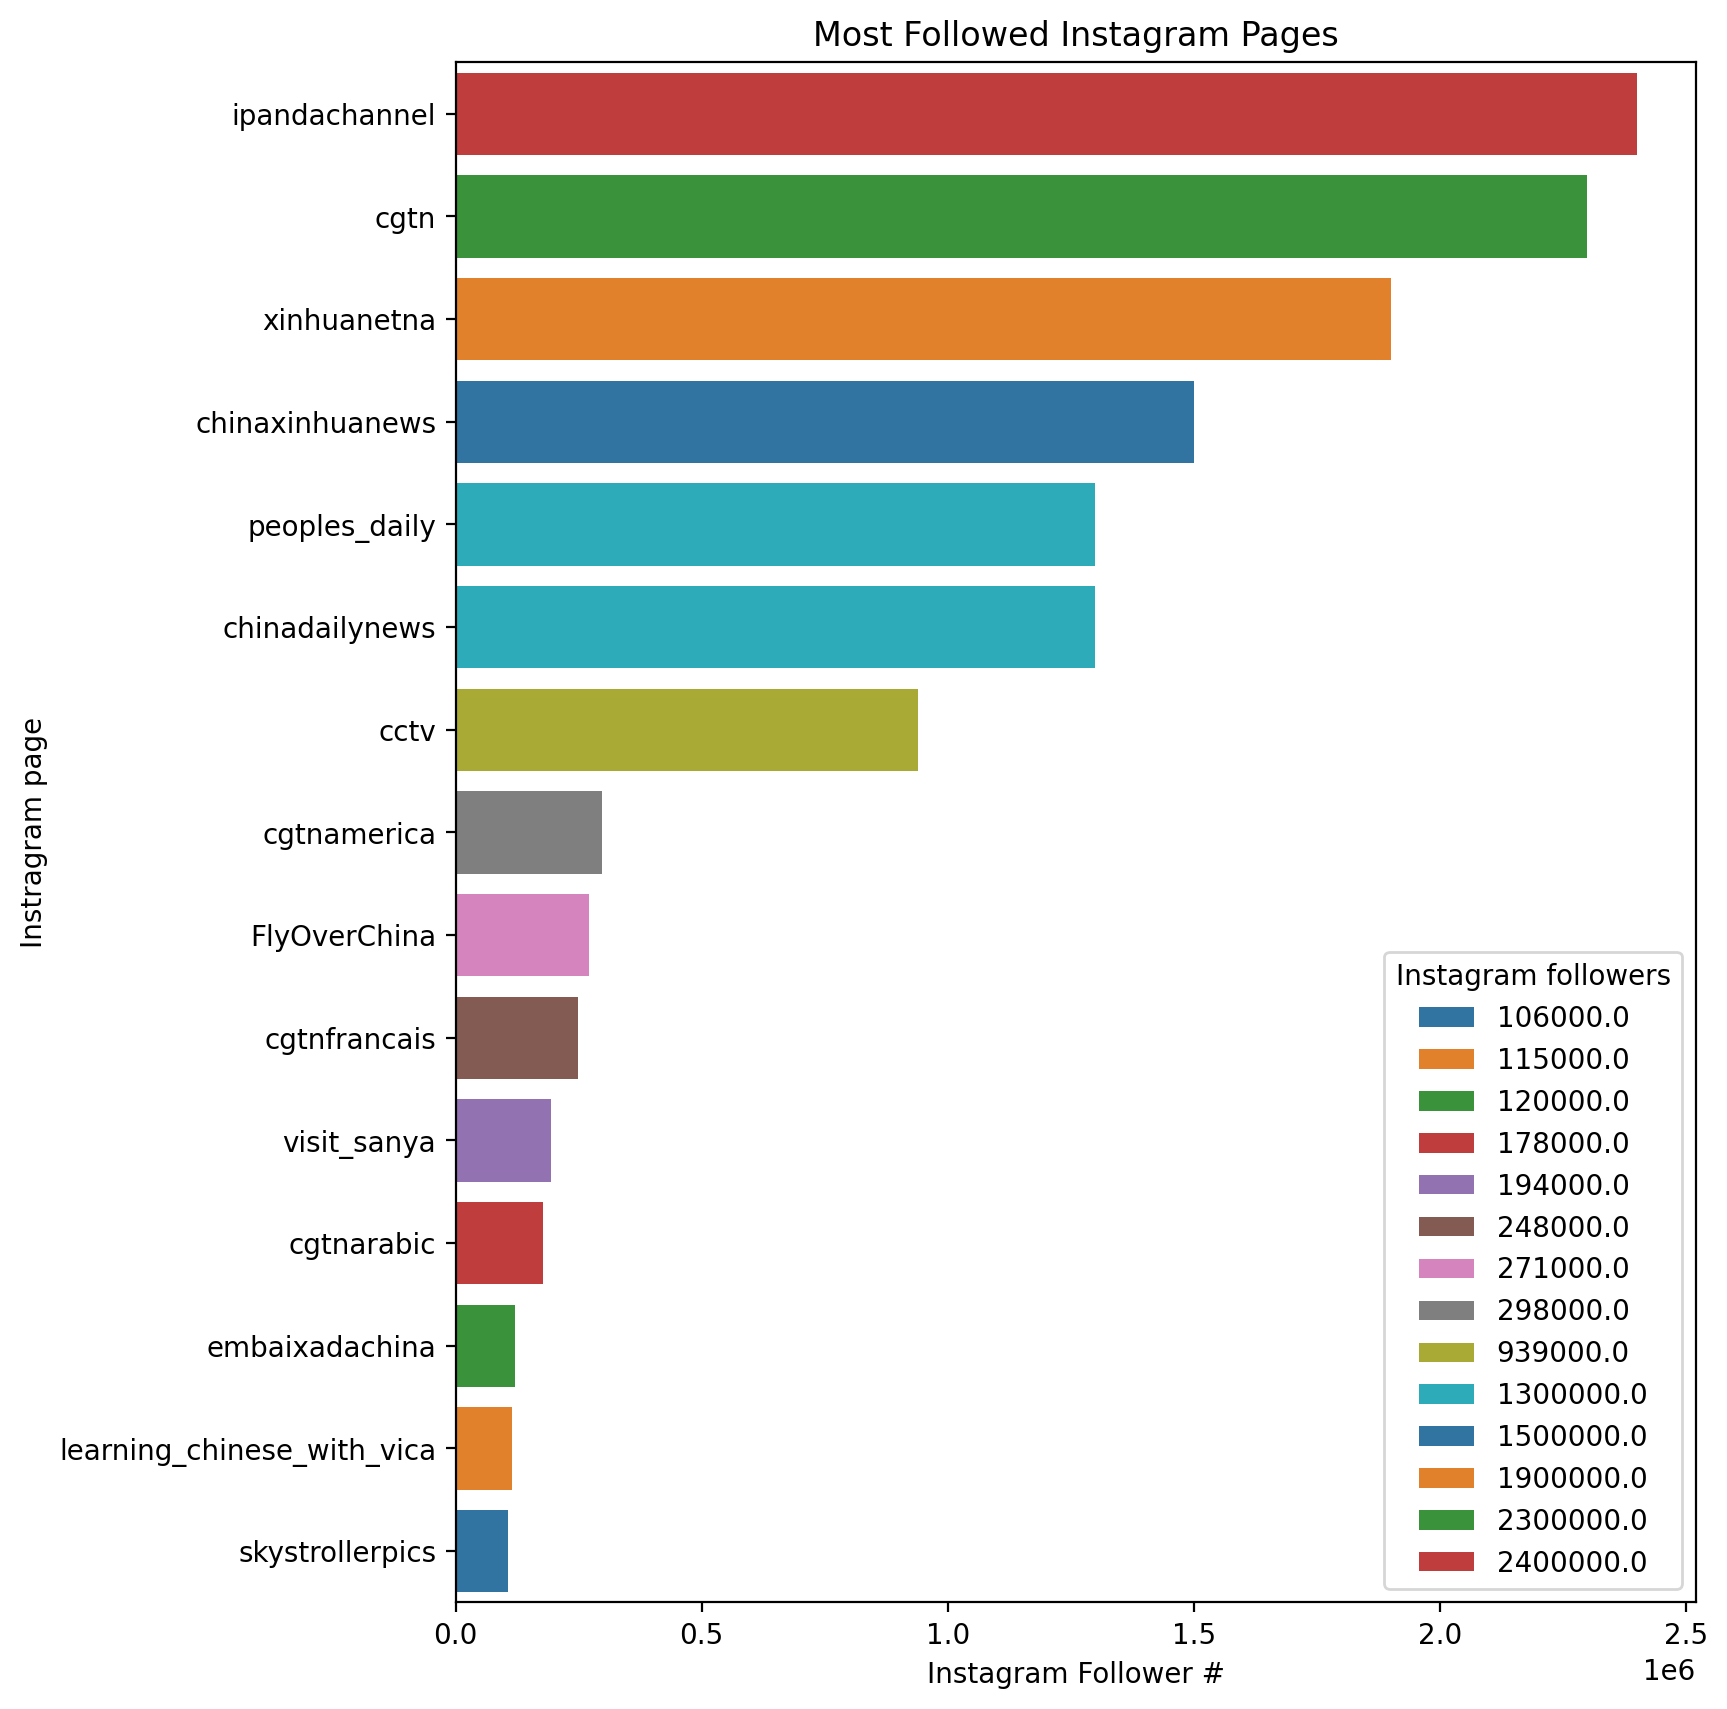

In [40]:

data_Instagram = df.sort_values(by='Instagram Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Instragram page", x="Instagram Follower #" , data=data_Instagram, hue="Instagram Follower #",dodge=False ,palette="tab10")
graph.set(xlabel="Instagram Follower #", title="Most Followed Instagram Pages")
plt.legend(title='Instagram followers')
plt.show()



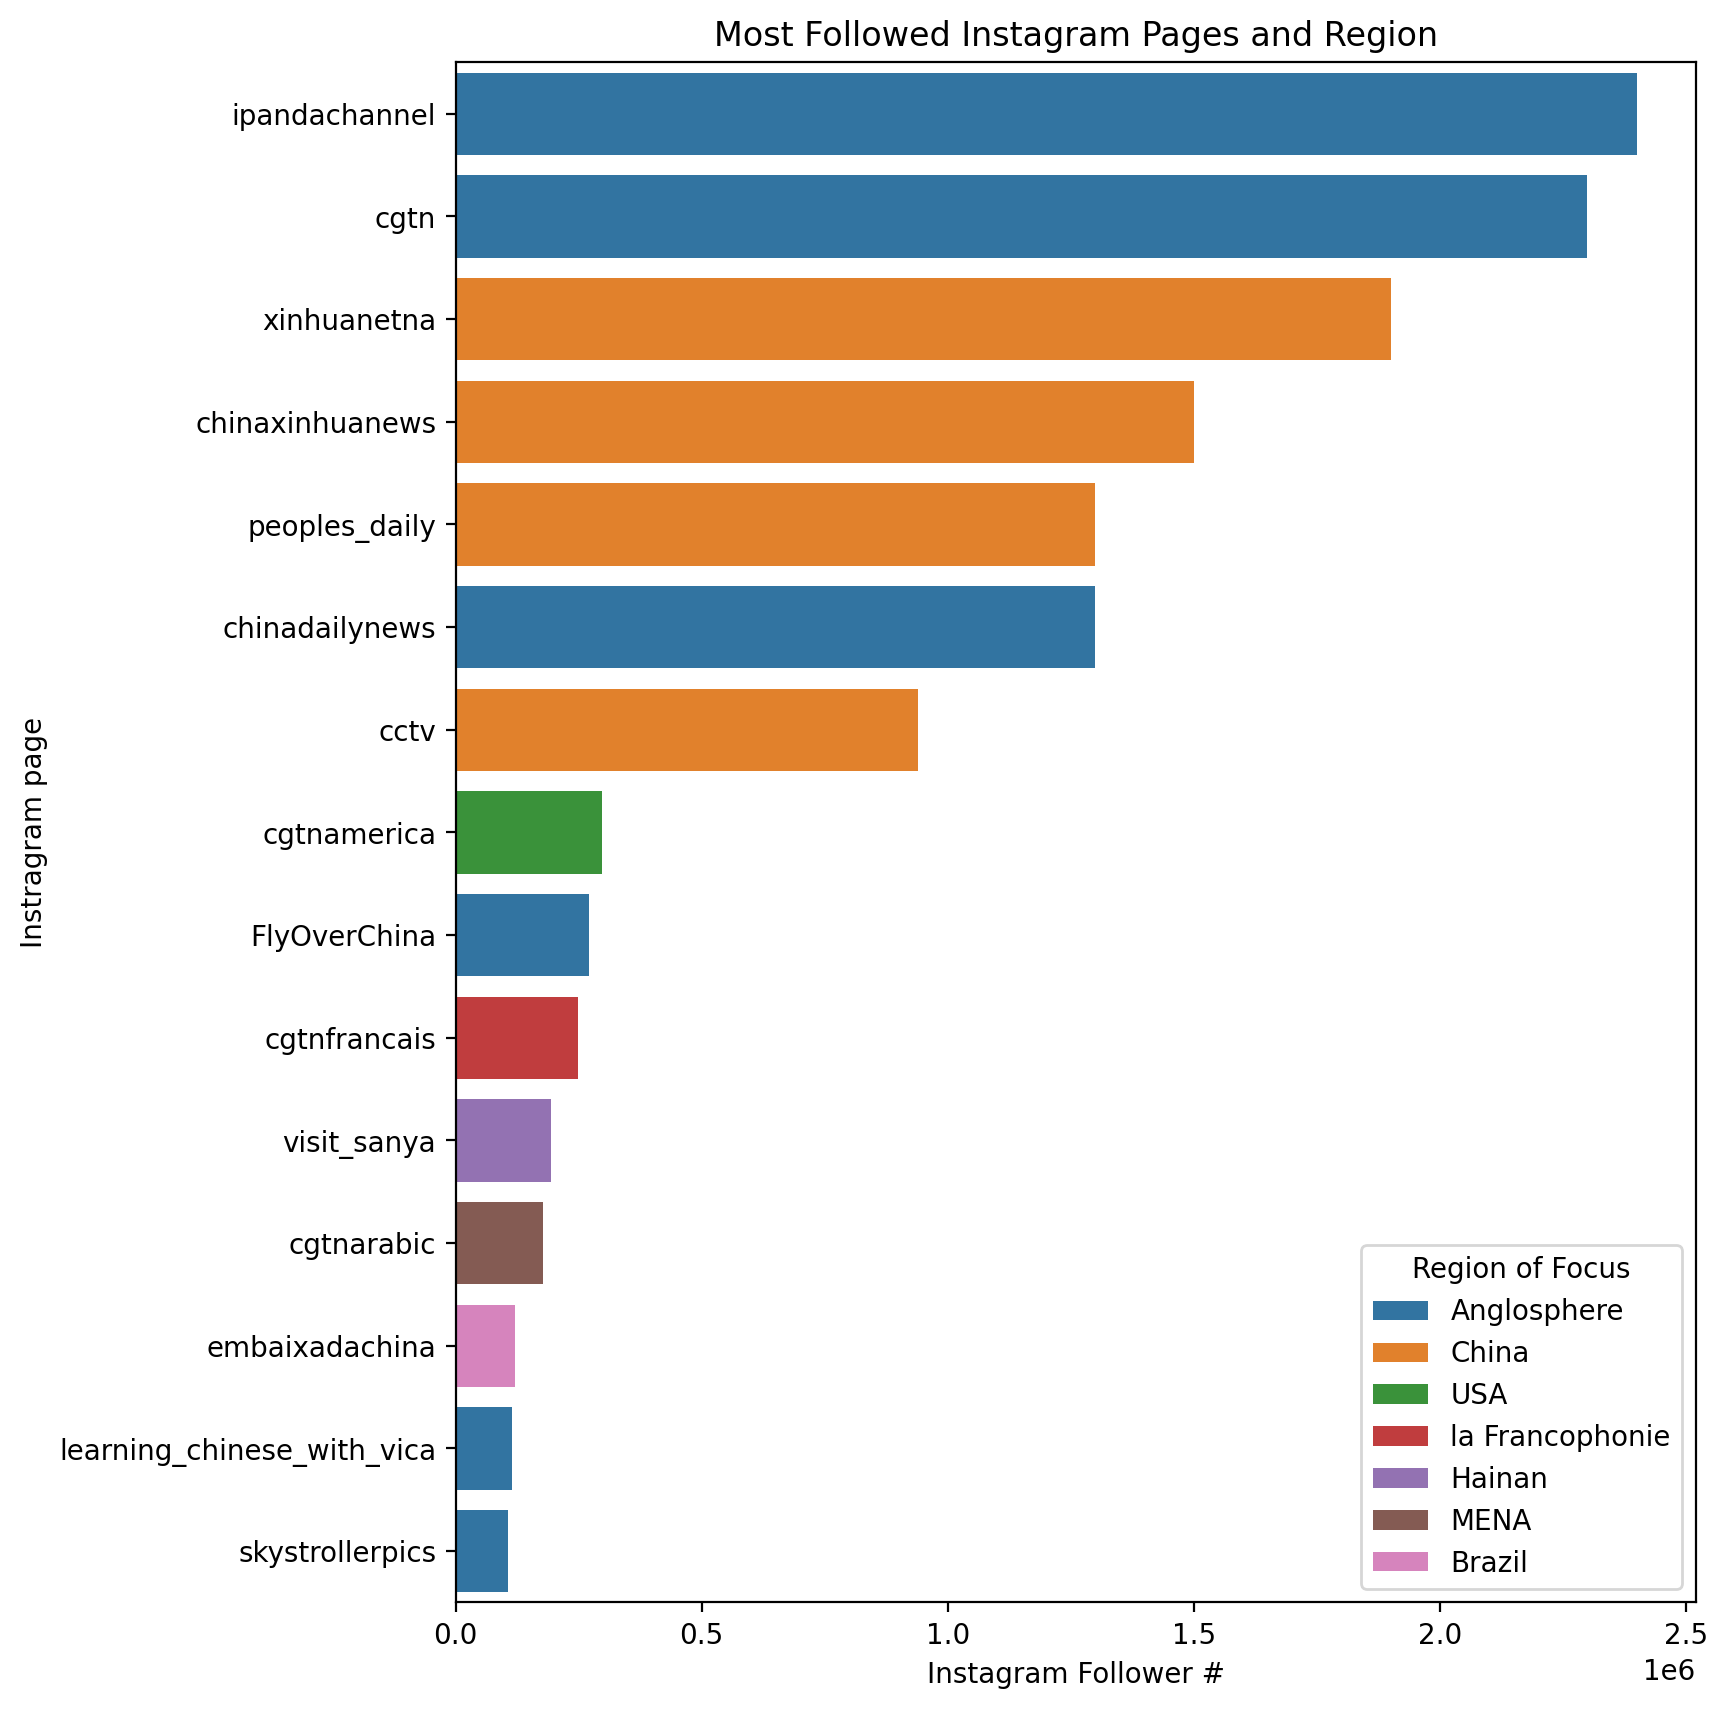

In [41]:
data_Instagram = df.sort_values(by='Instagram Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Instragram page", x="Instagram Follower #" ,dodge =False, data=data_Instagram, hue="Region of Focus", palette="tab10")
graph.set(xlabel="Instagram Follower #", title="Most Followed Instagram Pages and Region")
plt.legend(title='Region of Focus')
plt.show()

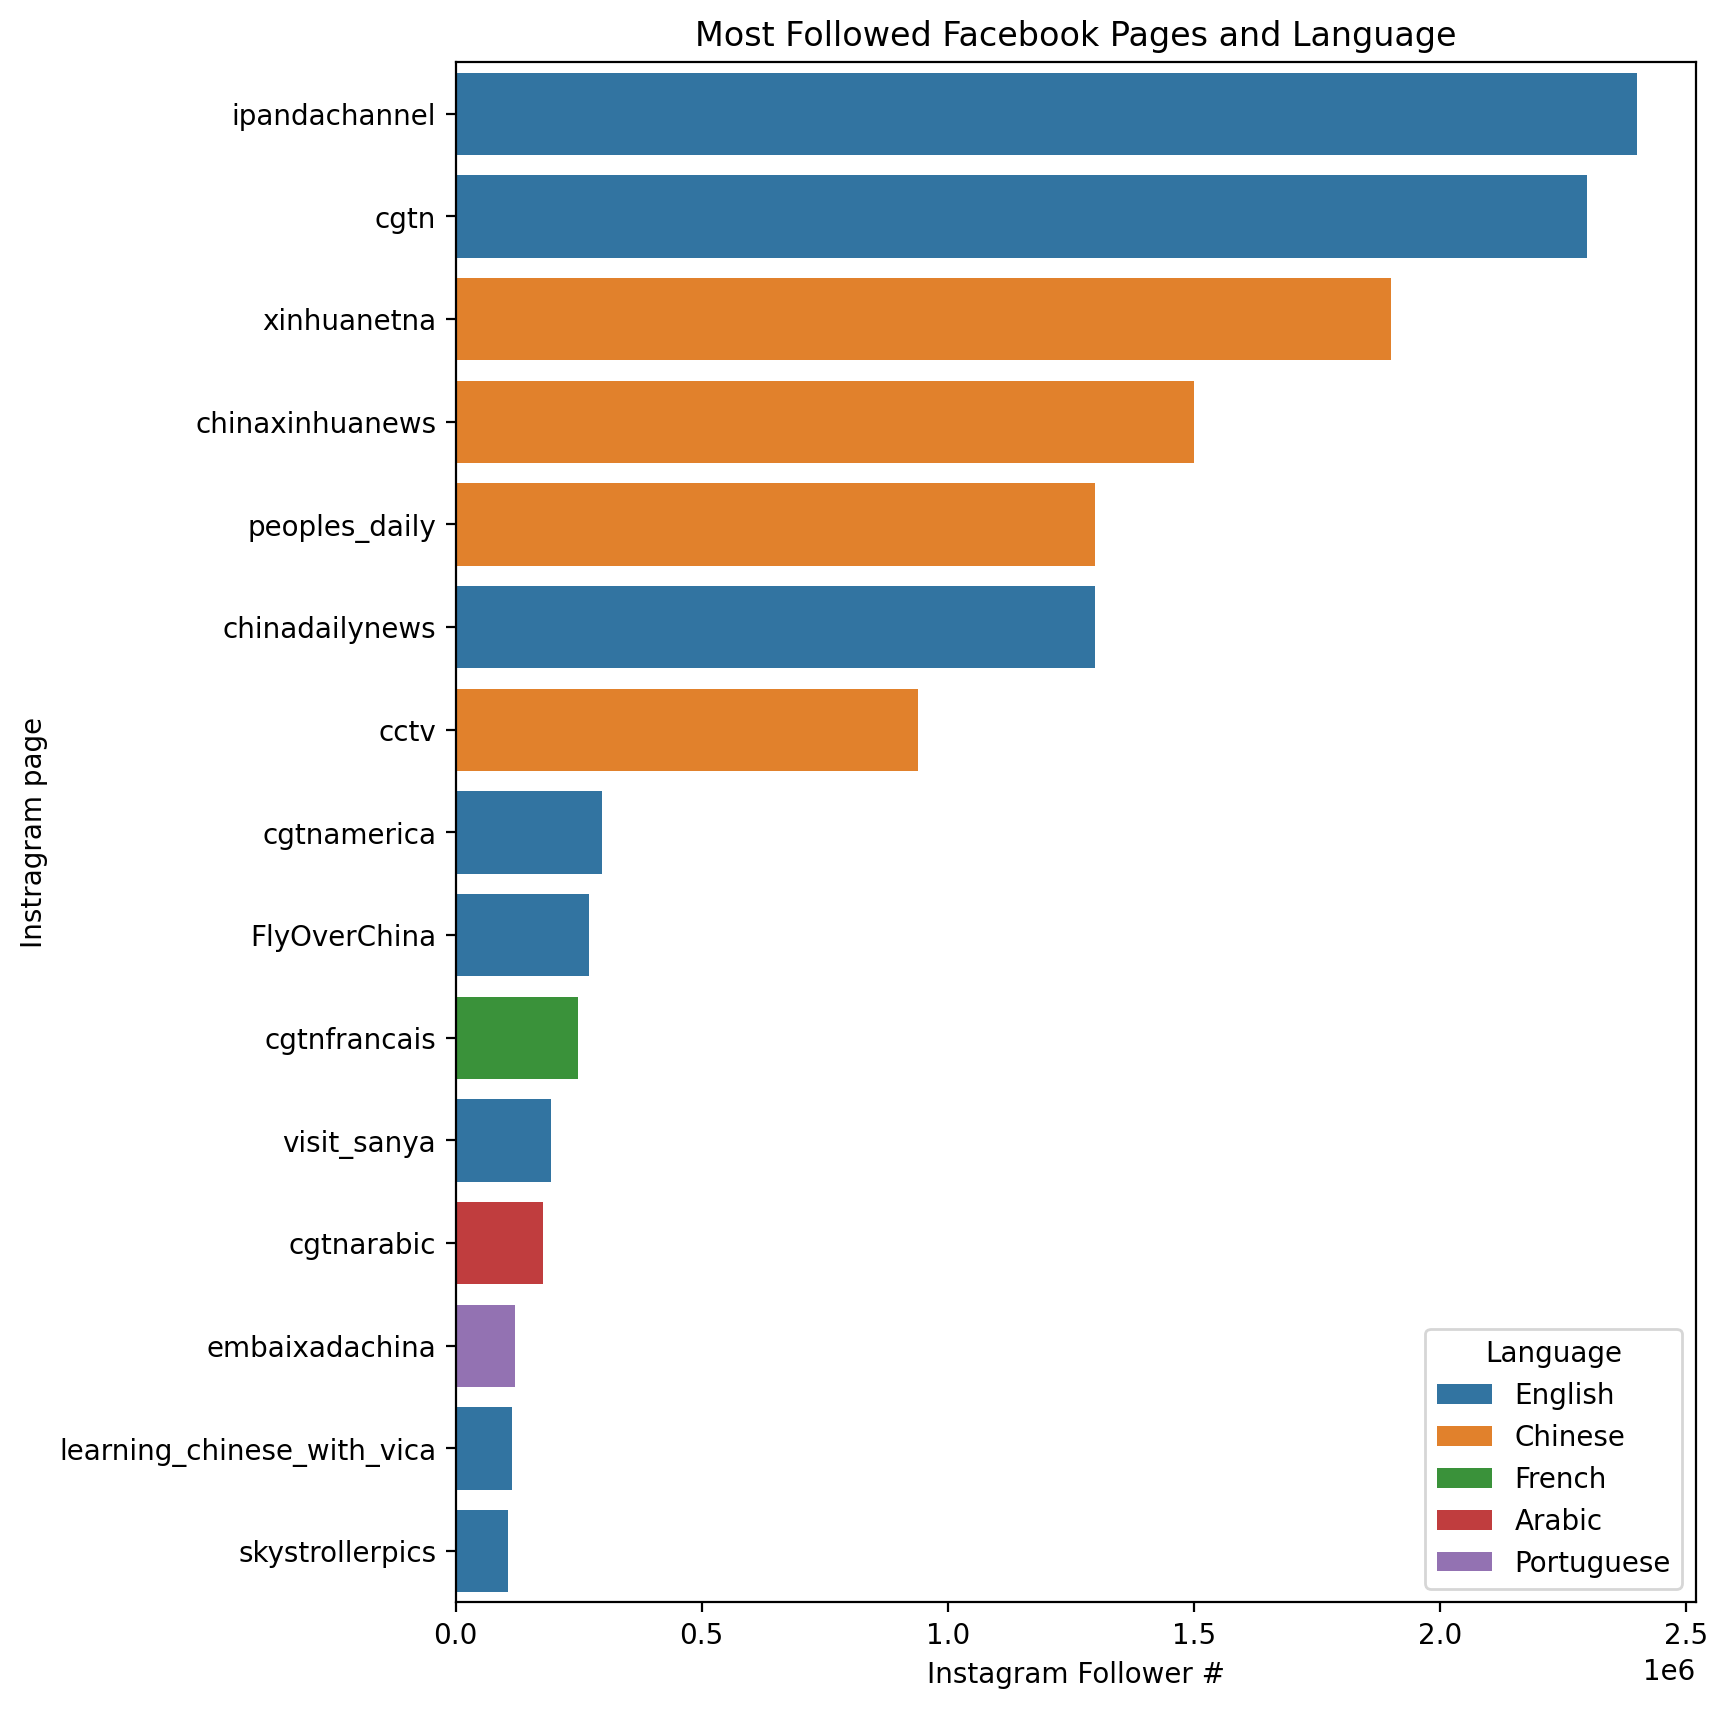

In [42]:
data_Instagram = df.sort_values(by='Instagram Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Instragram page", x="Instagram Follower #" , dodge =False,data=data_Instagram, hue="Language", palette="tab10")
graph.set(xlabel="Instagram Follower #", title="Most Followed Facebook Pages and Language")
plt.legend(title='Language')
plt.show()

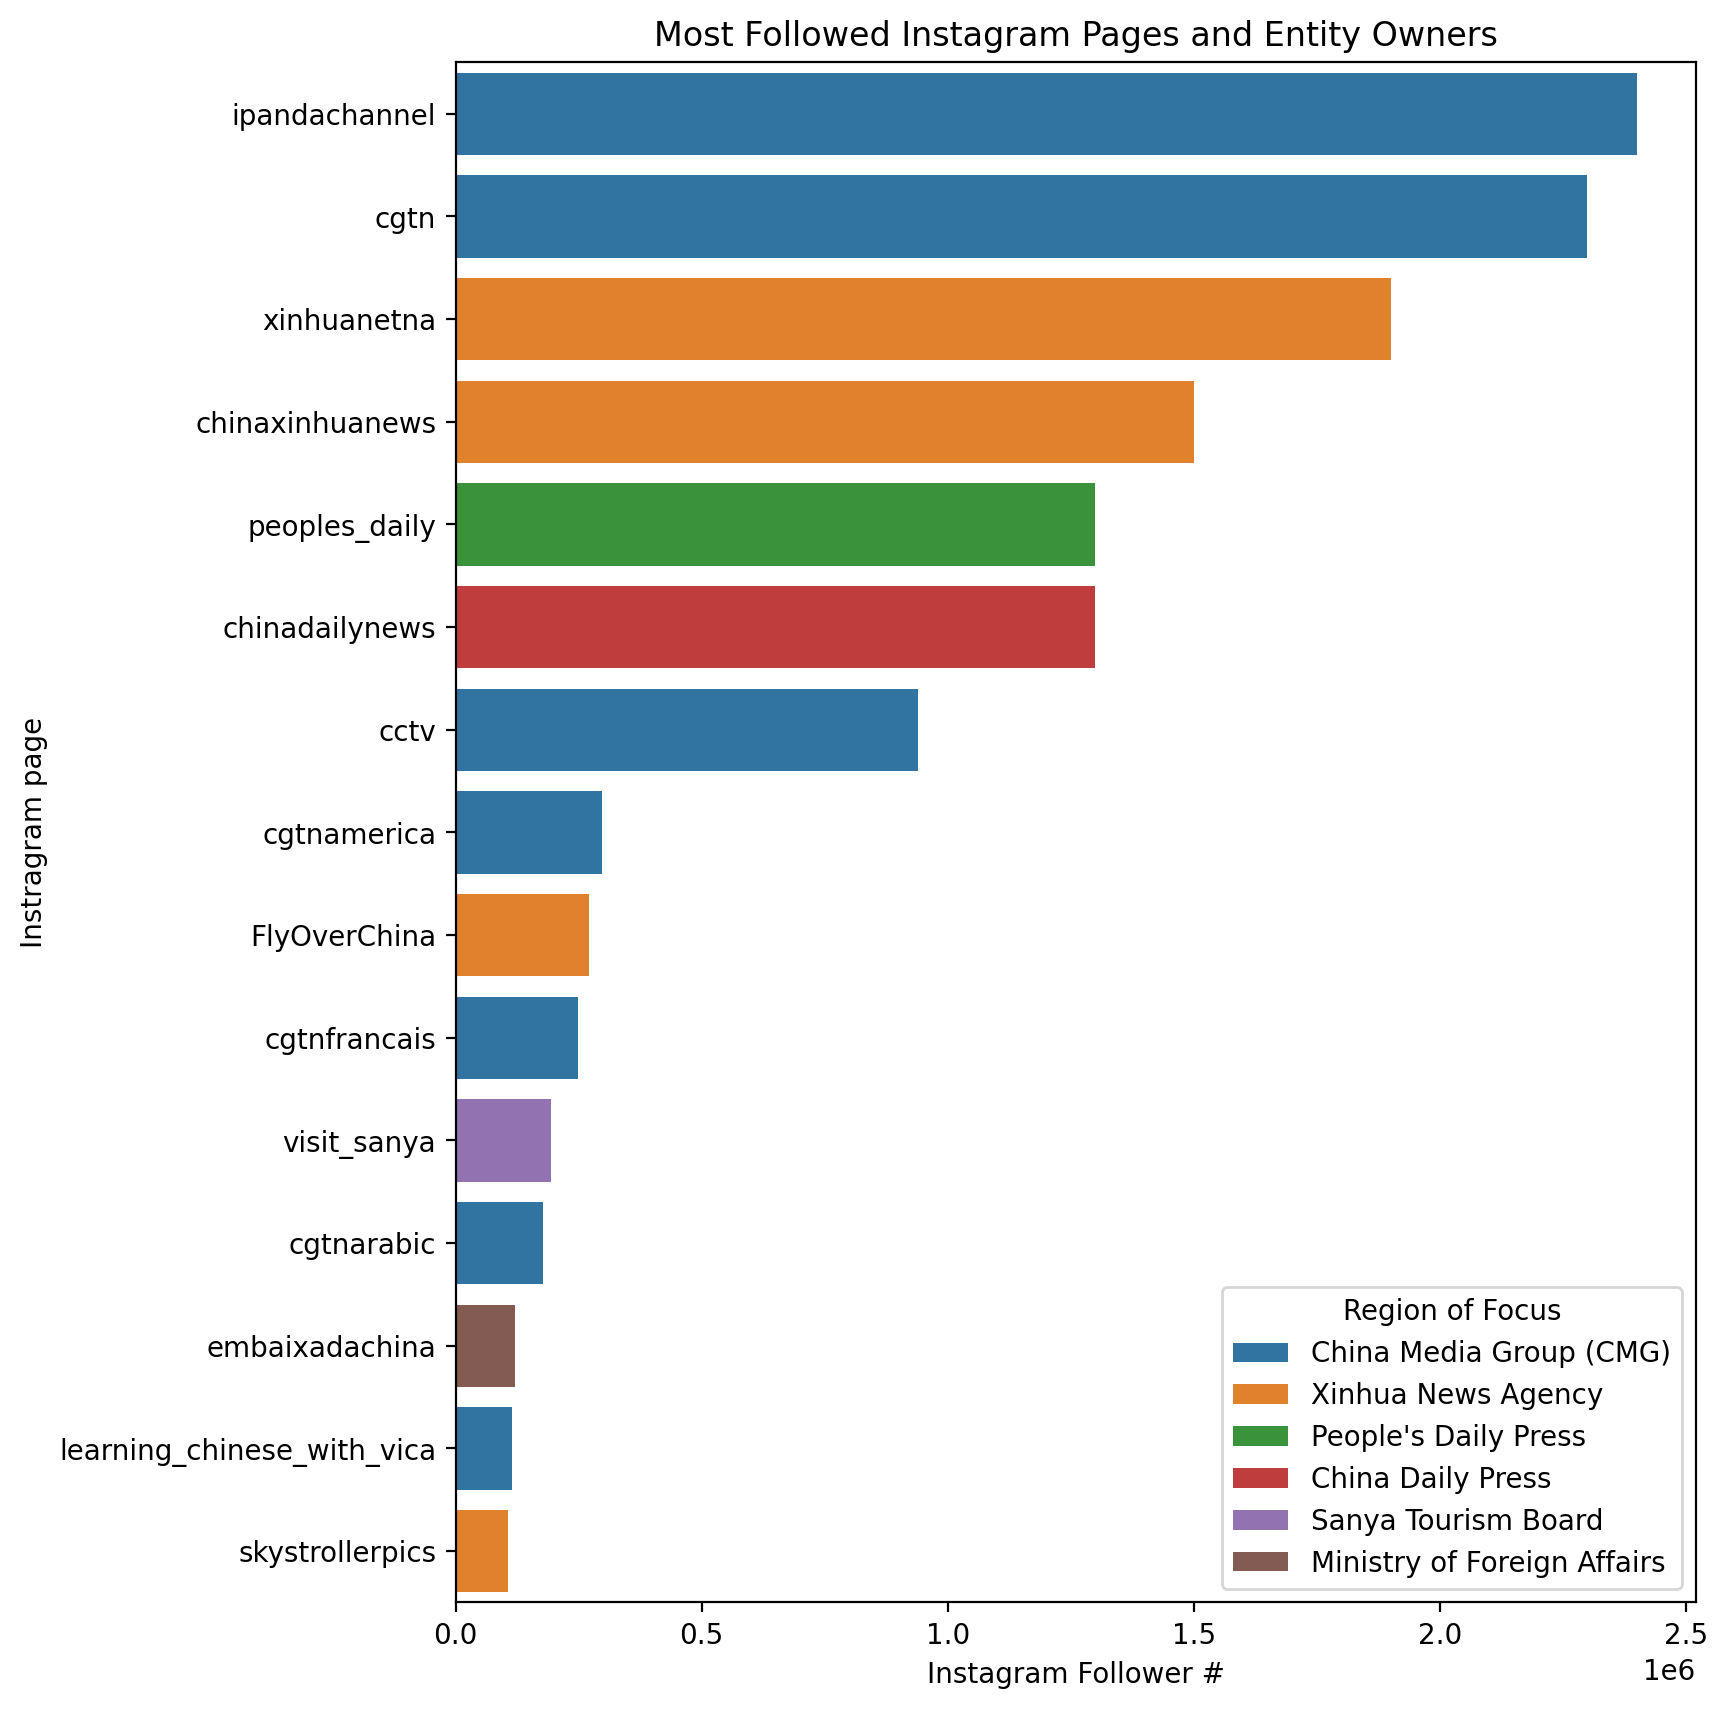

In [43]:
data_Instagram = df.sort_values(by='Instagram Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Instragram page", x="Instagram Follower #" ,dodge =False, data=data_Instagram, hue="Entity owner (English)", palette="tab10")
graph.set(xlabel="Instagram Follower #", title="Most Followed Instagram Pages and Entity Owners")
plt.legend(title='Region of Focus')
plt.show()

### Threads

In [44]:
df['Threads account'].isna().sum()

723

<Axes: xlabel='Threads-name Similarity Ratio', ylabel='Count'>

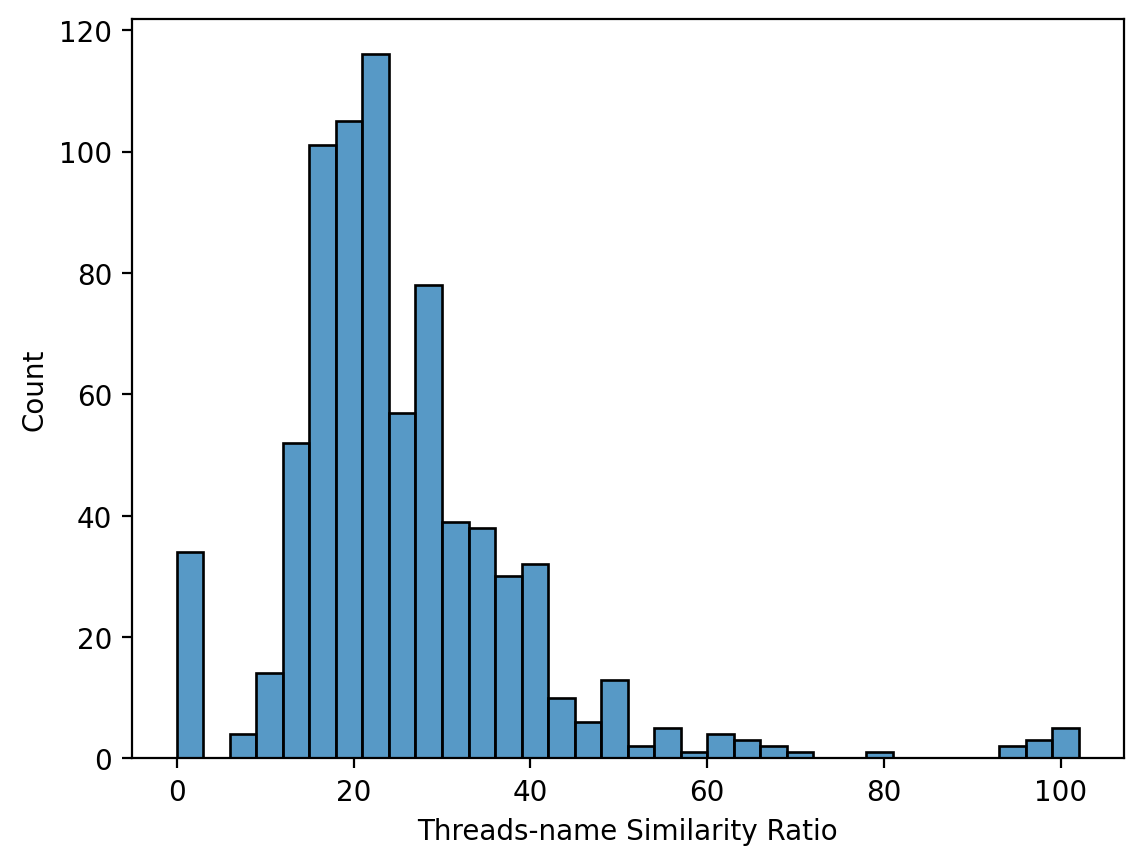

In [45]:
df['Threads-name Similarity Ratio'] =0
for index, row in df.iterrows():
    similarity_ratio = fuzz.token_set_ratio(row['Threads account'], row['Name (English)'])   
    df.at[index, 'Threads-name Similarity Ratio'] = similarity_ratio
    
sns.histplot(data=df, x="Threads-name Similarity Ratio", binwidth=3)

In [46]:
df['Threads-name Similarity Ratio'].describe()

count    758.000000
mean      24.978892
std       14.328919
min        0.000000
25%       17.000000
50%       22.000000
75%       30.000000
max      100.000000
Name: Threads-name Similarity Ratio, dtype: float64

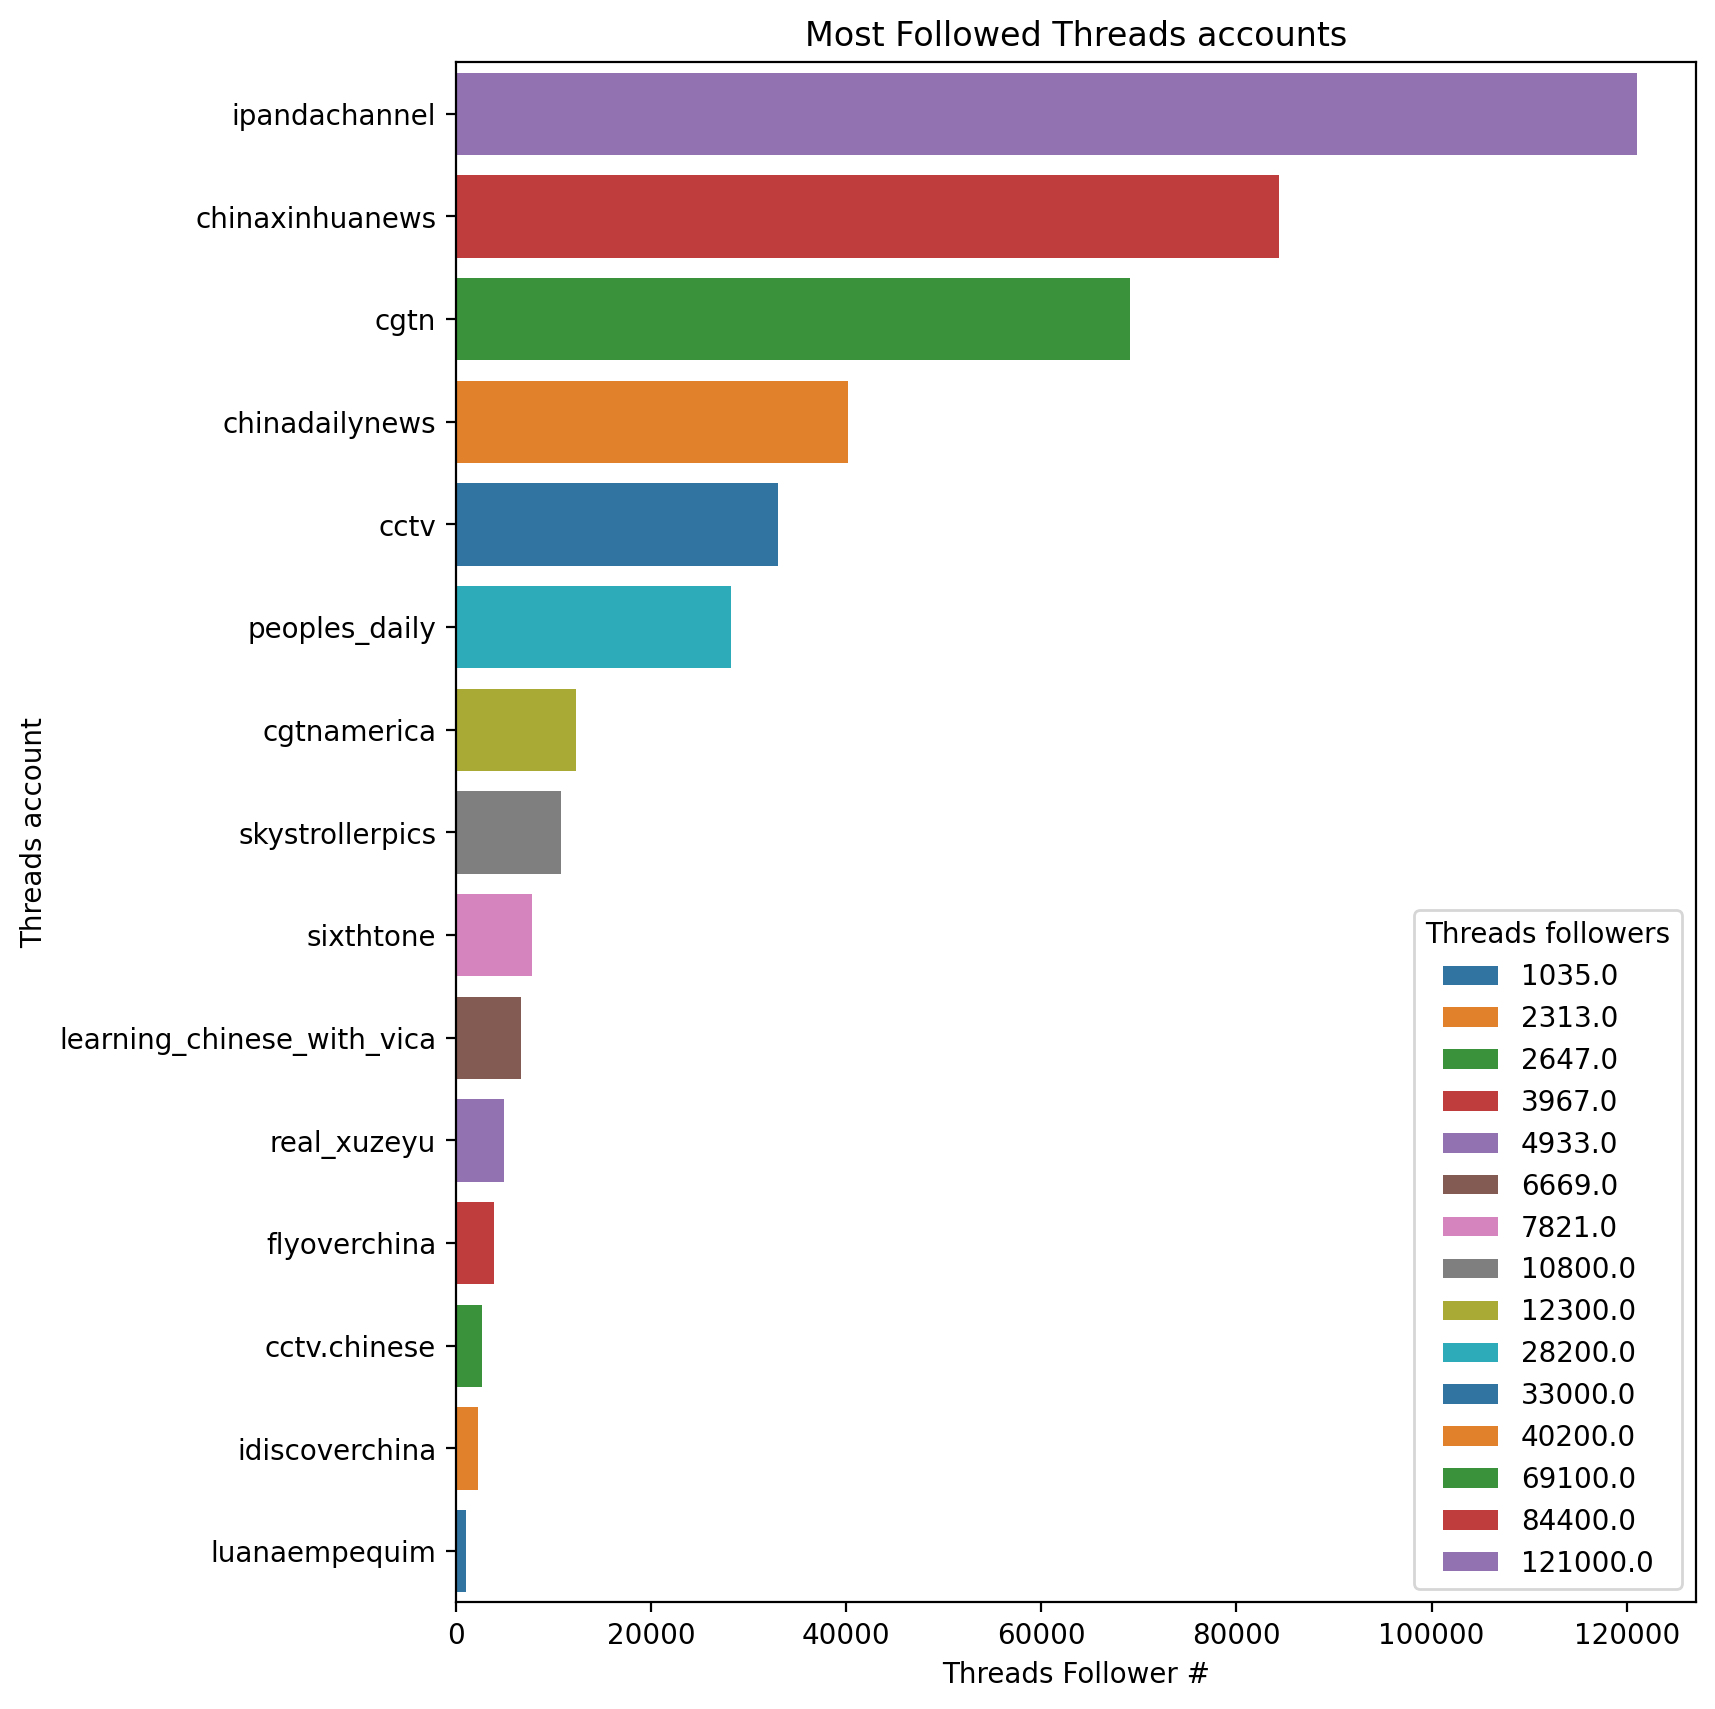

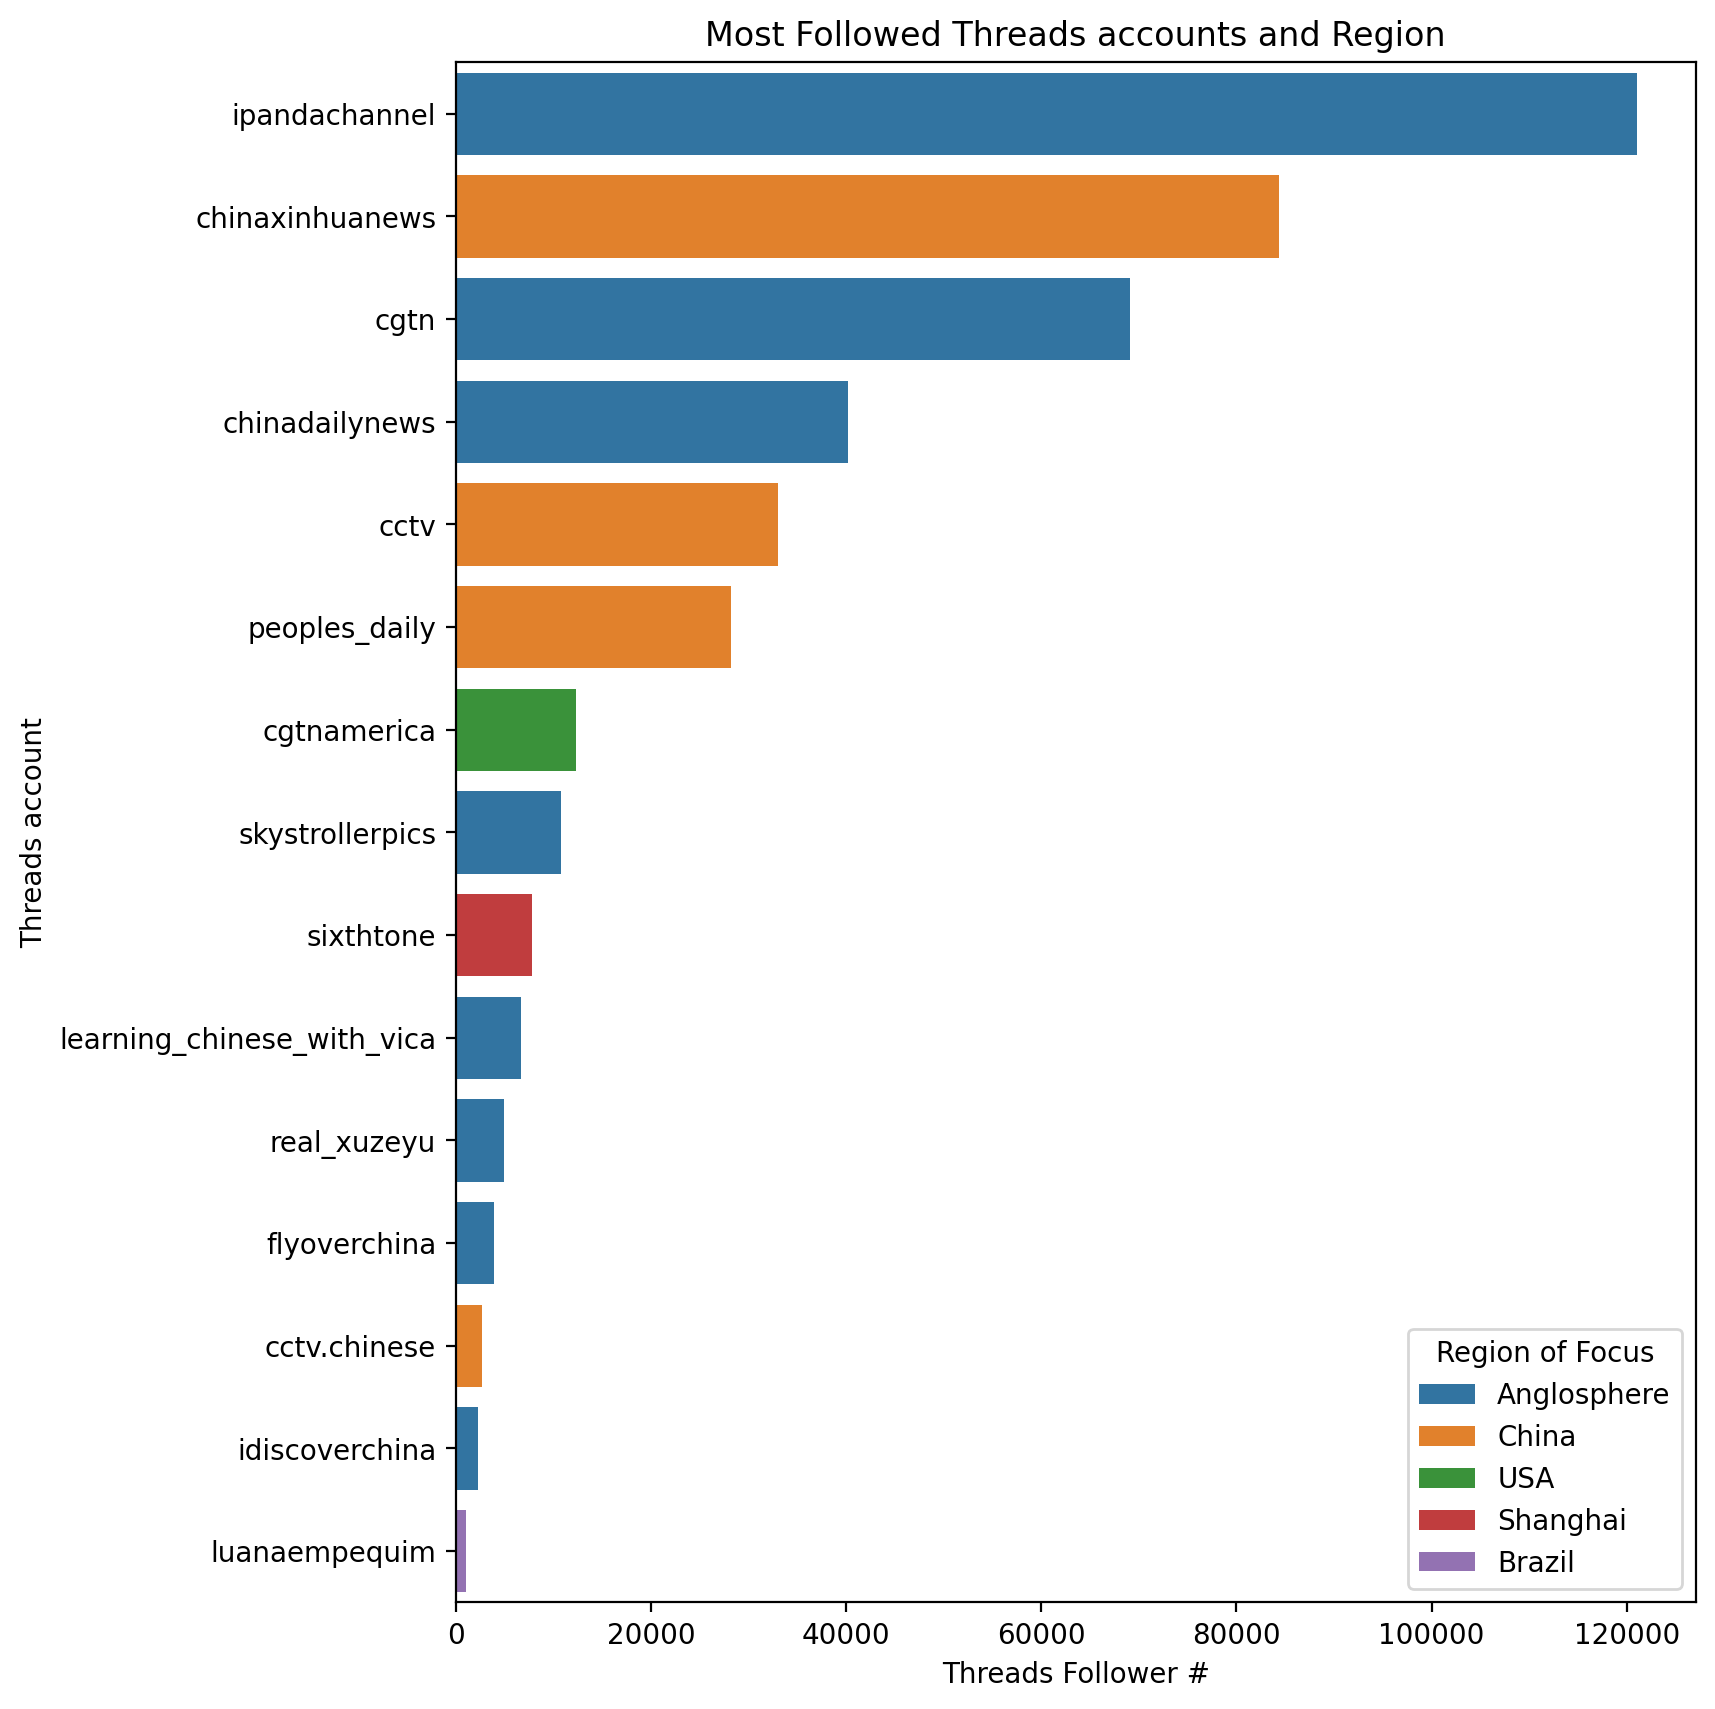

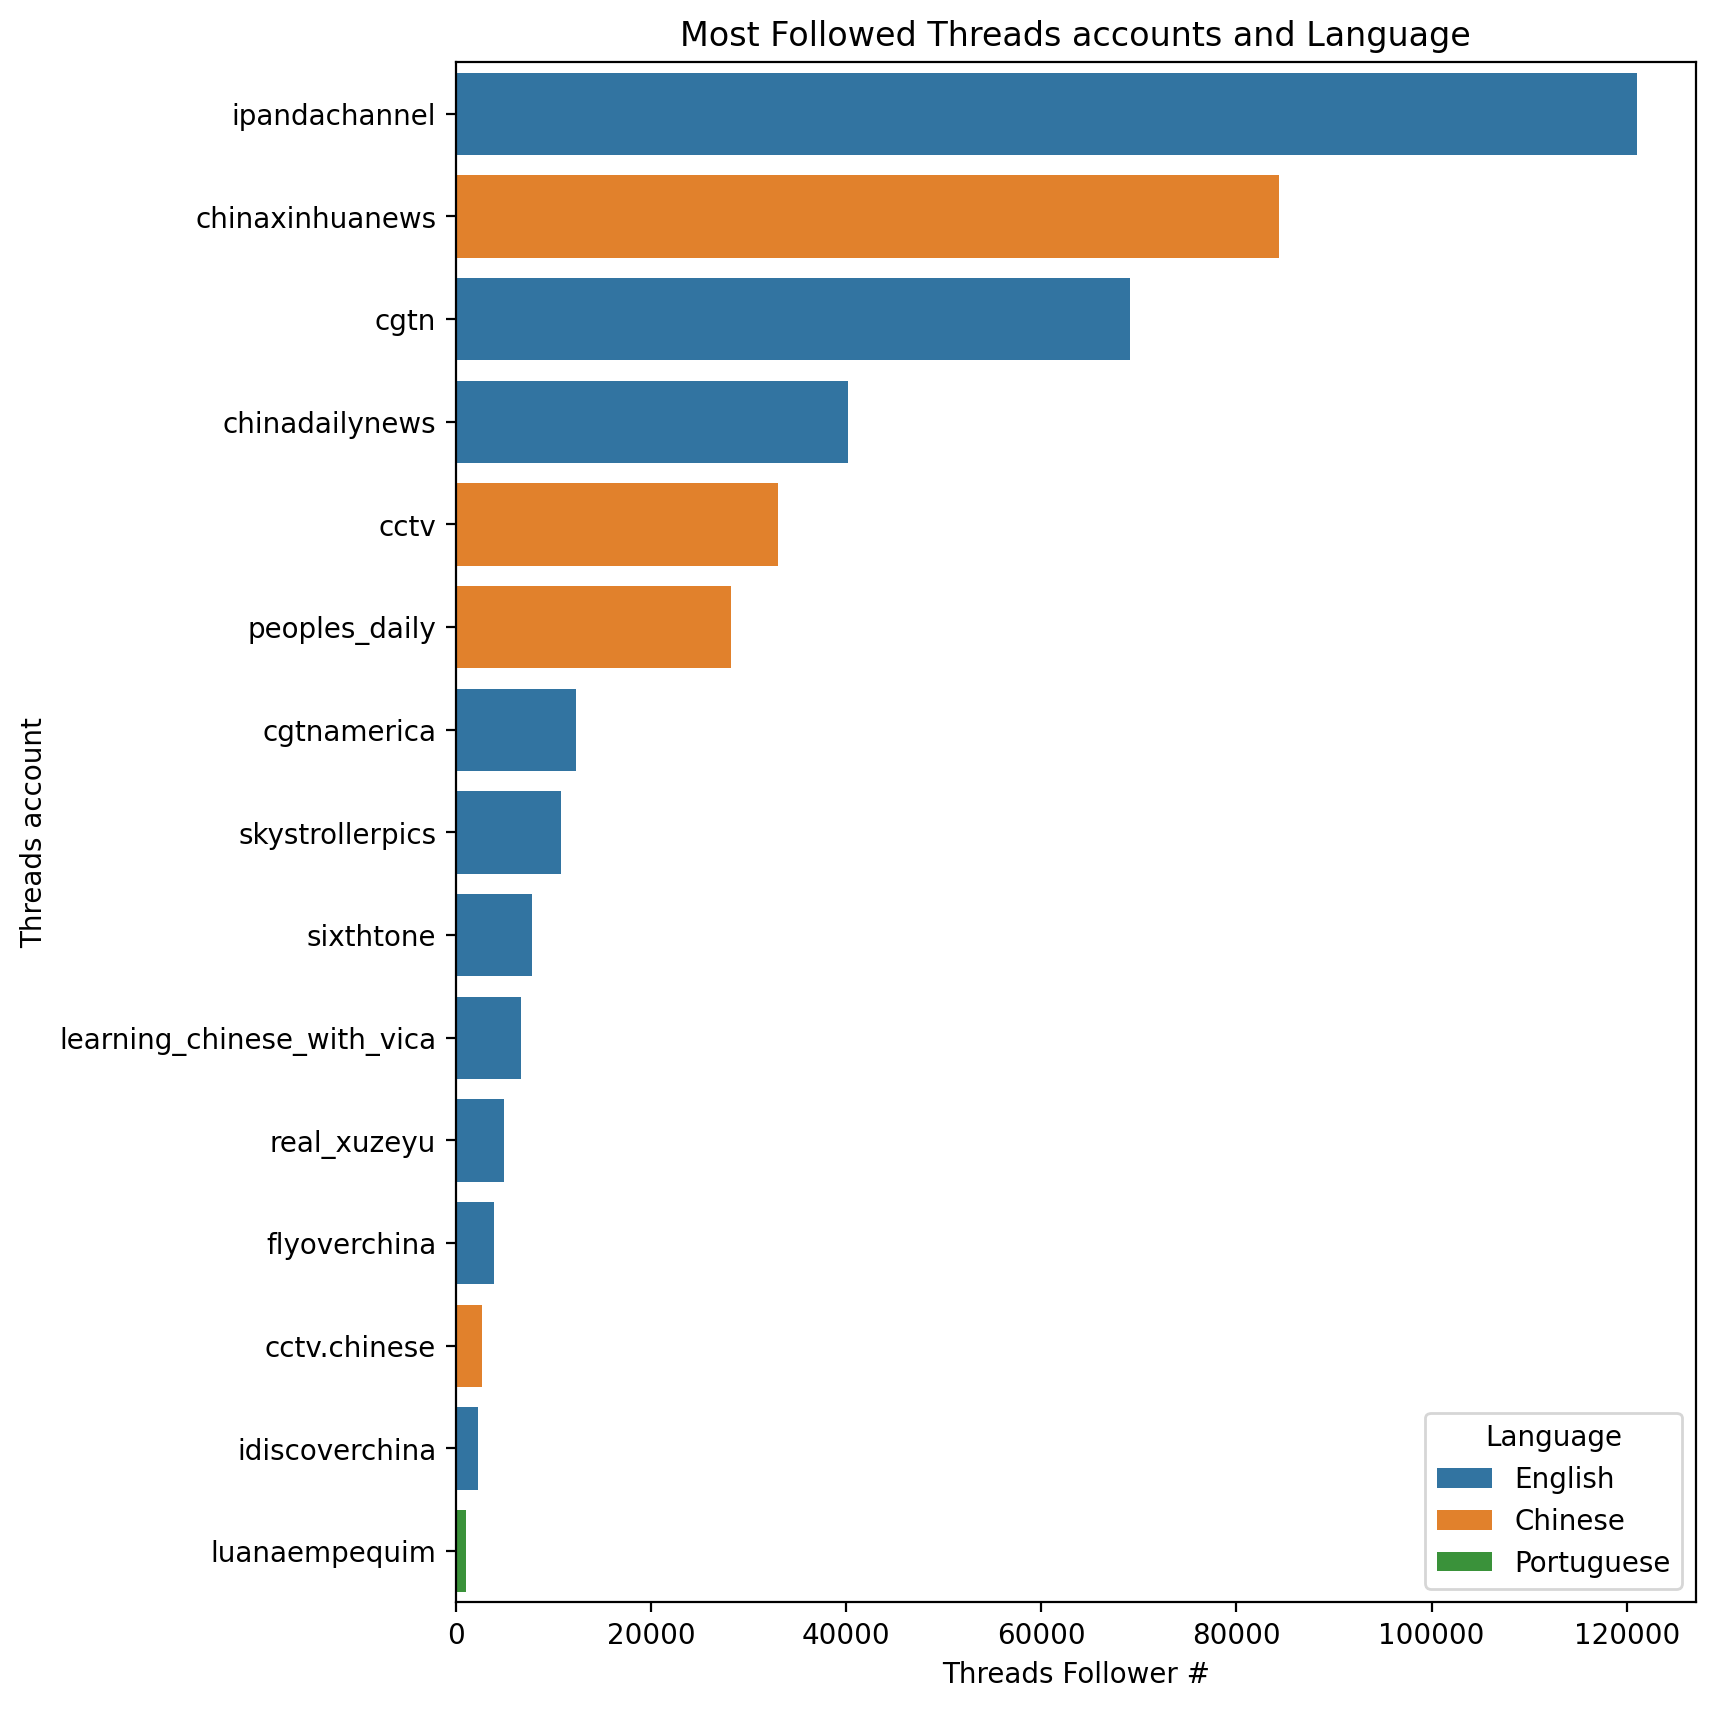

In [47]:
data_Threads = df.sort_values(by='Threads Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Threads account", x="Threads Follower #" , data=data_Threads,dodge=False, hue="Threads Follower #", palette="tab10")
graph.set(xlabel="Threads Follower #", title="Most Followed Threads accounts")
plt.legend(title='Threads followers')
plt.show()

data_Threads = df.sort_values(by='Threads Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Threads account", x="Threads Follower #" , data=data_Threads,dodge=False, hue="Region of Focus", palette="tab10")
graph.set(xlabel="Threads Follower #", title="Most Followed Threads accounts and Region")
plt.legend(title='Region of Focus')
plt.show()

data_Threads = df.sort_values(by='Threads Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Threads account", x="Threads Follower #" , data=data_Threads,dodge=False, hue="Language", palette="tab10")
graph.set(xlabel="Threads Follower #", title="Most Followed Threads accounts and Language")
plt.legend(title='Language')
plt.show()

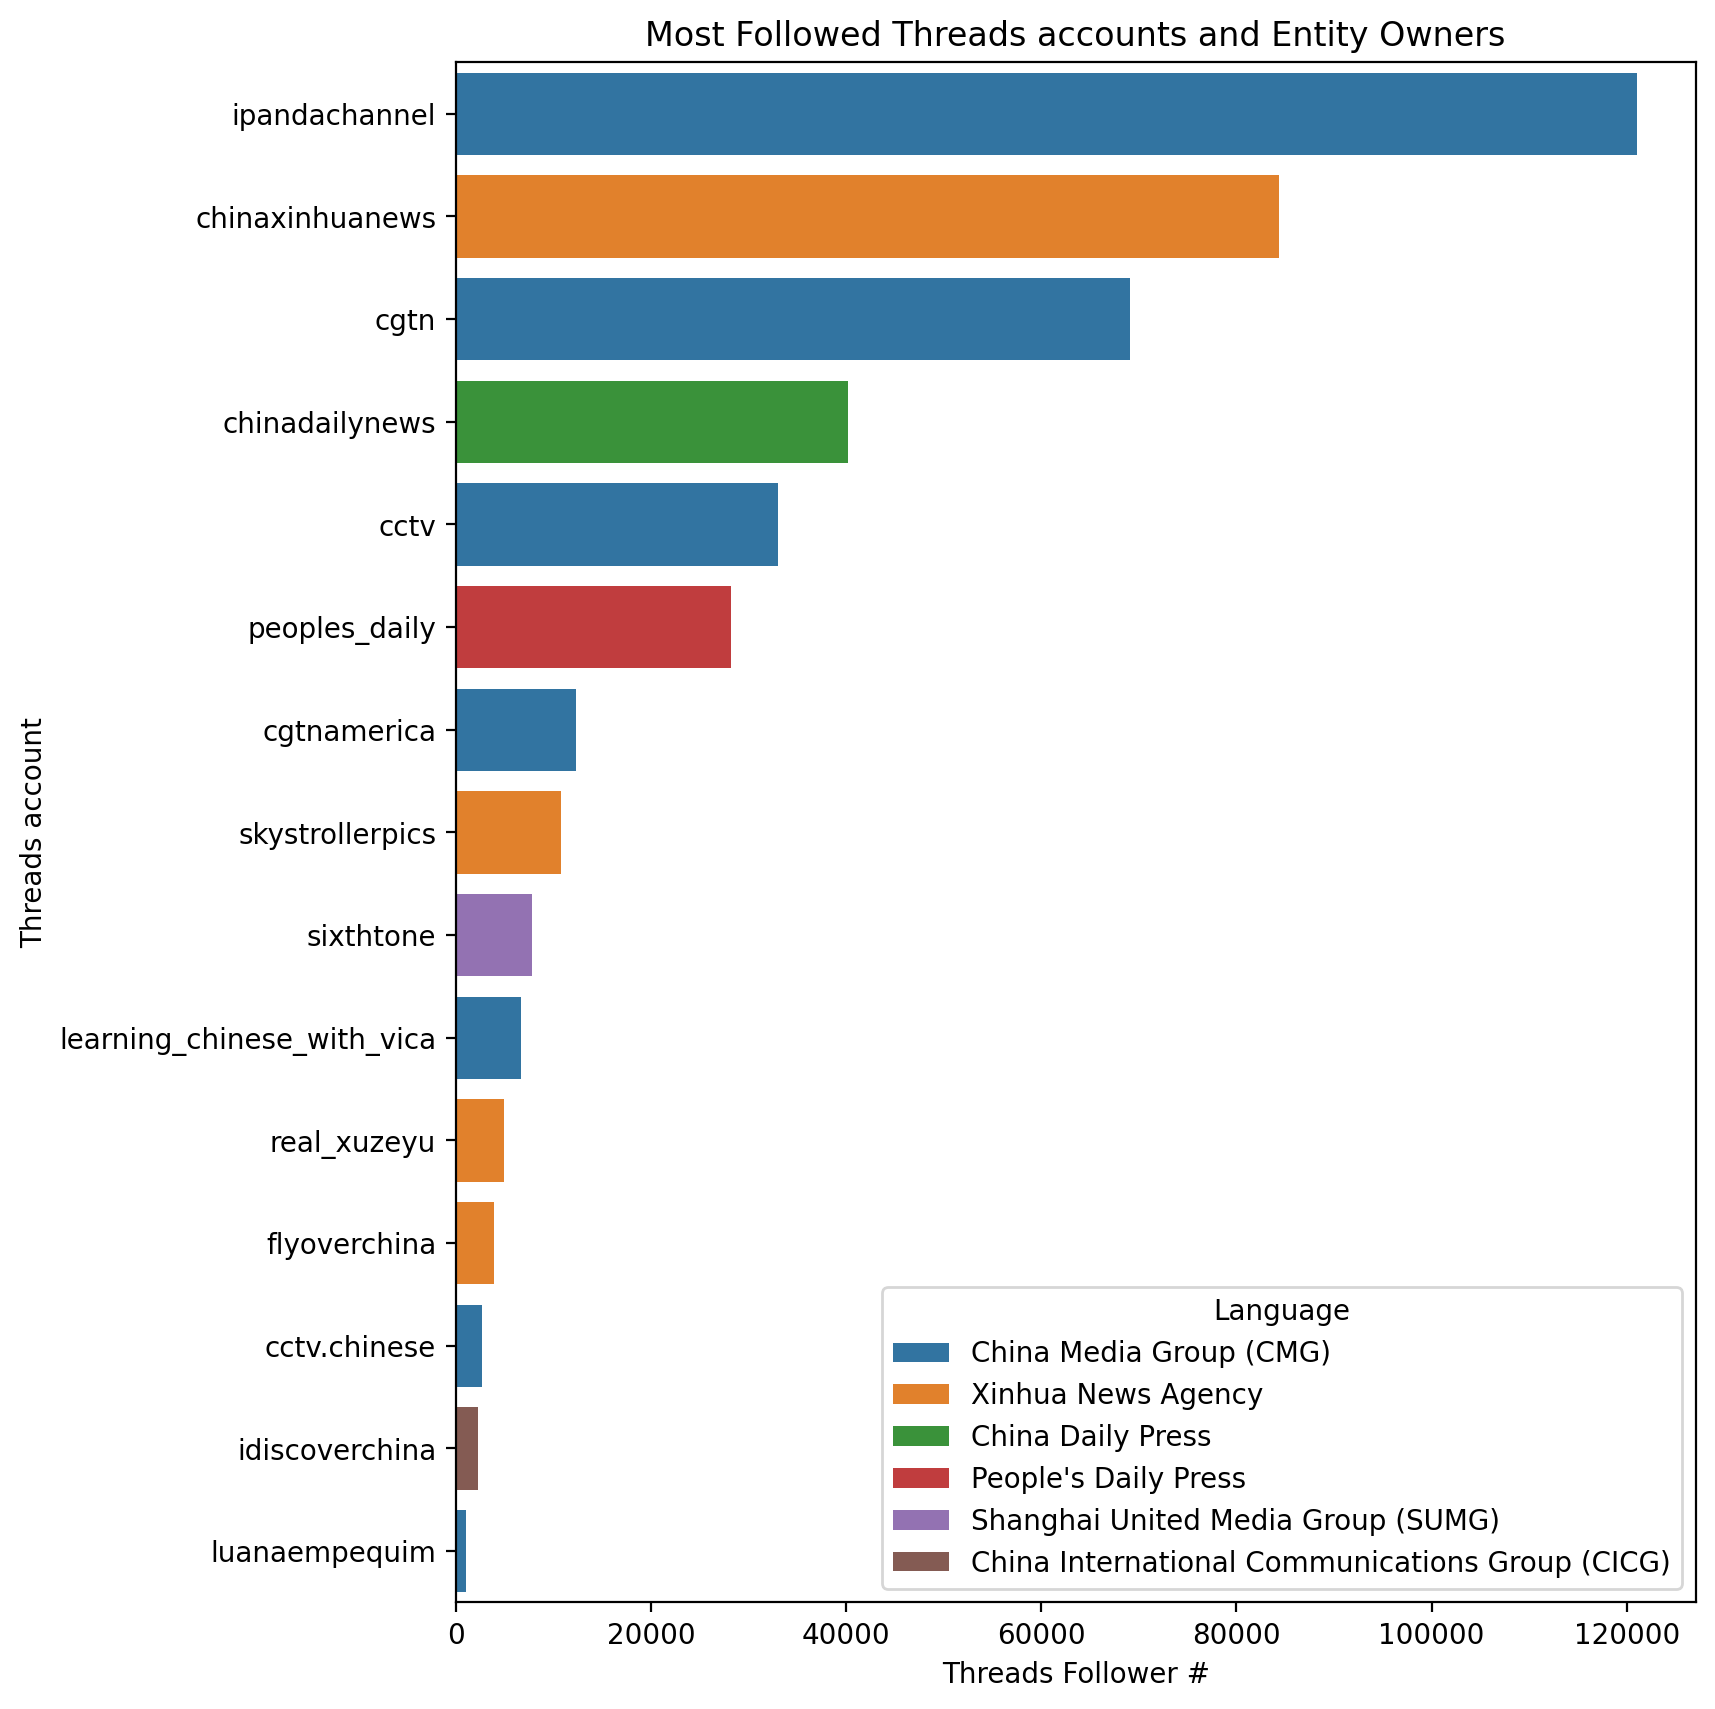

In [48]:
data_Threads = df.sort_values(by='Threads Follower #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="Threads account", x="Threads Follower #" , data=data_Threads,dodge=False, hue="Entity owner (English)", palette="tab10")
graph.set(xlabel="Threads Follower #", title="Most Followed Threads accounts and Entity Owners")
plt.legend(title='Language')
plt.show()

### YouTube

<Axes: xlabel='YouTube-name Similarity Ratio', ylabel='Count'>

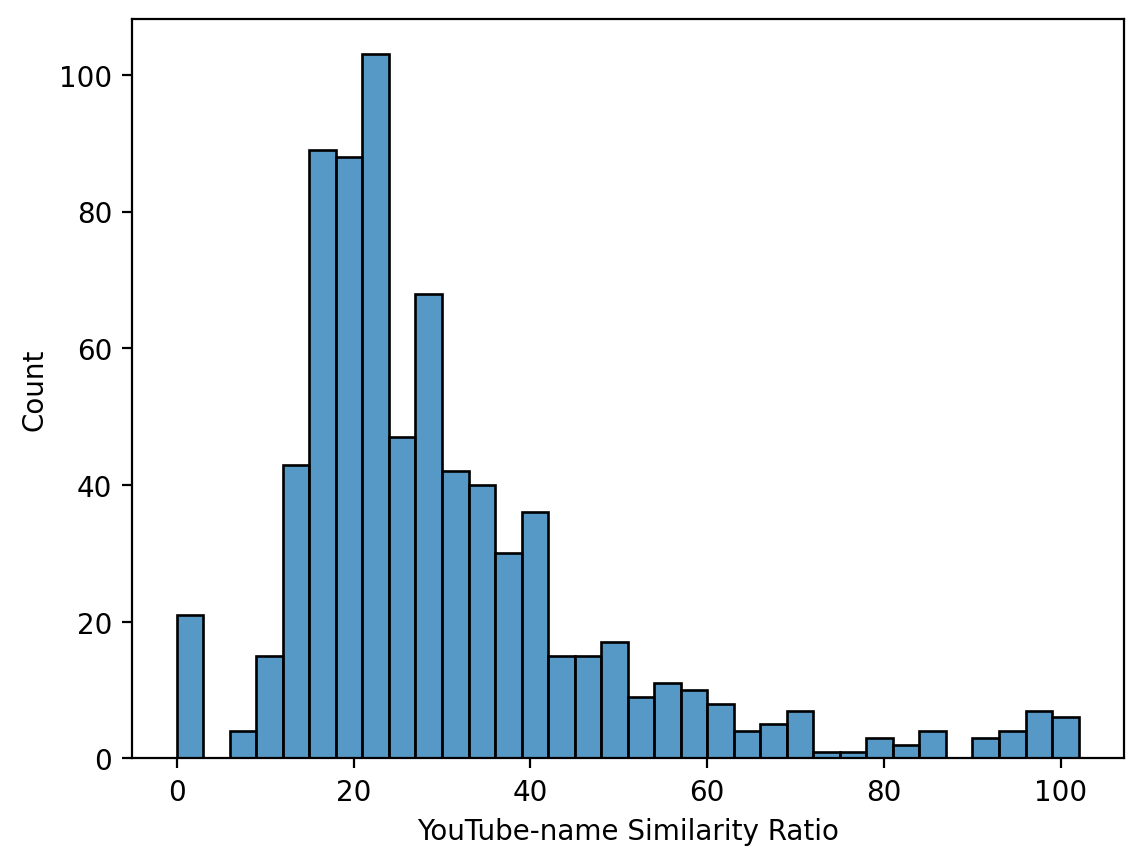

In [49]:
df['YouTube account'].isna().sum()

df['YouTube-name Similarity Ratio'] =0
for index, row in df.iterrows():
    similarity_ratio = fuzz.token_set_ratio(row['YouTube account'], row['Name (English)'])   
    df.at[index, 'YouTube-name Similarity Ratio'] = similarity_ratio
    
sns.histplot(data=df, x="YouTube-name Similarity Ratio", binwidth=3)


In [50]:
df['YouTube-name Similarity Ratio'].describe()

count    758.000000
mean      29.762533
std       18.624612
min        0.000000
25%       18.000000
50%       25.000000
75%       36.000000
max      100.000000
Name: YouTube-name Similarity Ratio, dtype: float64

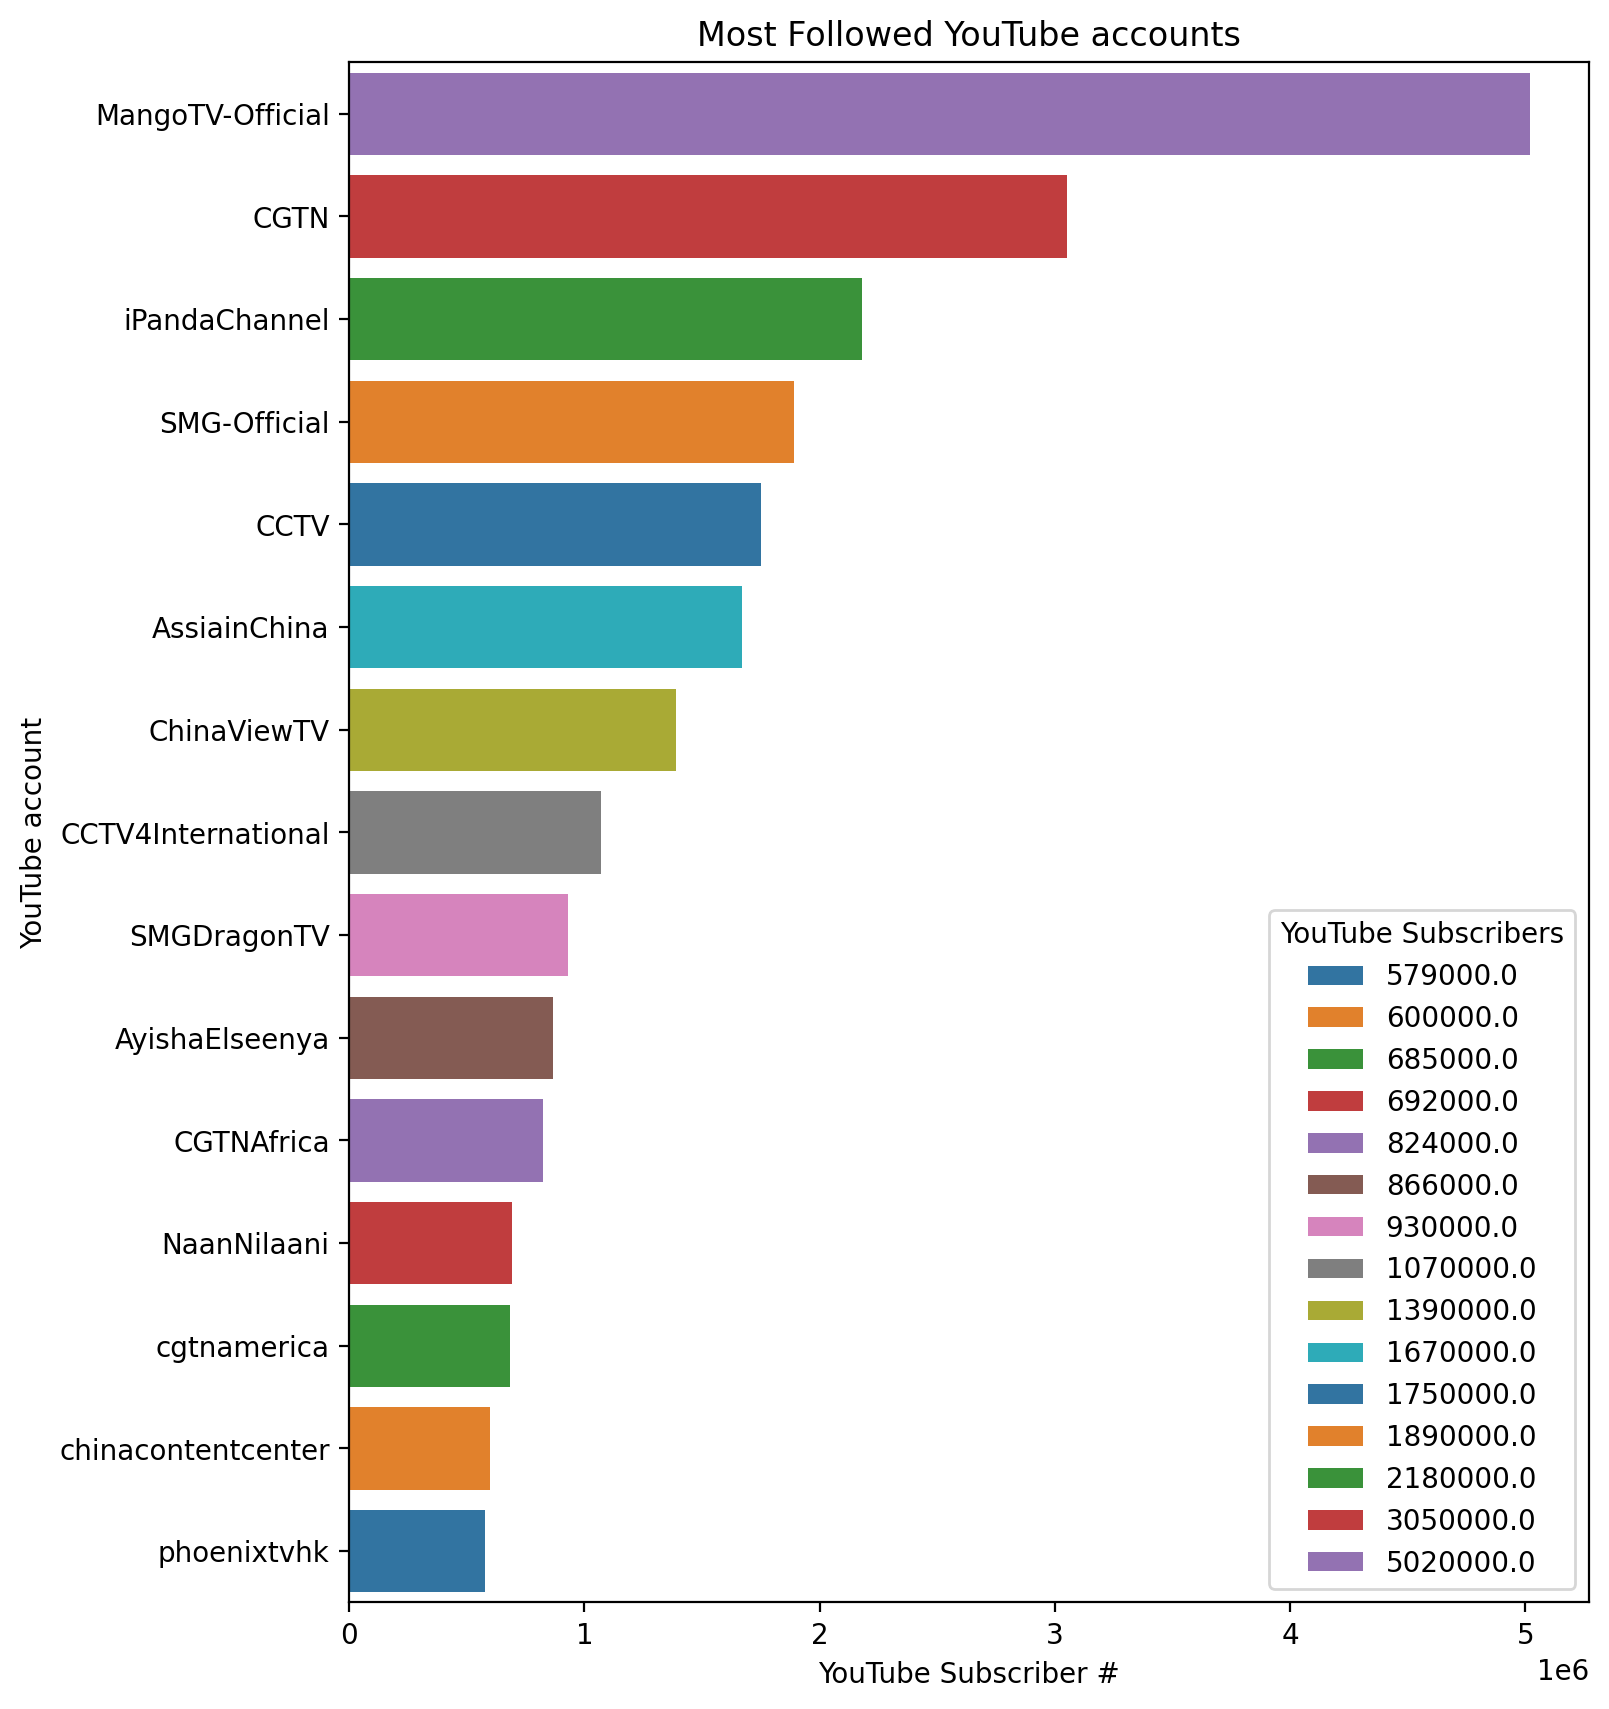

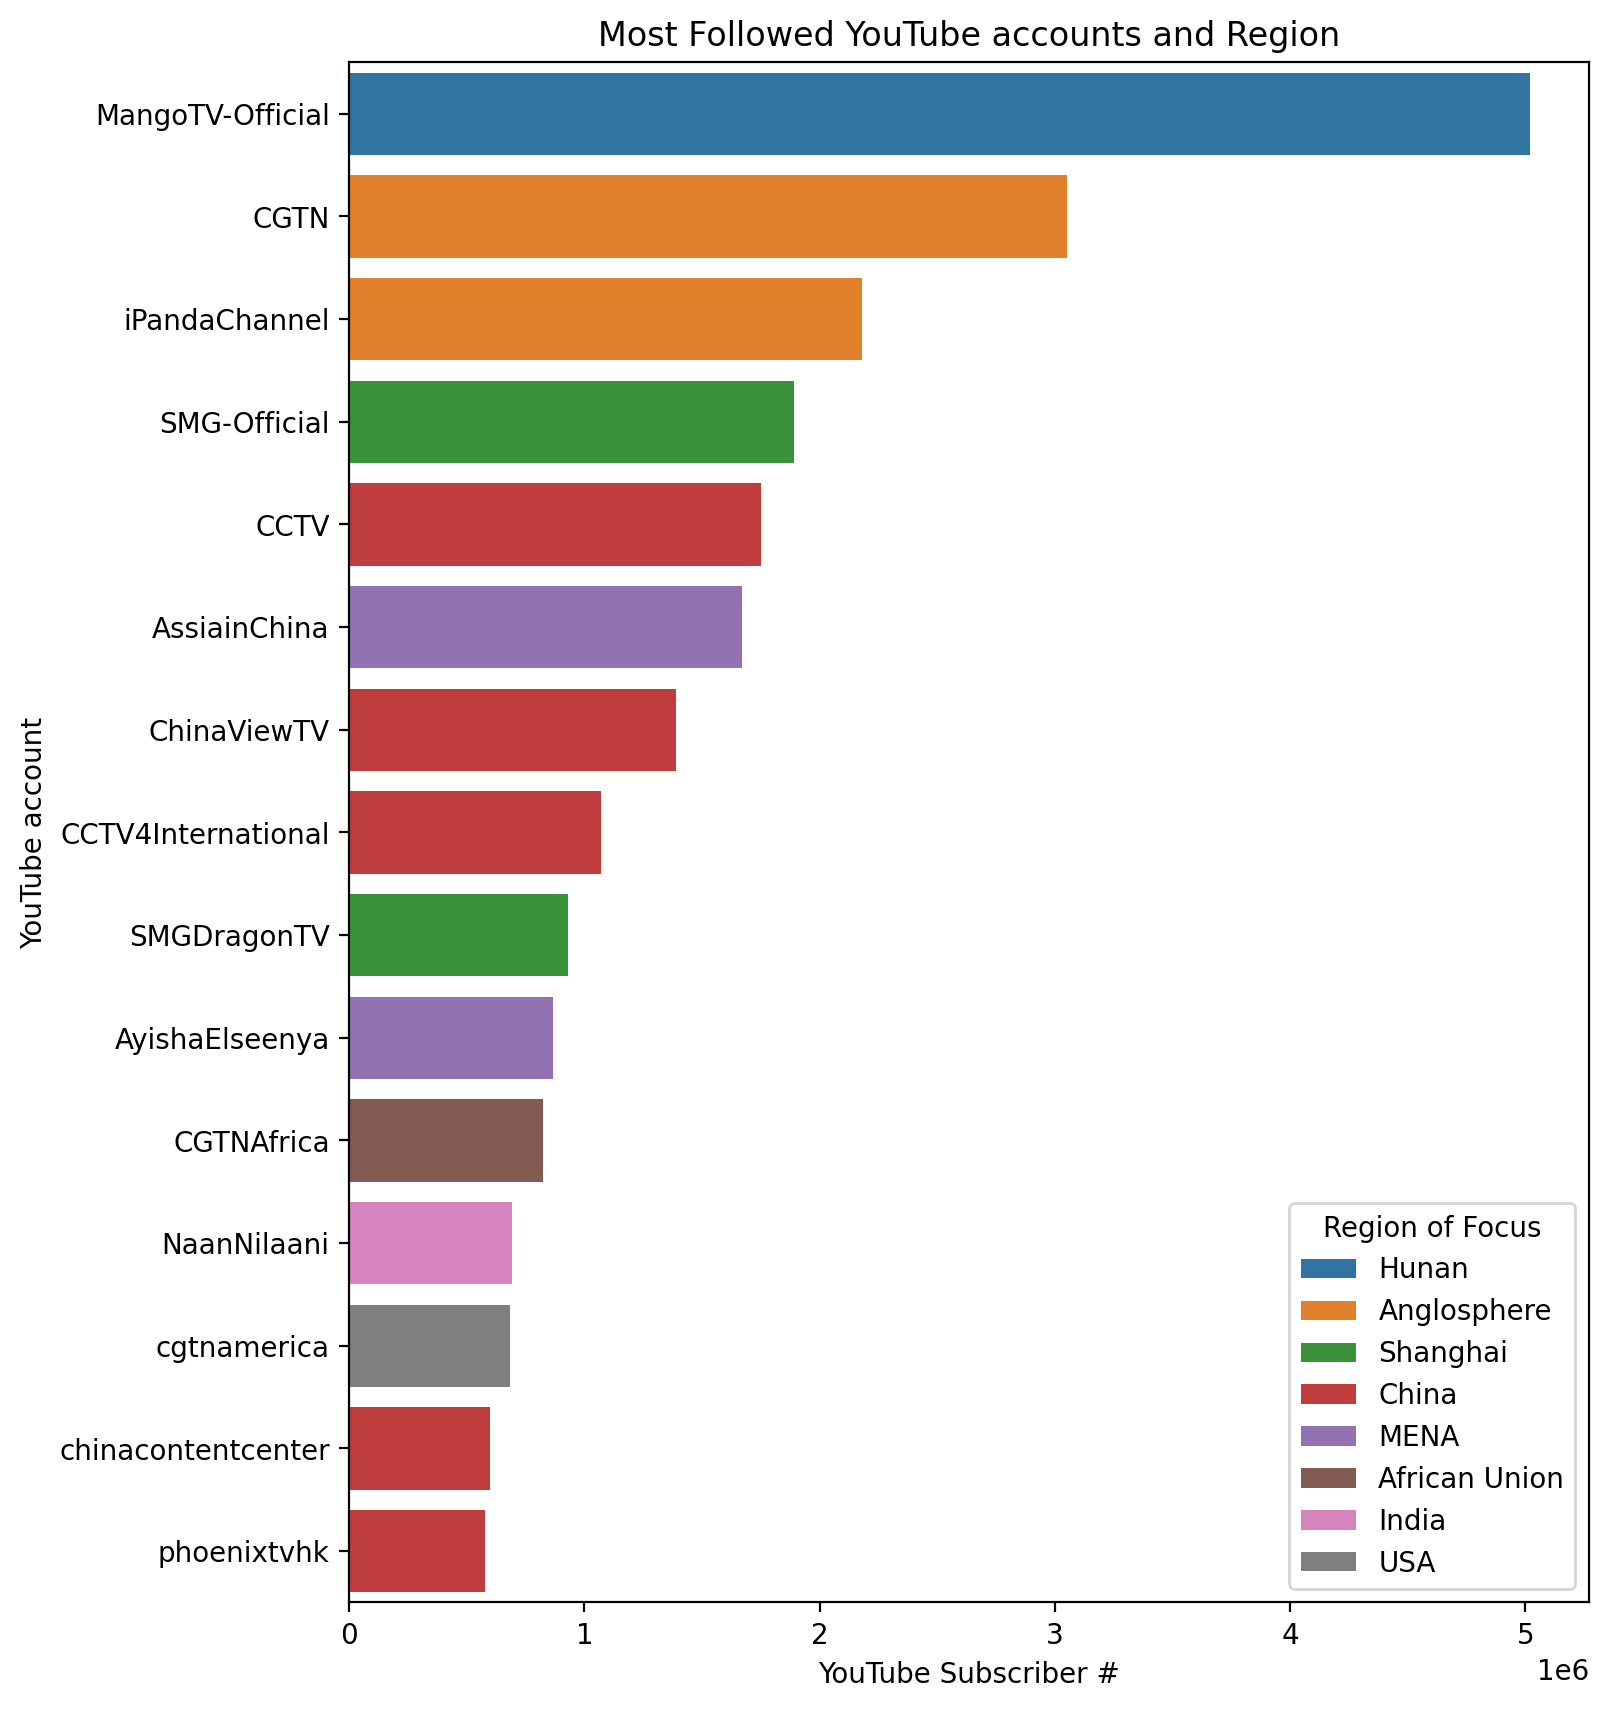

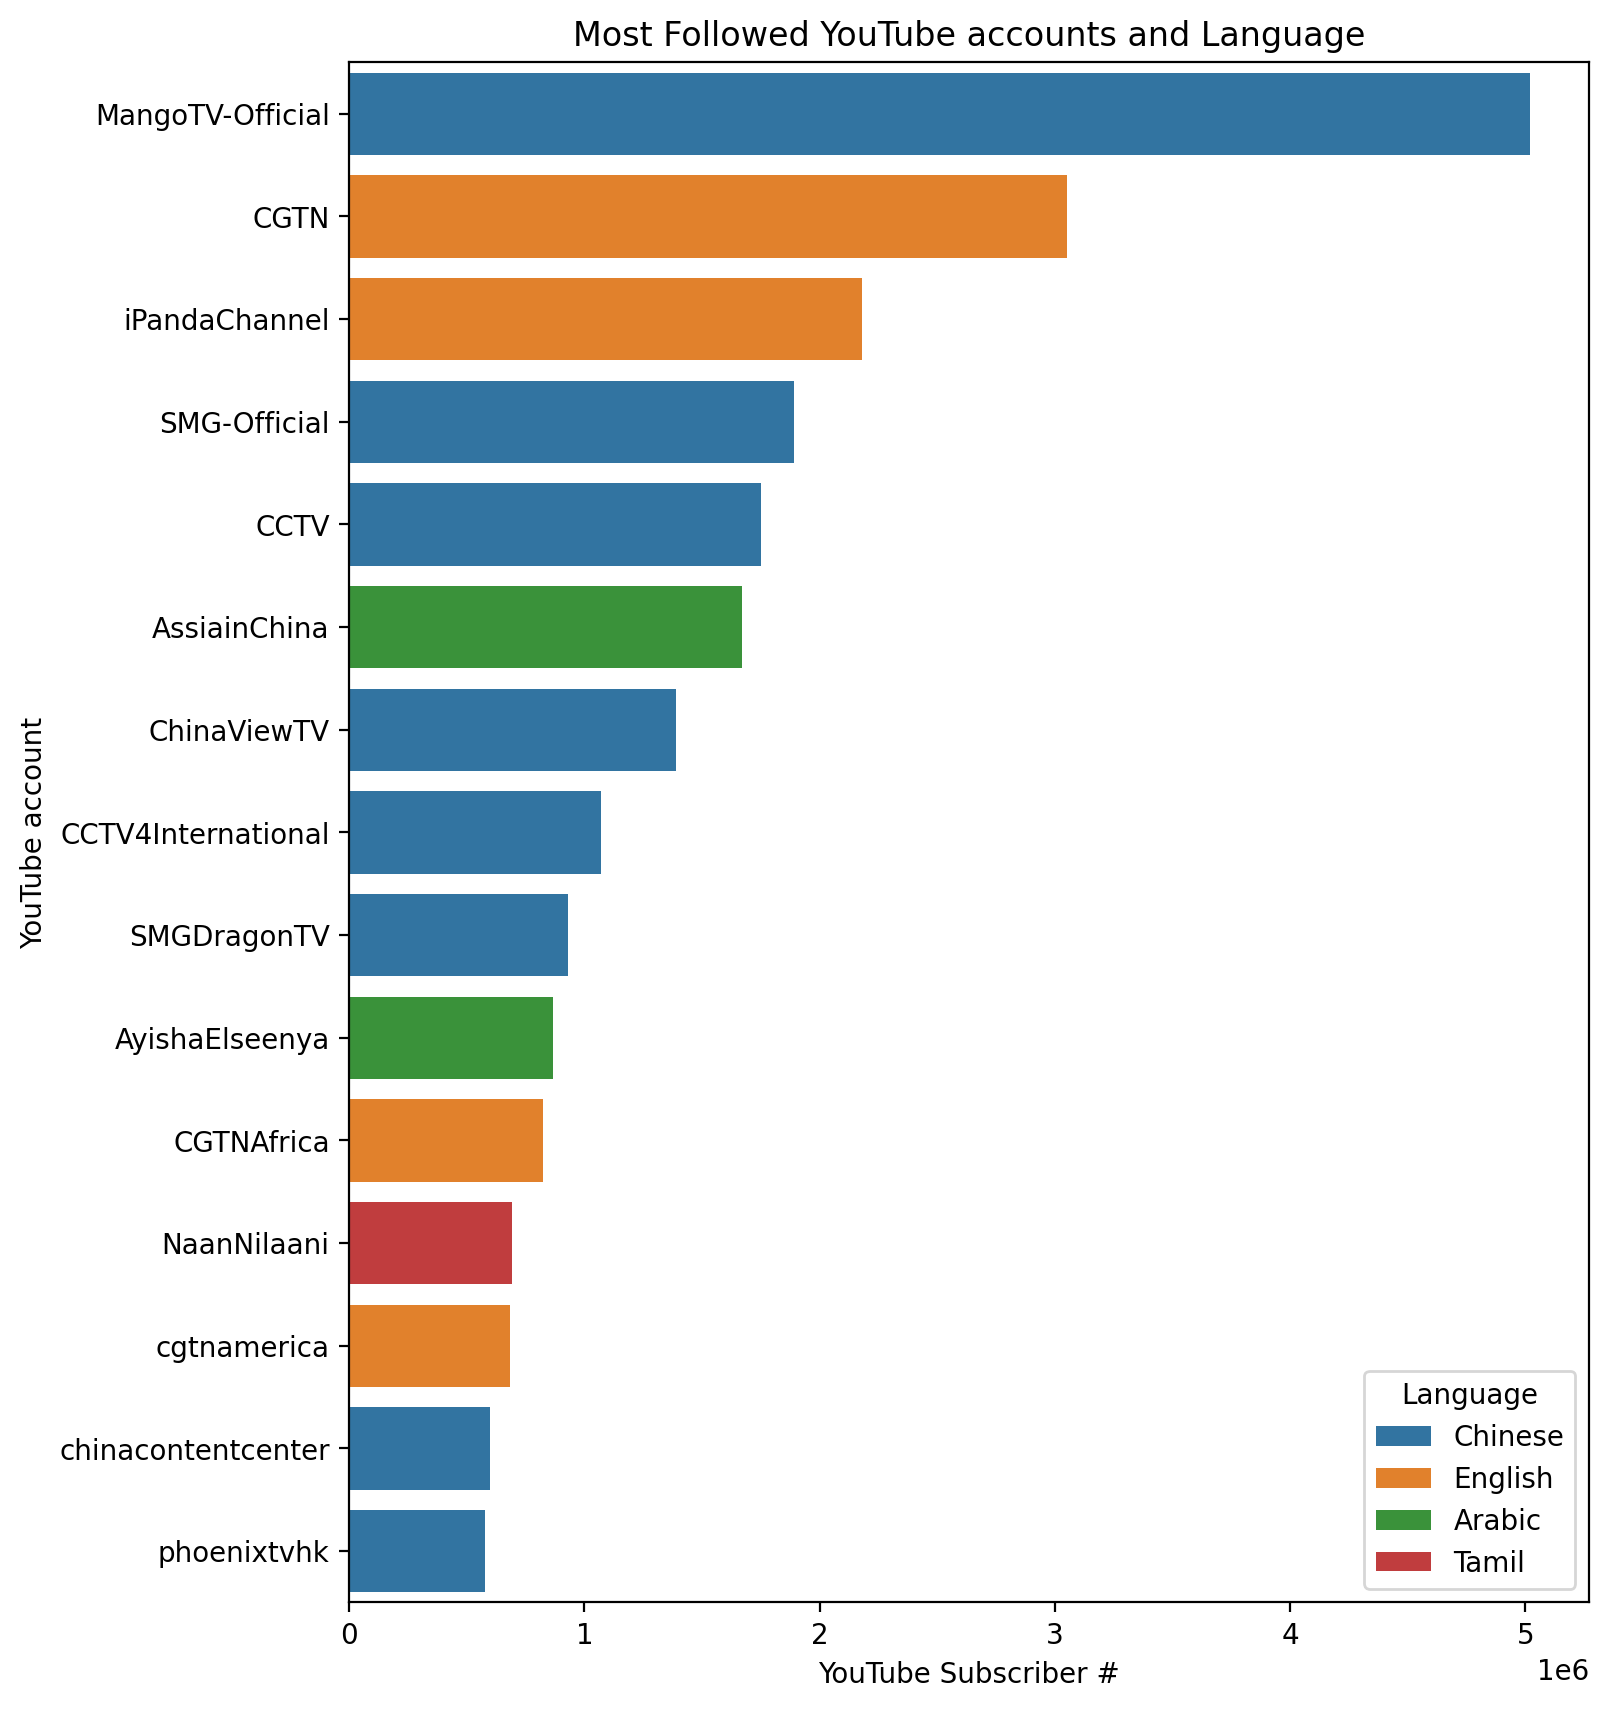

In [51]:
data_YouTube = df.sort_values(by='YouTube Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="YouTube account", x="YouTube Subscriber #" , data=data_YouTube,dodge=False, hue="YouTube Subscriber #", palette="tab10")
graph.set(xlabel="YouTube Subscriber #", title="Most Followed YouTube accounts")
plt.legend(title='YouTube Subscribers')
plt.show()

data_YouTube = df.sort_values(by='YouTube Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="YouTube account", x="YouTube Subscriber #" , data=data_YouTube,dodge=False, hue="Region of Focus", palette="tab10")
graph.set(xlabel="YouTube Subscriber #", title="Most Followed YouTube accounts and Region")
plt.legend(title='Region of Focus')
plt.show()

data_YouTube = df.sort_values(by='YouTube Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="YouTube account", x="YouTube Subscriber #" , data=data_YouTube,dodge=False, hue="Language", palette="tab10")
graph.set(xlabel="YouTube Subscriber #", title="Most Followed YouTube accounts and Language")
plt.legend(title='Language')
plt.show()

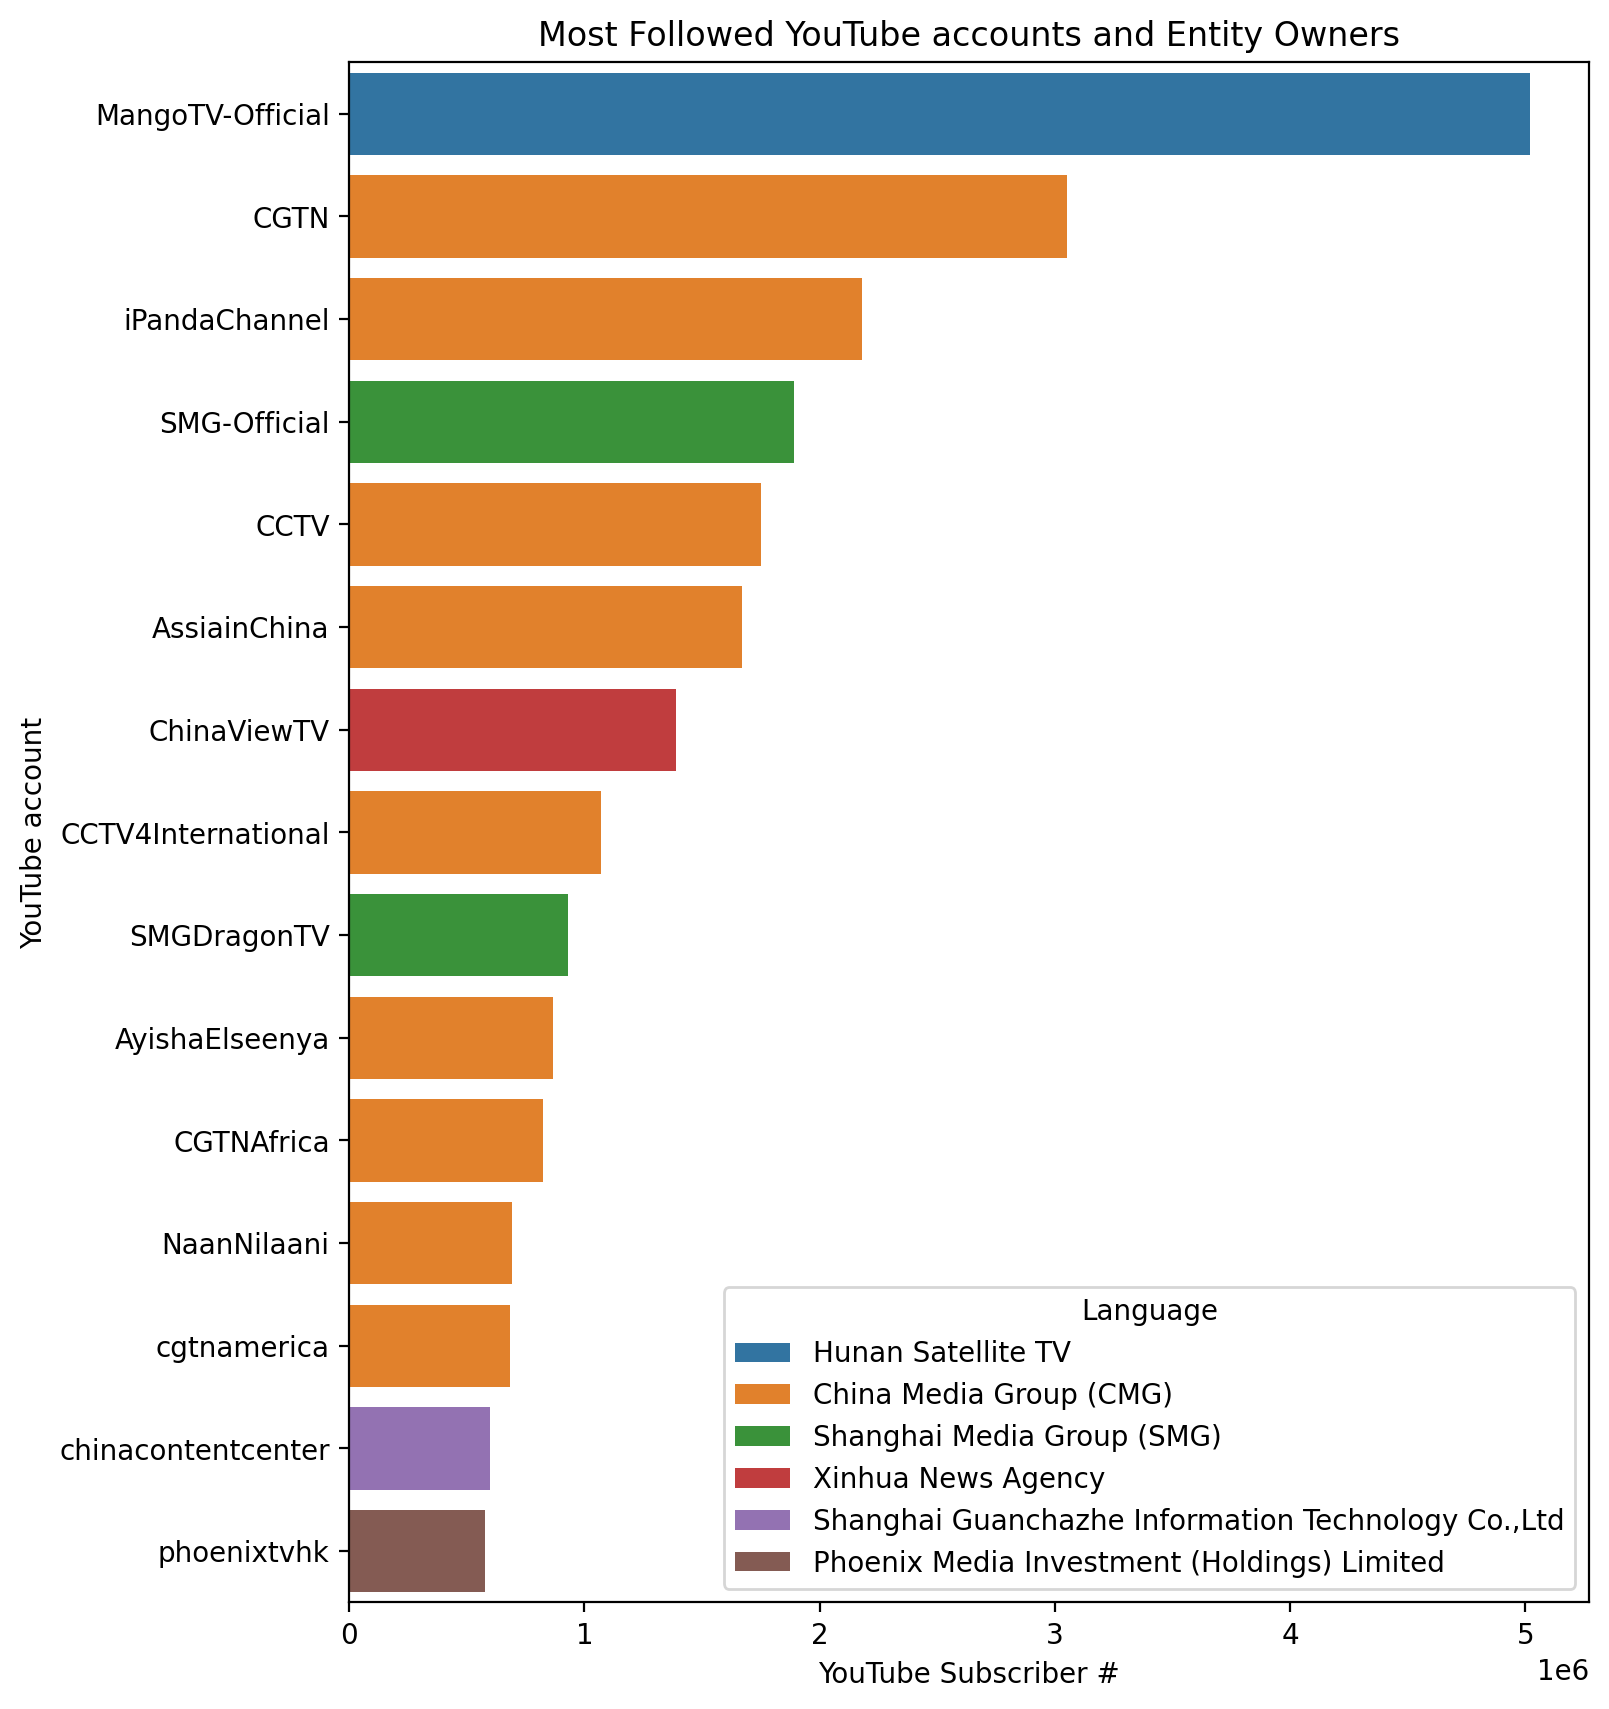

In [52]:
data_YouTube = df.sort_values(by='YouTube Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="YouTube account", x="YouTube Subscriber #" , data=data_YouTube,dodge=False, hue="Entity owner (English)", palette="tab10")
graph.set(xlabel="YouTube Subscriber #", title="Most Followed YouTube accounts and Entity Owners")
plt.legend(title='Language')
plt.show()

### TikTok

In [53]:
df['TikTok account'].isna().sum()

637

<Axes: xlabel='TikTok-name Similarity Ratio', ylabel='Count'>

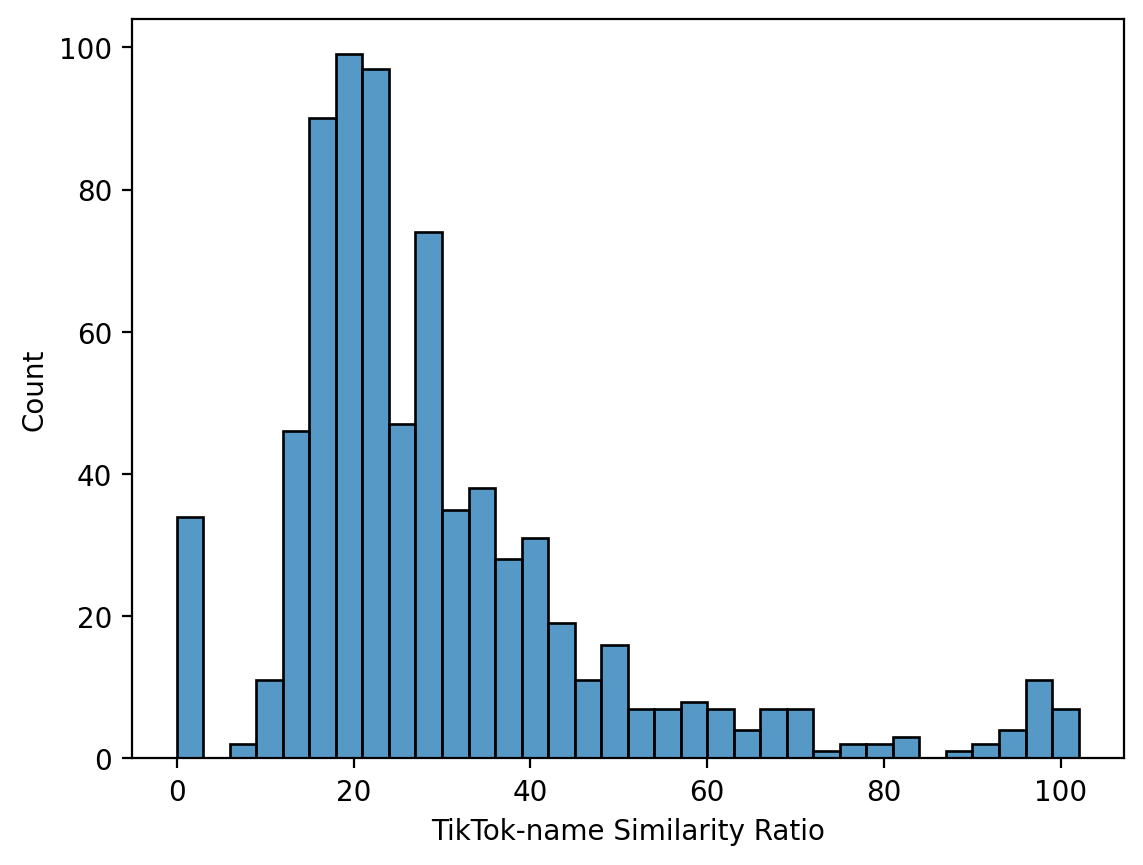

In [54]:

df['TikTok-name Similarity Ratio'] =0
for index, row in df.iterrows():
    similarity_ratio = fuzz.token_set_ratio(row['TikTok account'], row['Name (English)'])   
    df.at[index, 'TikTok-name Similarity Ratio'] = similarity_ratio
    
sns.histplot(data=df, x="TikTok-name Similarity Ratio", binwidth=3)


In [55]:
df['TikTok-name Similarity Ratio'].describe()

count    758.000000
mean      29.091029
std       19.231356
min        0.000000
25%       18.000000
50%       23.500000
75%       35.000000
max      100.000000
Name: TikTok-name Similarity Ratio, dtype: float64

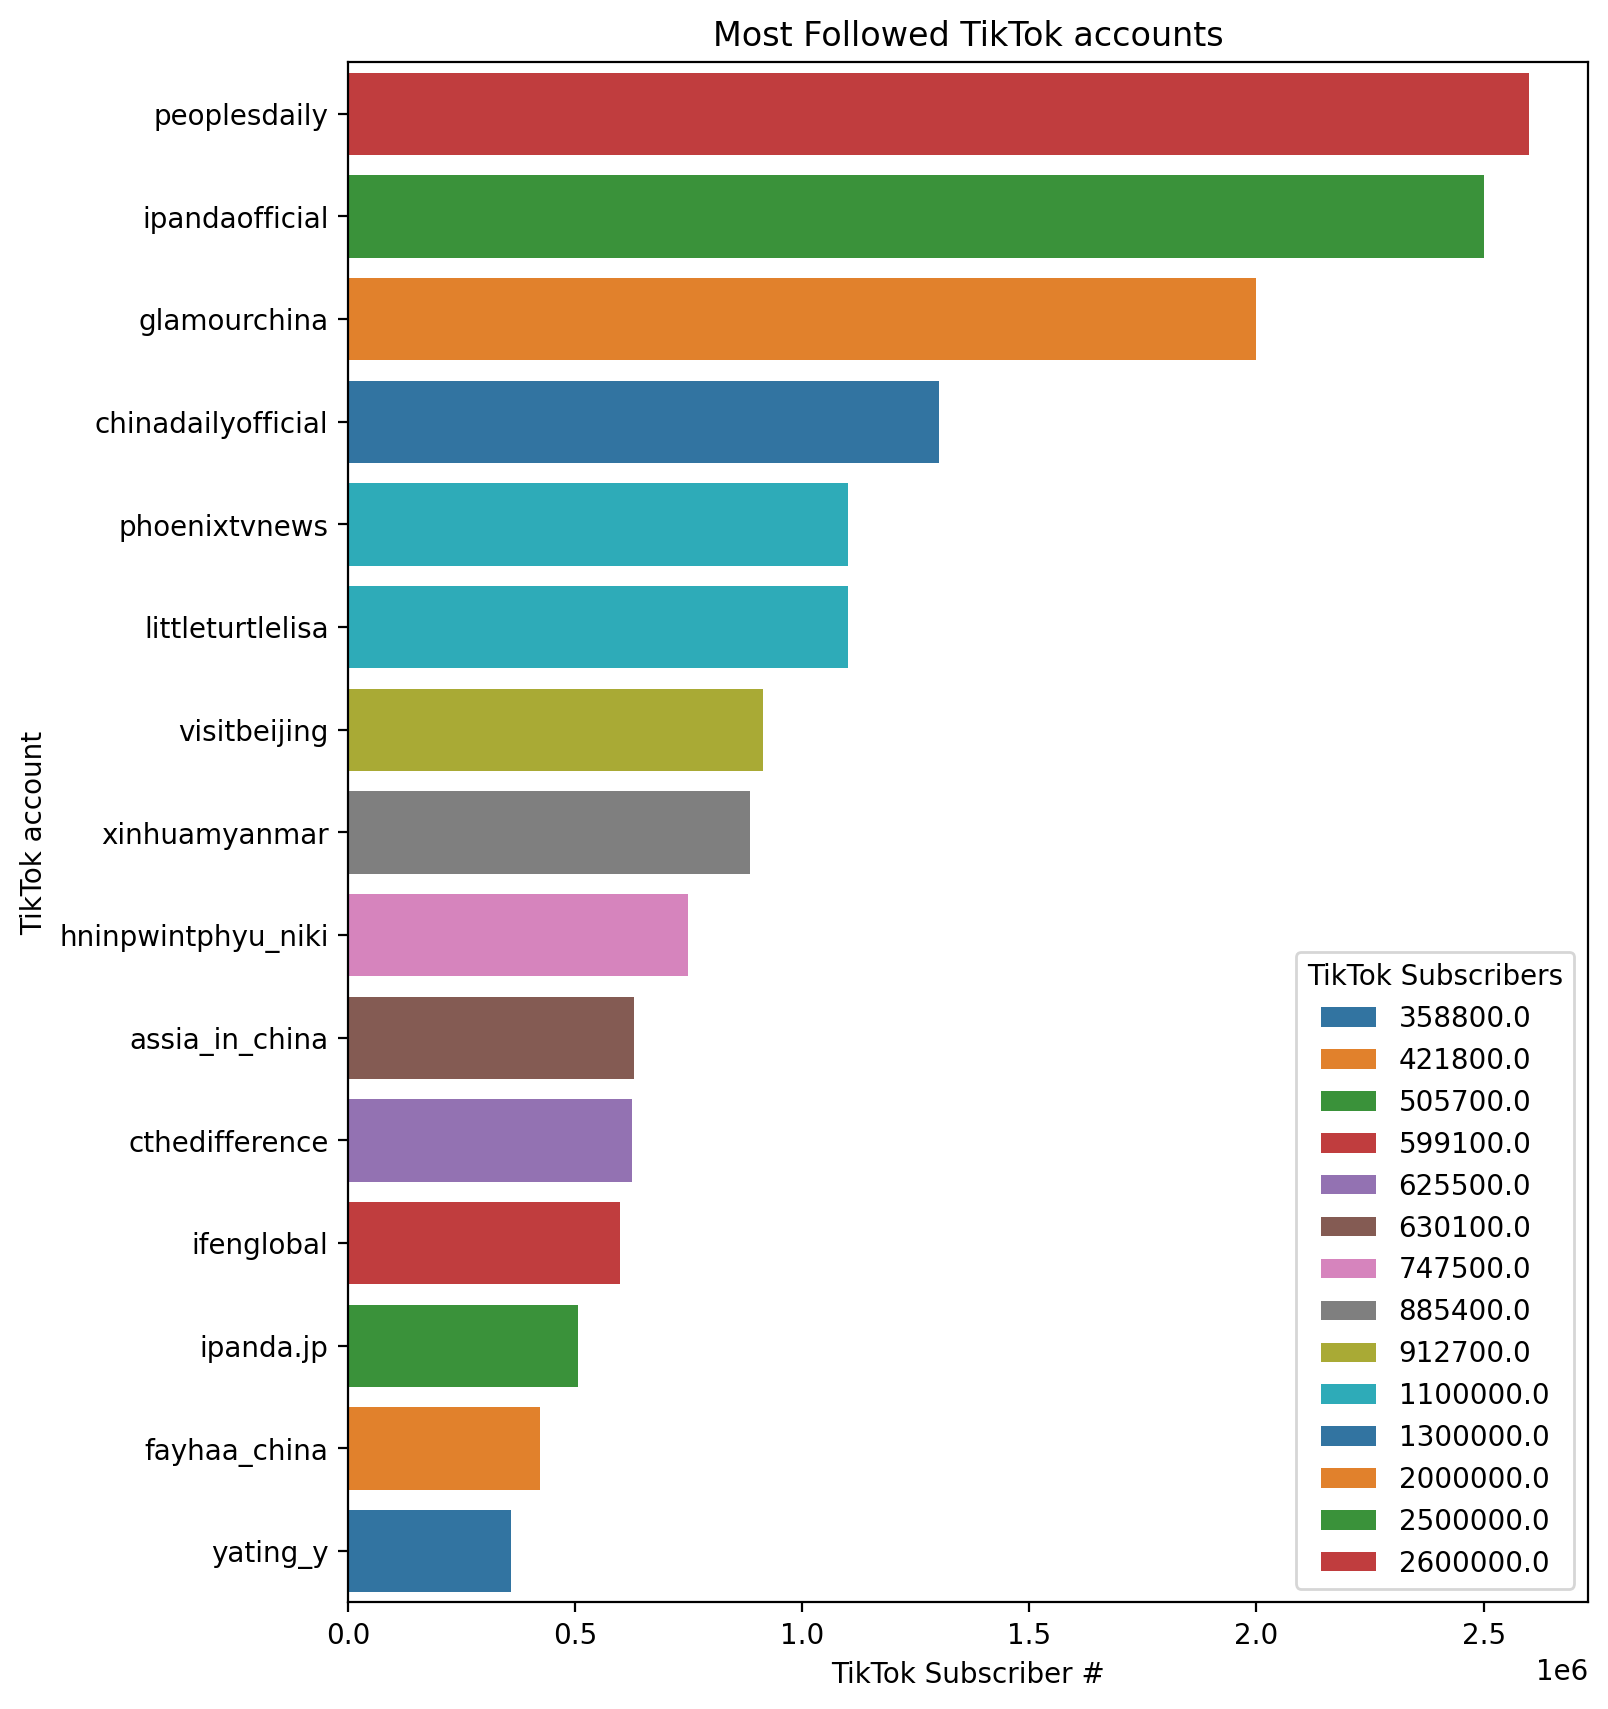

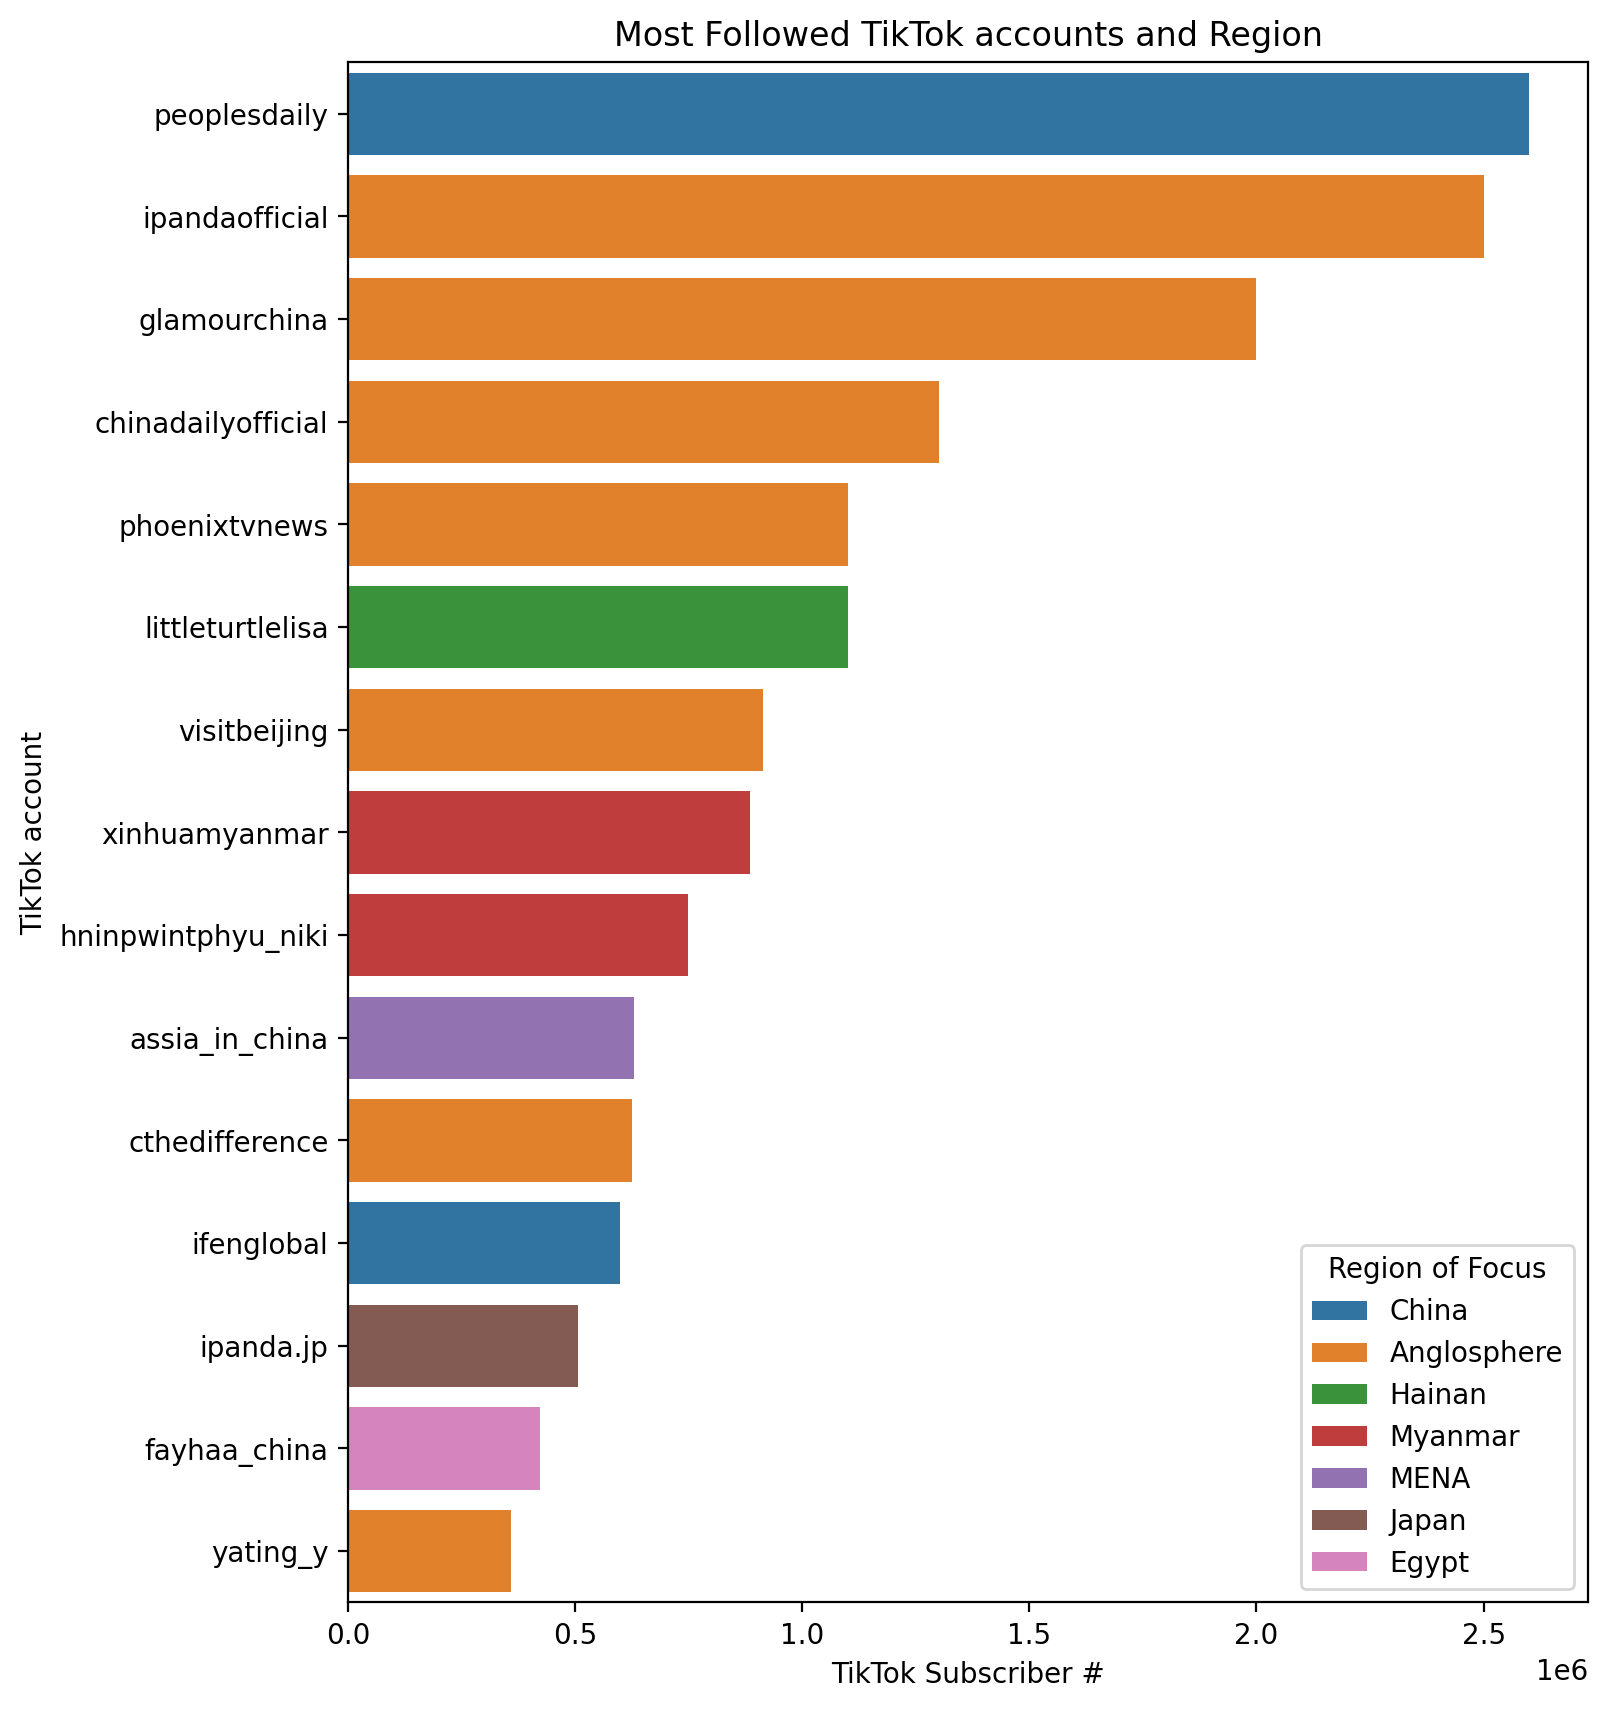

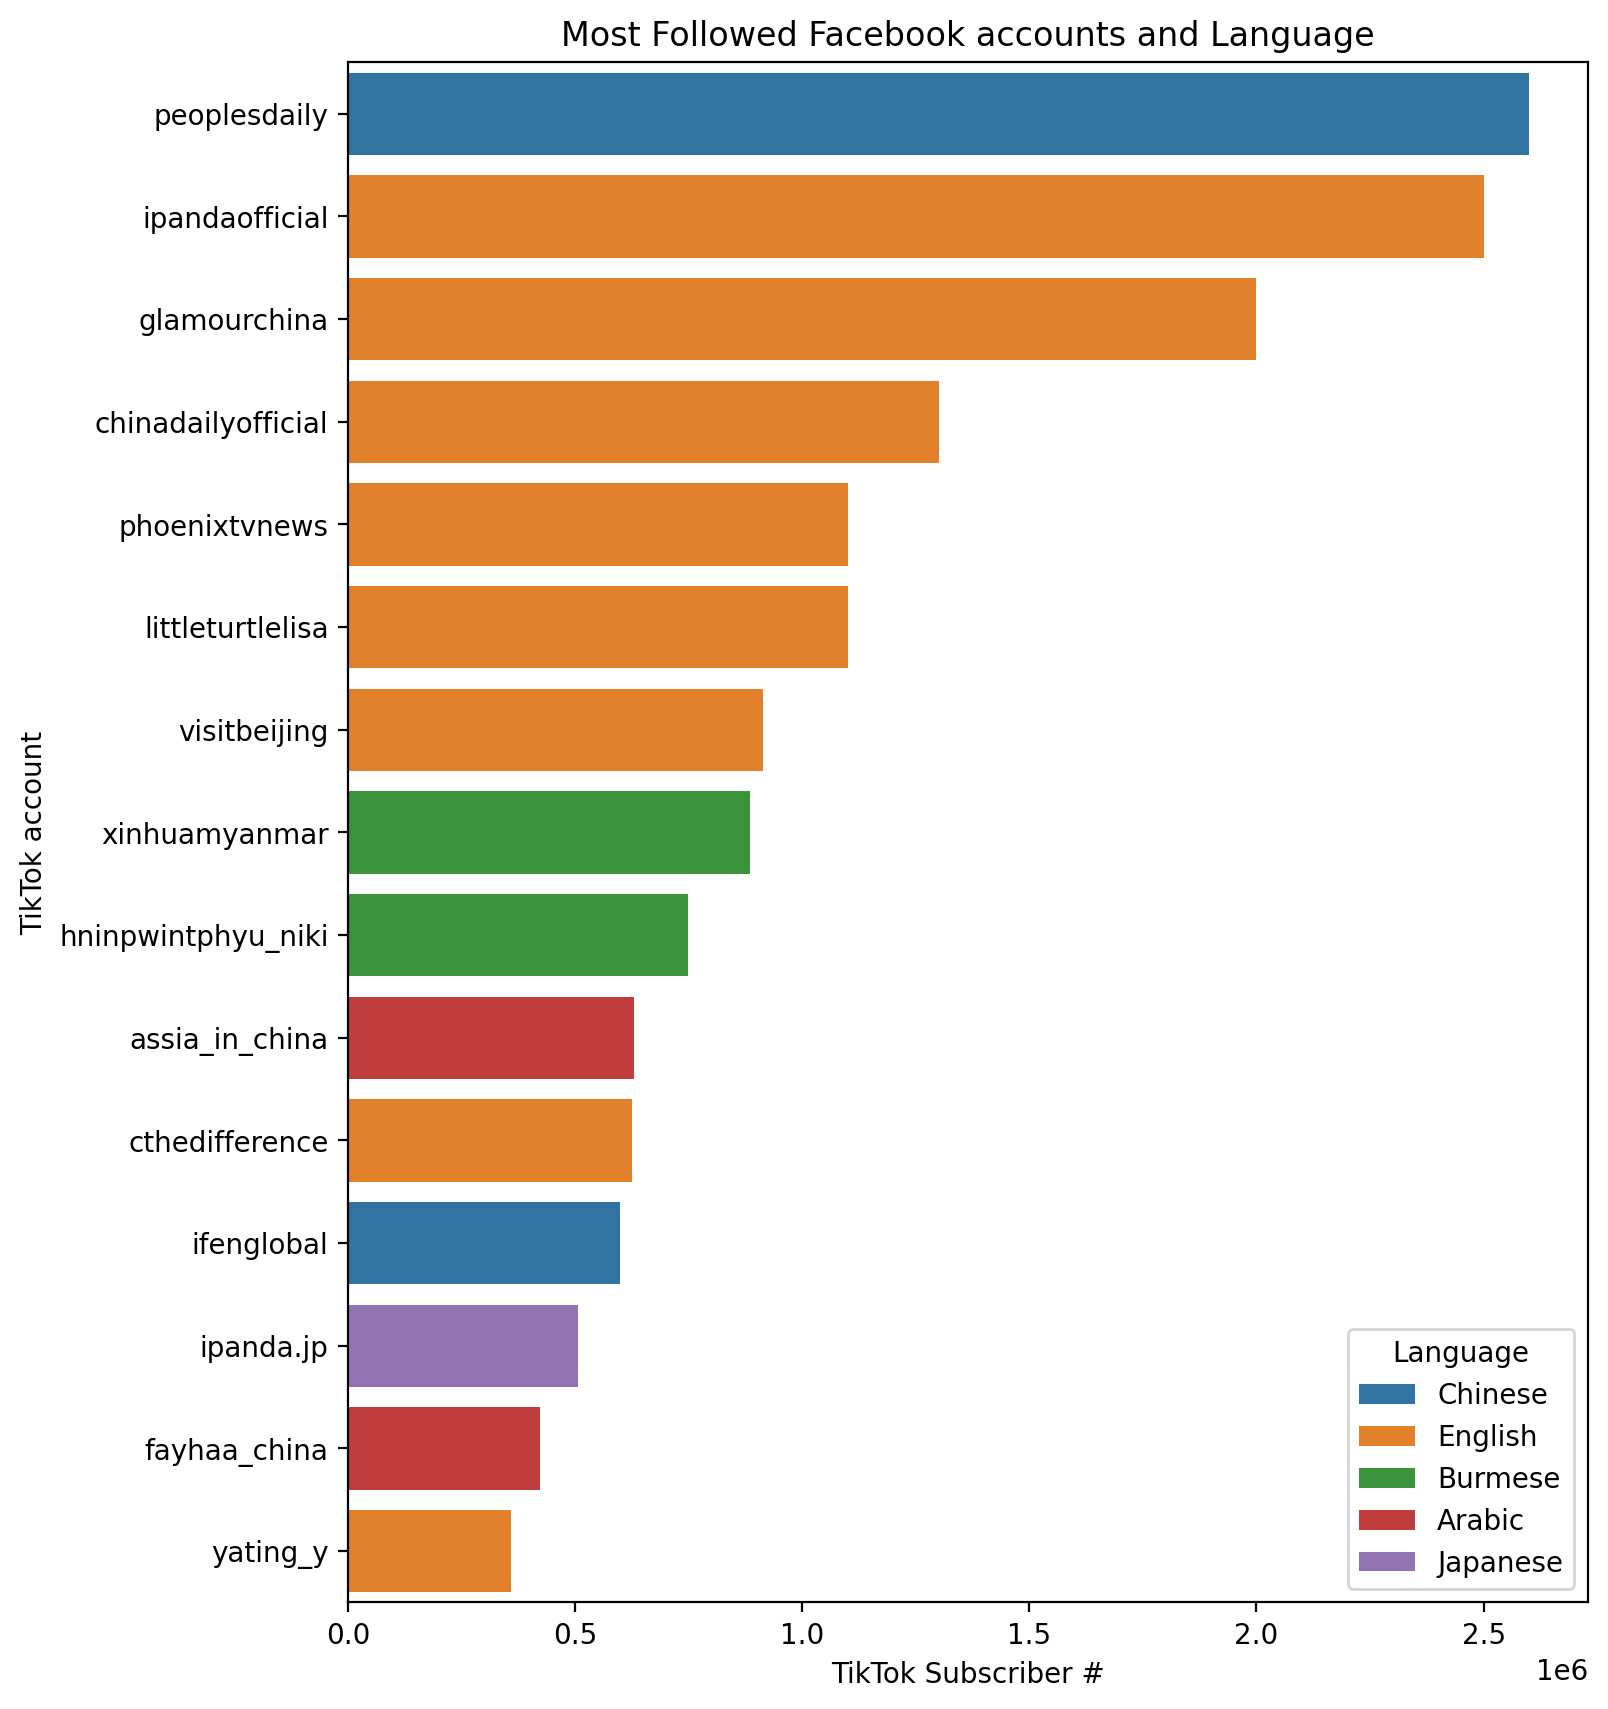

In [56]:
data_TikTok = df.sort_values(by='TikTok Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="TikTok account", x="TikTok Subscriber #" , data=data_TikTok,dodge=False, hue="TikTok Subscriber #", palette="tab10")
graph.set(xlabel="TikTok Subscriber #", title="Most Followed TikTok accounts")
plt.legend(title='TikTok Subscribers')
plt.show()

data_TikTok = df.sort_values(by='TikTok Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="TikTok account", x="TikTok Subscriber #" , data=data_TikTok,dodge=False, hue="Region of Focus", palette="tab10")
graph.set(xlabel="TikTok Subscriber #", title="Most Followed TikTok accounts and Region")
plt.legend(title='Region of Focus')
plt.show()

data_TikTok = df.sort_values(by='TikTok Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="TikTok account", x="TikTok Subscriber #" , data=data_TikTok,dodge=False, hue="Language", palette="tab10")
graph.set(xlabel="TikTok Subscriber #", title="Most Followed Facebook accounts and Language")
plt.legend(title='Language')
plt.show()

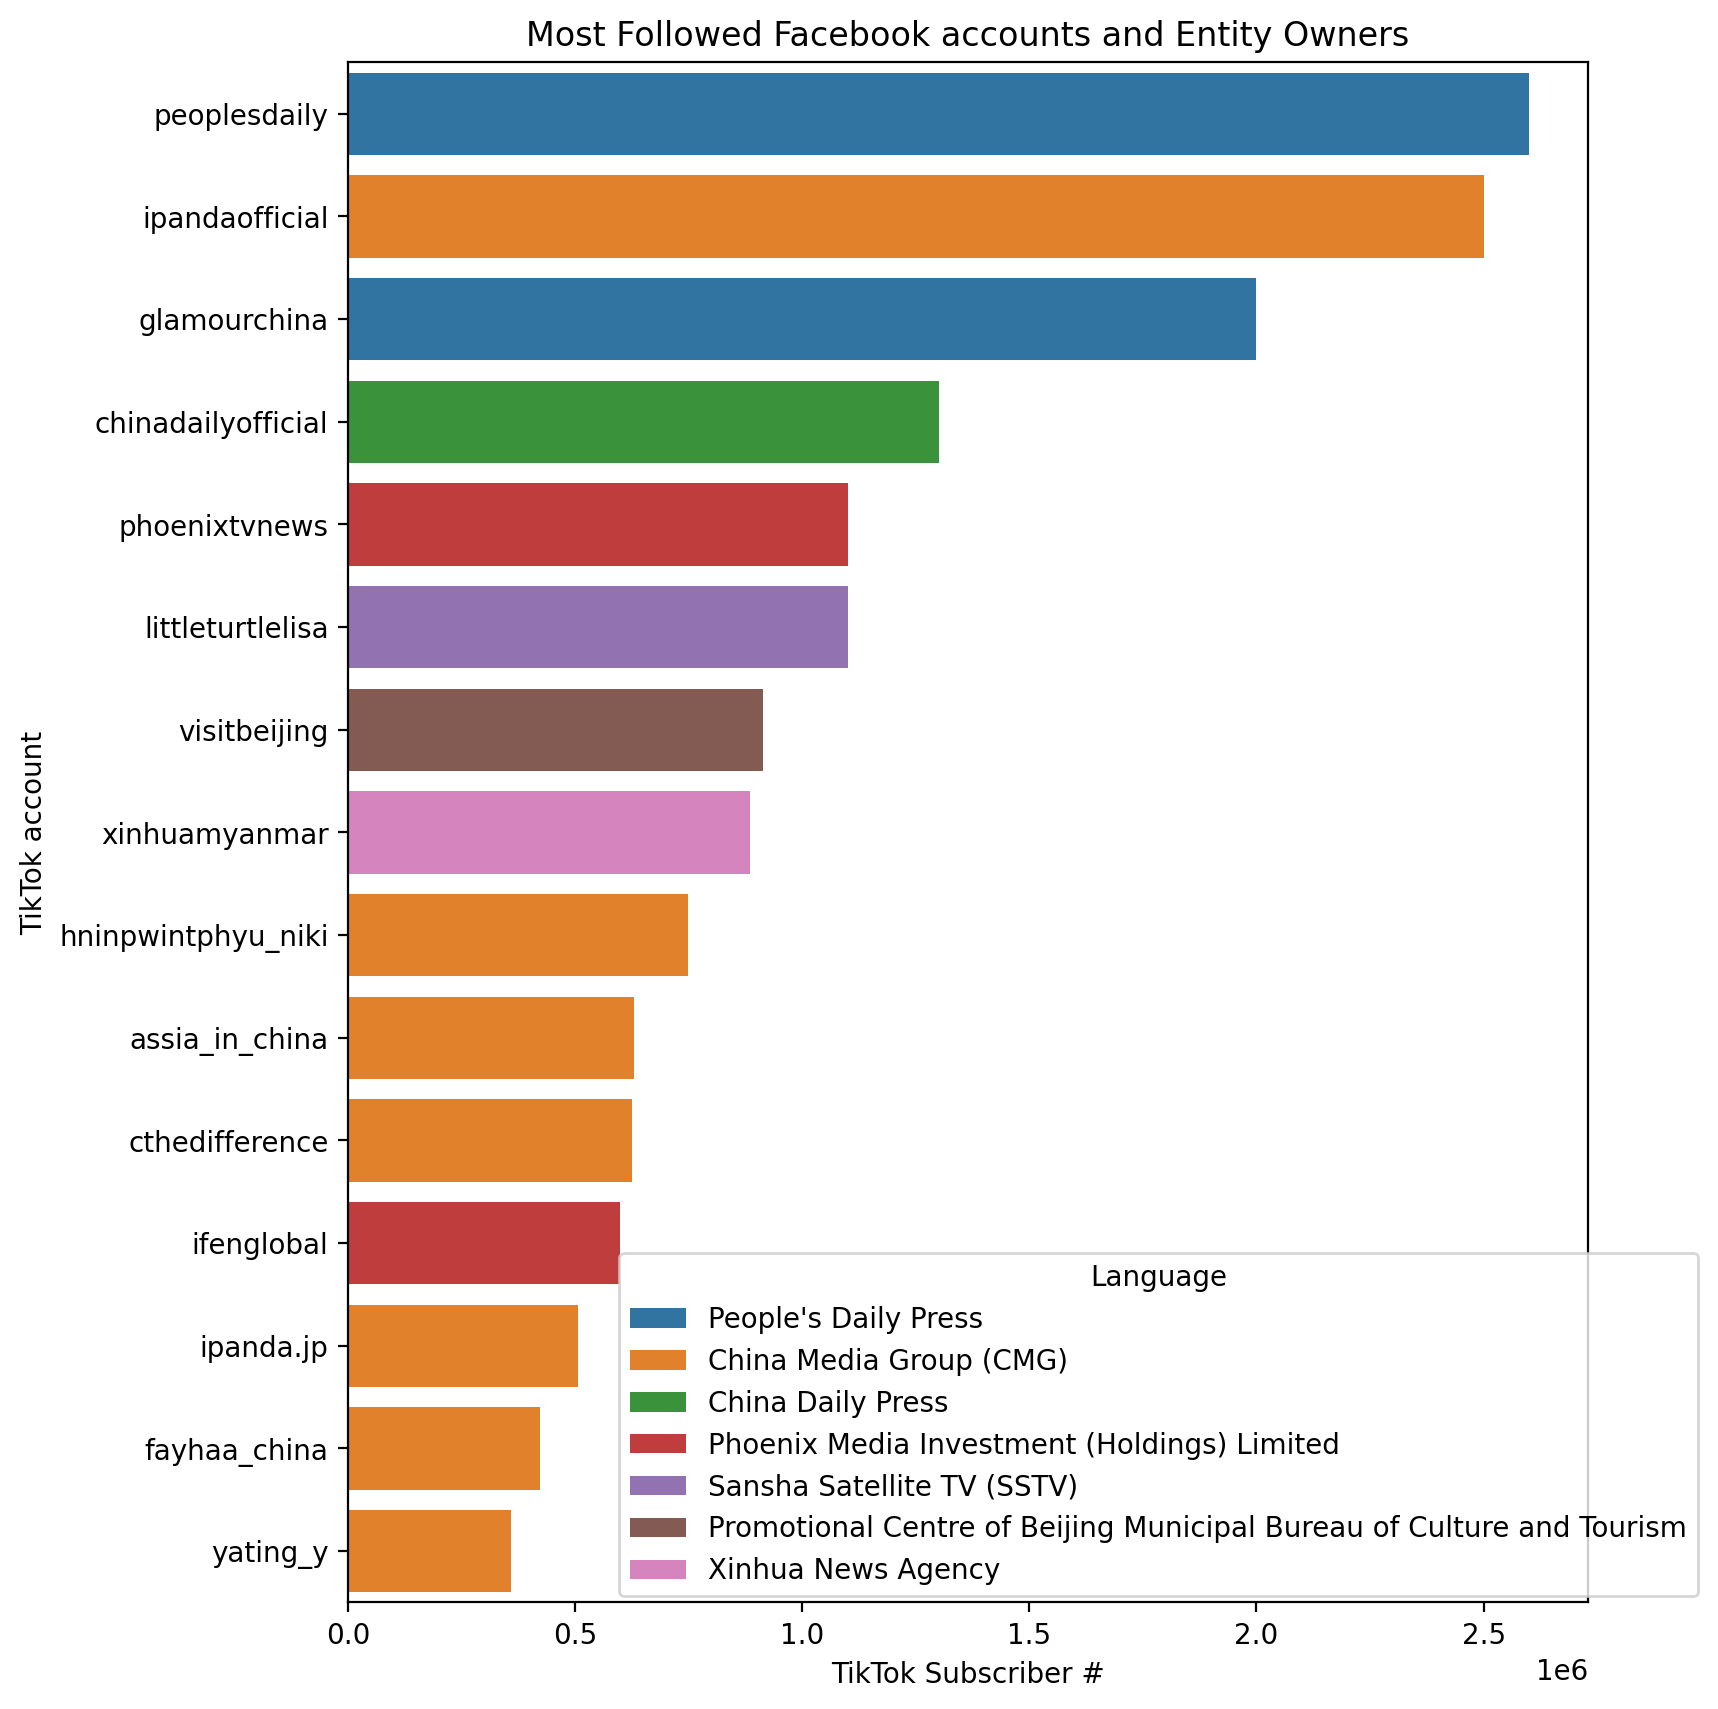

In [57]:
data_TikTok = df.sort_values(by='TikTok Subscriber #',ascending=False).head(15)
plt.figure(figsize=(8, 10))
graph = sns.barplot(y="TikTok account", x="TikTok Subscriber #" , data=data_TikTok,dodge=False, hue="Entity owner (English)", palette="tab10")
graph.set(xlabel="TikTok Subscriber #", title="Most Followed Facebook accounts and Entity Owners")
plt.legend(title='Language',loc=4,bbox_to_anchor=(1.1, -0.005))
plt.show()

### Threads vs Instagram

In [58]:
count = (pd.notna(df['Instragram page']) & pd.isna(df['Threads account'])).sum()
print(count)

113


There are 113 people/ entities with an Instagram account but not a Threads account

### Social Media Engagement

In [59]:
twitter_mean = data_twitter["X (Twitter) Follower #"].mean()
facebook_mean= data_facebook["Facebook Follower #"].mean()
insta_mean= data_Instagram["Instagram Follower #"].mean()
threads_mean= data_Threads["Threads Follower #"].mean()
youtube_mean= data_YouTube["YouTube Subscriber #"].mean()
tiktok_mean= data_TikTok["TikTok Subscriber #"].mean()

top15 = pd.DataFrame(np.array([['Twitter', int(twitter_mean)], ['Facebook', int(facebook_mean)],['Instagram', int(insta_mean)],['Threads', int(threads_mean)],['YouTube', int(youtube_mean)], ['TikTok',int(tiktok_mean)]]),
                   columns=['Social Media', 'Mean Followers'])
top15 = top15.astype({'Mean Followers':'int'})
top15


Social Media  Mean Followers
0      Twitter         3434580
1     Facebook        48500661
2    Instagram          877933
3      Threads           28559
4      YouTube         1546400
5       TikTok         1085773

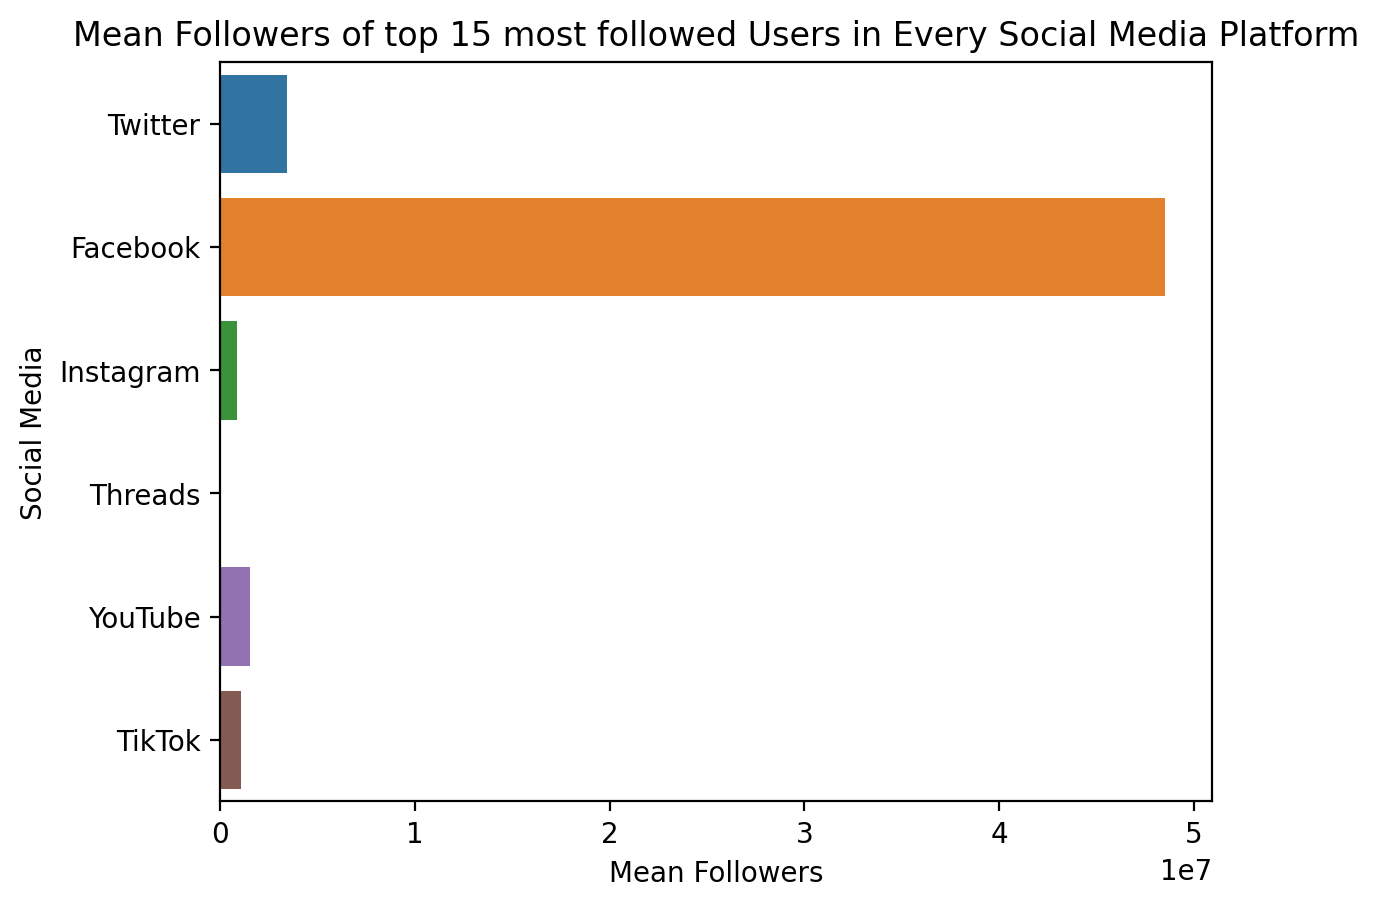

In [60]:
graph = sns.barplot(y="Social Media", x="Mean Followers" , data=top15,dodge=False, palette="tab10")
graph.set(xlabel="Mean Followers", title="Mean Followers of top 15 most followed Users in Every Social Media Platform")
plt.show()

It seems like Facebook is the most preferred platform by the followers followed by Twitter and Youtube. Facebook leads by extremely high margin.

In [61]:
twitter_total = df["X (Twitter) Follower #"].sum()
facebook_total= df["Facebook Follower #"].sum()
insta_total= df["Instagram Follower #"].sum()
threads_total= df["Threads Follower #"].sum()
youtube_total= df["YouTube Subscriber #"].sum()
tiktok_total= df["TikTok Subscriber #"].sum()

total_followers = pd.DataFrame(np.array([['Twitter', int(twitter_total)], ['Facebook', int(facebook_total)],['Instagram', int(insta_total)],['Threads', int(threads_total)],['YouTube', int(youtube_total)], ['TikTok',int(tiktok_total)]]),
                   columns=['Social Media', 'Total Followers'])
total_followers = total_followers.astype({'Total Followers':'int'})
total_followers


Social Media  Total Followers
0      Twitter         69740711
1     Facebook       1047829628
2    Instagram         14787228
3      Threads           431374
4      YouTube         30186031
5       TikTok         20230414

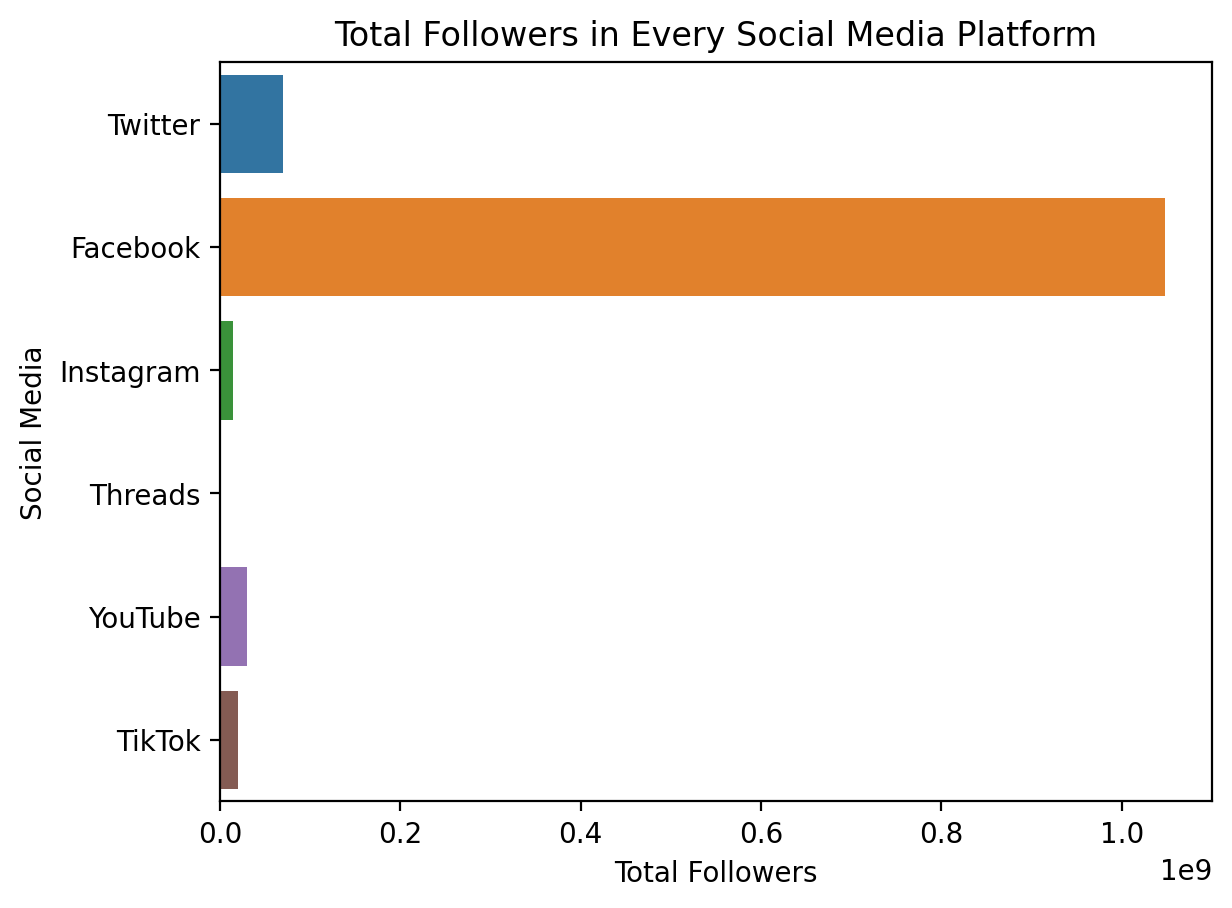

In [62]:
graph = sns.barplot(y="Social Media", x="Total Followers" , data=total_followers,dodge=False, palette="tab10")
graph.set(xlabel="Total Followers", title="Total Followers in Every Social Media Platform")
plt.show()

Facebook has the highest engagement (followers) of all platforms

### Correlation 

Correlation coefficient between similarity ratio and number of Twitter followers: -0.06


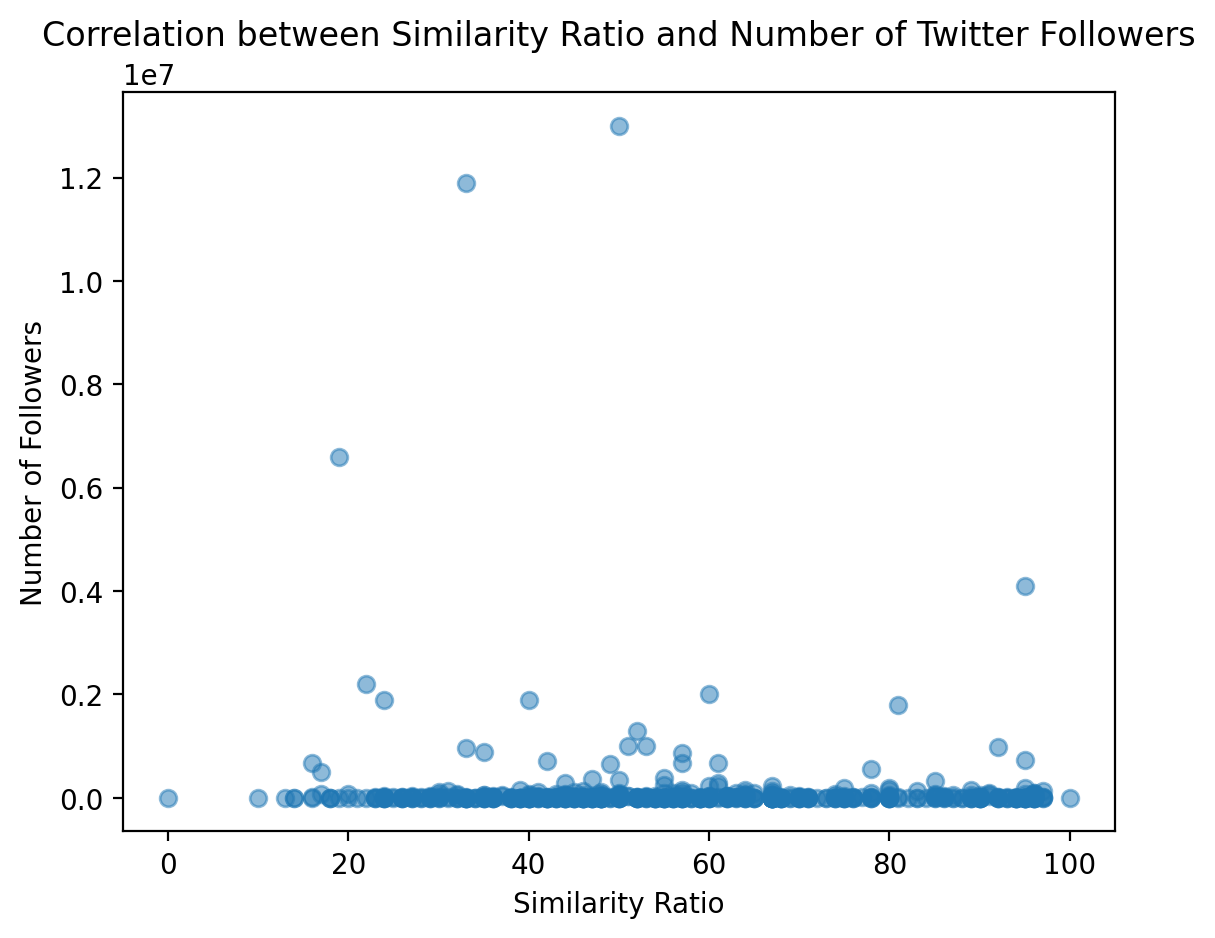

In [63]:
similarity_ratio = df['Twitter-name Similarity Ratio']
followers = df['X (Twitter) Follower #']
correlation_coefficient = similarity_ratio.corr(followers)
print(f"Correlation coefficient between similarity ratio and number of Twitter followers: {correlation_coefficient:.2f}")
plt.scatter(similarity_ratio, followers, alpha=0.5)
plt.xlabel('Similarity Ratio')
plt.ylabel('Number of Followers')
plt.title('Correlation between Similarity Ratio and Number of Twitter Followers')
plt.show()

Correlation coefficient between similarity ratio and number of Facebook followers: 0.08


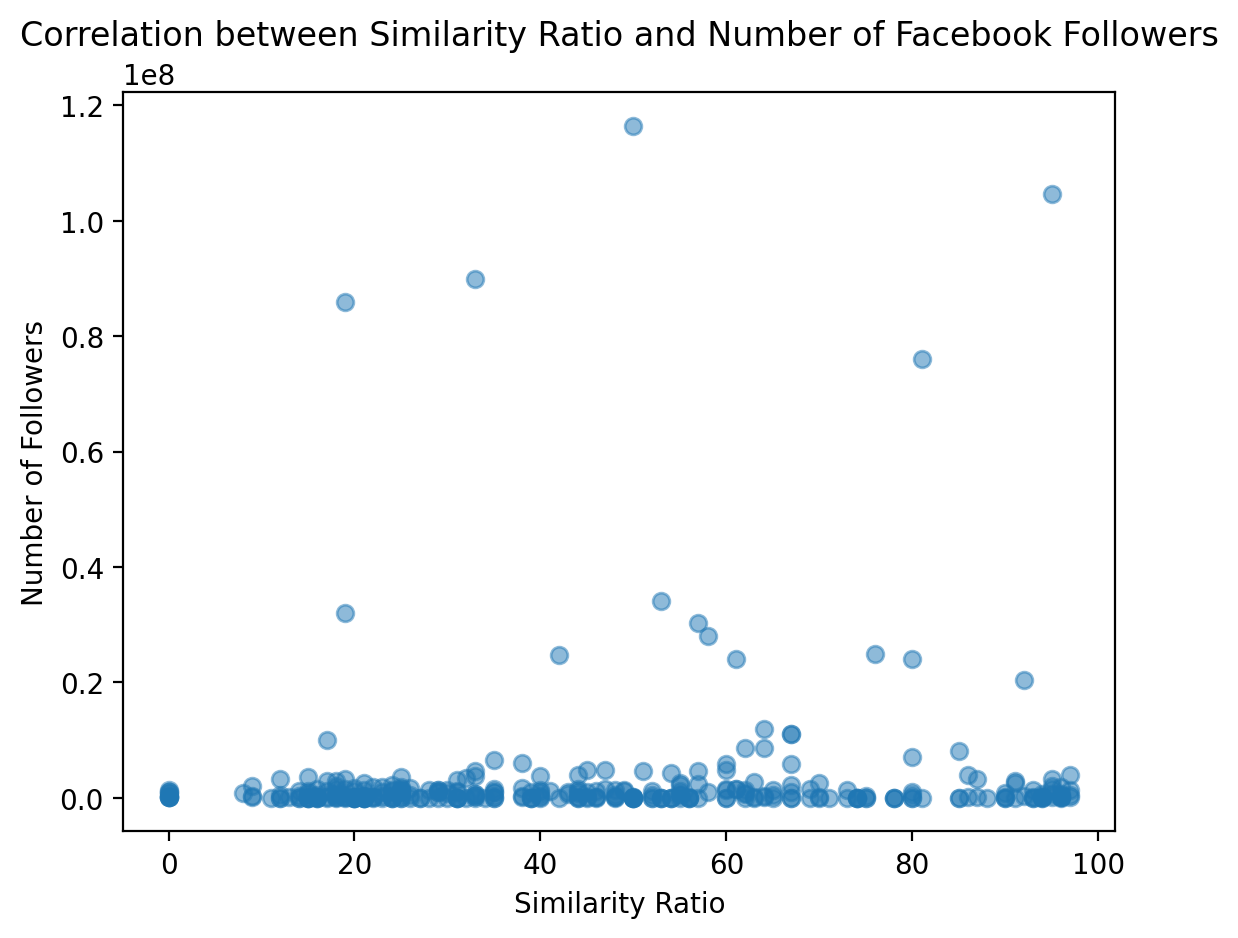

In [64]:
similarity_ratio = df['Twitter-name Similarity Ratio']
followers = df['Facebook Follower #']
correlation_coefficient = similarity_ratio.corr(followers)
print(f"Correlation coefficient between similarity ratio and number of Facebook followers: {correlation_coefficient:.2f}")
plt.scatter(similarity_ratio, followers, alpha=0.5)
plt.xlabel('Similarity Ratio')
plt.ylabel('Number of Followers')
plt.title('Correlation between Similarity Ratio and Number of Facebook Followers')
plt.show()

Weak Correlation between Followers count and Using Real names as Social Media handle names